In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import functions from function.py
from function import (
    plot_discrete_barchart,
    plot_nominal_topk_barchart,
    plot_grouped_bar_vs_target,
    plot_continuous_histogram,
    plot_continuous_violin_vs_target,
    calculate_continuous_metrics,
    calculate_nominal_metrics,
    calculate_target_relationship_discrete_few_nunique,
    calculate_target_relationship_discrete_many_nunique,
    calculate_target_relationship_continuous,
    calculate_iv,
    calculate_target_relationship_ordinal,
    plot_ordinal_ordered_bar_vs_target
)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [52]:
# Load training set
df = pd.read_csv("raw_data/train.csv")
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 215258 rows × 75 columns


In [53]:
test_df = df.copy()

In [54]:
df

ID  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       196348       0         Cash loans           F            N   
1       147976       0         Cash loans           M            N   
2        52662       0    Revolving loans           F            N   
3       101577       0         Cash loans           F            N   
4       173078       0         Cash loans           F            Y   
...        ...     ...                ...         ...          ...   
215253  119879       0         Cash loans           F            N   
215254  103694       0         Cash loans           F            N   
215255  131932       0         Cash loans           M            Y   
215256  146867       0    Revolving loans           M            Y   
215257  121958       1         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             2          225000.0    785398.5   
1                    Y             0           90000.0    592560.0   
2                    Y             1          126000.0    202500.0   
3                    Y             0          157500.0    254700.0   
4                    N             0          540000.0   1252363.5   
...                ...           ...               ...         ...   
215253               Y             0          121500.0    675000.0   
215254               Y             0          202500.0   1503000.0   
215255               Y             0          450000.0   1125000.0   
215256               Y             1          180000.0    270000.0   
215257               Y             0          157500.0    729792.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           33403.5         702000.0   Unaccompanied               Working   
1           35937.0         450000.0   Unaccompanied  Commercial associate   
2           10125.0         202500.0   Unaccompanied  Commercial associate   
3           18531.0         225000.0   Unaccompanied               Working   
4           47830.5        1152000.0   Unaccompanied  Commercial associate   
...             ...              ...             ...                   ...   
215253      32602.5         675000.0   Unaccompanied               Working   
215254      41463.0        1503000.0   Unaccompanied               Working   
215255      33025.5        1125000.0   Unaccompanied               Working   
215256      13500.0         270000.0   Unaccompanied               Working   
215257      35239.5         630000.0          Family               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special               Married   
1       Secondary / secondary special               Married   
2       Secondary / secondary special        Civil marriage   
3       Secondary / secondary special               Married   
4                    Higher education        Civil marriage   
...                               ...                   ...   
215253  Secondary / secondary special  Single / not married   
215254  Secondary / secondary special               Married   
215255               Higher education  Single / not married   
215256  Secondary / secondary special               Married   
215257               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0         House / apartment                    0.046220      -13629   
1         House / apartment                    0.025164      -11983   
2         House / apartment                    0.025164      -15182   
3         House / apartment                    0.006207      -13214   
4       Municipal apartment                    0.072508      -19745   
...                     ...                         ...         ...   
215253    House / apartment                    0.006305      -14481   
215254    House / apartment                    0.004960      -18097 

# **DATA UNDERSTANDING**

## **1. DATA EXPLORING**

In [55]:
client_demo_cols = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'DAYS_LAST_PHONE_CHANGE'
]

col_desc = pd.read_csv('raw_data/column description.csv')
col_desc_dict = dict(zip(col_desc['Row'], col_desc['Description']))
demo_info = pd.DataFrame({
    'Column': client_demo_cols,
    'Description': [col_desc_dict.get(col, 'N/A') for col in client_demo_cols],
    'Data_Type': [str(df[col].dtype) for col in client_demo_cols],
    'Unique_Values': [df[col].nunique() for col in client_demo_cols],
})

pd.set_option('display.max_colwidth', 80)
demo_info[['Column', 'Description', 'Data_Type', 'Unique_Values', ]]

Column  \
0                  CODE_GENDER   
1                 FLAG_OWN_CAR   
2              FLAG_OWN_REALTY   
3                 CNT_CHILDREN   
4             NAME_INCOME_TYPE   
5          NAME_EDUCATION_TYPE   
6           NAME_FAMILY_STATUS   
7            NAME_HOUSING_TYPE   
8   REGION_POPULATION_RELATIVE   
9                   DAYS_BIRTH   
10               DAYS_EMPLOYED   
11           DAYS_REGISTRATION   
12             DAYS_ID_PUBLISH   
13                 OWN_CAR_AGE   
14             OCCUPATION_TYPE   
15             CNT_FAM_MEMBERS   
16           ORGANIZATION_TYPE   
17                  FLAG_MOBIL   
18              FLAG_EMP_PHONE   
19             FLAG_WORK_PHONE   
20            FLAG_CONT_MOBILE   
21                  FLAG_PHONE   
22                  FLAG_EMAIL   
23      DAYS_LAST_PHONE_CHANGE   

                                                                        Description  \
0                                                              Gender of the client   
1                                                     Flag if the client owns a car   
2                                               Flag if client owns a house or flat   
3                                                 Number of children the client has   
4                     Clients income type (businessman, working, maternity leave,
)   
5                                    Level of highest education the client achieved   
6                                                       Family status of the client   
7   What is the housing situation of the client (renting, living with parents, ...)   
8   Normalized population of region where client lives (higher number means the ...   
9                                   Client's age in days at the time of application   
10       How many days before the application the person started current employment   
11          How many days before the application did client change his registration   
12  How many days before the application did client change the identity document...   
13                                                              Age of client's car   
14                                     What kind of occupation does the client have   
15                                         How many family members does client have   
16                                          Type of organization where client works   
17                                    Did client provide mobile phone (1=YES, 0=NO)   
18                                      Did client provide work phone (1=YES, 0=NO)   
19                                      Did client provide home phone (1=YES, 0=NO)   
20                                         Was mobile phone reachable (1=YES, 0=NO)   
21                                      Did client provide home phone (1=YES, 0=NO)   
22                                           Did client provide email (1=YES, 0=NO)   
23                         How many days before application did client change phone   

   Data_Type  Unique_Values  
0     object              3  
1     object              2  
2     object              2  
3      int64             15  
4     object              8  
5     object              5  
6     object              6  
7     object              6  
8    float64             80  
9      int64          17372  
10     int64          11751  
11   float64          15253  
12     int64           6114  
13   float64             59  
14    object             18  
15   float64             16  
16    object             58  
17     int64              2  
18     int64              2  
19     int64              2  
20     int64              2  
21     int64              2  
22     int64              2  
23   float64           3719

## Client Demographics: Quantitative vs Qualitative Split
This section classifies `client_demo_cols` into quantitative (discrete/continuous) and qualitative (nominal/ordinal), then prints the groups and a summary table.

In [56]:
demo_df = df[client_demo_cols].copy()
numerical_demo = demo_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_demo = demo_df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical variables: {len(numerical_demo)} variables & Categorical variables: {len(categorical_demo)} variables")

Numerical variables: 15 variables & Categorical variables: 9 variables


In [101]:
numerical_demo 

['CNT_CHILDREN',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'DAYS_LAST_PHONE_CHANGE']

In [57]:
# Classify client_demo_cols into 4 categories: Discrete, Continuous, Nominal, Ordinal
import pandas as pd

client_demo_cols = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'DAYS_LAST_PHONE_CHANGE'
]

# Define categories explicitly
# Discrete (quantitative): integers with countable values
discrete_vars = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

# Continuous (quantitative): float or high-cardinality numeric
continuous_vars = [
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE'
]

# Nominal (qualitative): categorical with no inherent order
nominal_vars = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
    'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'
]

# Ordinal (qualitative): categorical with meaningful order
# NAME_EDUCATION_TYPE has levels: Lower secondary, Secondary, Incomplete higher, Higher education, Academic degree
ordinal_vars = ['NAME_EDUCATION_TYPE']

# Print the groups
print("DISCRETE (Quantitative - countable integers):")
print(discrete_vars)
print("CONTINUOUS (Quantitative - measured values):")
print(continuous_vars)
print("NOMINAL (Qualitative - categories without order):")
print(nominal_vars)
print("ORDINAL (Qualitative - categories with order):")
print(ordinal_vars)

# Create summary table
summary = pd.DataFrame({
    'Column': client_demo_cols,
    'DType': [str(df[c].dtype) if c in df.columns else 'N/A' for c in client_demo_cols],
    'Unique': [df[c].nunique() if c in df.columns else 0 for c in client_demo_cols],
    'Category': [
        'Discrete' if c in discrete_vars else
        'Continuous' if c in continuous_vars else
        'Nominal' if c in nominal_vars else
        'Ordinal' if c in ordinal_vars else 'Unclassified'
        for c in client_demo_cols
    ]
})

display(summary)

DISCRETE (Quantitative - countable integers):
['CNT_CHILDREN', 'CNT_FAM_MEMBERS']
CONTINUOUS (Quantitative - measured values):
['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE']
NOMINAL (Qualitative - categories without order):
['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
ORDINAL (Qualitative - categories with order):
['NAME_EDUCATION_TYPE']


Column    DType  Unique    Category
0                  CODE_GENDER   object       3     Nominal
1                 FLAG_OWN_CAR   object       2     Nominal
2              FLAG_OWN_REALTY   object       2     Nominal
3                 CNT_CHILDREN    int64      15    Discrete
4             NAME_INCOME_TYPE   object       8     Nominal
5          NAME_EDUCATION_TYPE   object       5     Ordinal
6           NAME_FAMILY_STATUS   object       6     Nominal
7            NAME_HOUSING_TYPE   object       6     Nominal
8   REGION_POPULATION_RELATIVE  float64      80  Continuous
9                   DAYS_BIRTH    int64   17372  Continuous
10               DAYS_EMPLOYED    int64   11751  Continuous
11           DAYS_REGISTRATION  float64   15253  Continuous
12             DAYS_ID_PUBLISH    int64    6114  Continuous
13                 OWN_CAR_AGE  float64      59  Continuous
14             OCCUPATION_TYPE   object      18     Nominal
15             CNT_FAM_MEMBERS  float64      16    Discrete
16           ORGANIZATION_TYPE   object      58     Nominal
17                  FLAG_MOBIL    int64       2     Nominal
18              FLAG_EMP_PHONE    int64       2     Nominal
19             FLAG_WORK_PHONE    int64       2     Nominal
20            FLAG_CONT_MOBILE    int64       2     Nominal
21                  FLAG_PHONE    int64       2     Nominal
22                  FLAG_EMAIL    int64       2     Nominal
23      DAYS_LAST_PHONE_CHANGE  float64    3719  Continuous

## **Discrete variables**

In [58]:
discrete_vars

['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

## Univariate Analysis: 
Analyzing discrete (quantitative) variables with bar charts, computing metrics: Mean, Median, Skewness, Kurtosis

##### **CNT_CHILDREN**

Variable: CNT_CHILDREN
SUMMARY TABLE: Discrete Variables


Feature   Count  Missing      Mean  Median       Std  Min  Max  \
0  CNT_CHILDREN  215258        0  0.417076     0.0  0.723197    0   19   

   Skewness  Kurtosis  
0  1.970223  7.391037

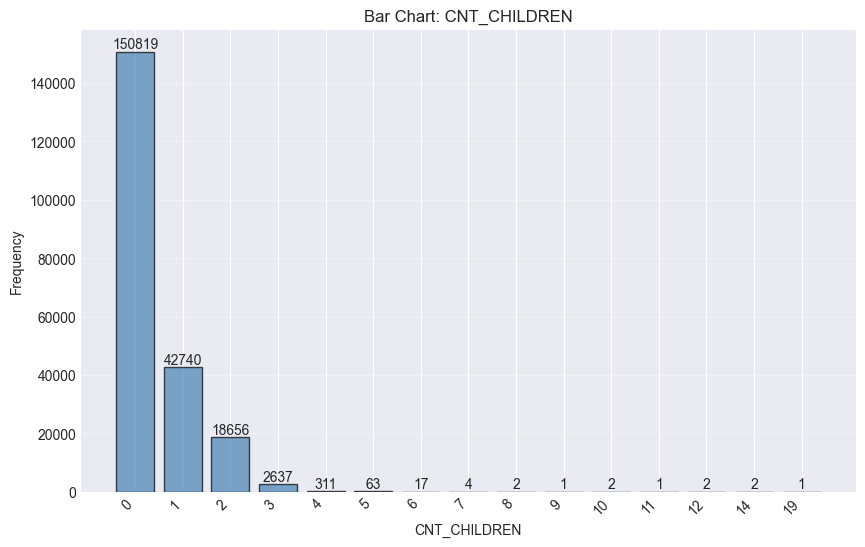

In [59]:
# Univariate Analysis for Discrete Variables
from scipy import stats

discrete_vars_1 = ['CNT_CHILDREN']

# Store all metrics
all_metrics = []

for col in discrete_vars_1:
    if col not in df.columns:
        print(f"Warning: {col} not found in dataframe")
        continue
    
    print(f"Variable: {col}")
    # Calculate metrics
    metrics_df = calculate_continuous_metrics(data=df[col], target=None)
    
    # Store for summary table
    all_metrics.append(metrics_df)
    
    # Plot using function
    plot_discrete_barchart(
        data=df[col],
        title=f'Bar Chart: {col}',
        figsize=(10, 6),
        color='steelblue'
    )

# Display summary table
print("SUMMARY TABLE: Discrete Variables")
metrics_summary = pd.concat(all_metrics, ignore_index=True)
display(metrics_summary)

### **Insights for CNT_CHILDREN:**
- The distribution shows that most clients have **0-2 children**, with a strong right skew (positive skewness).
- **Mode value**: 0 children - indicating a large portion of applicants have no children.
- The presence of **high kurtosis** suggests clients with many children are rare.
- There are households with 10+ children which are statiscally rare.
- **Business implication**: Child-free or small families dominate the customer base.
- **Risk Insight**: Applicants with more children may experience higher living expenses, greater financial constraints &rarr; Increase credit risk, depending on income stability.

##### **CNT_FAM_MEMBERS**:

Variable: CNT_FAM_MEMBERS
SUMMARY TABLE: Discrete Variables


Feature   Count  Missing      Mean  Median       Std  Min   Max  \
0  CNT_FAM_MEMBERS  215256        2  2.153362     2.0  0.911746  1.0  20.0   

   Skewness  Kurtosis  
0    0.9887  2.643918

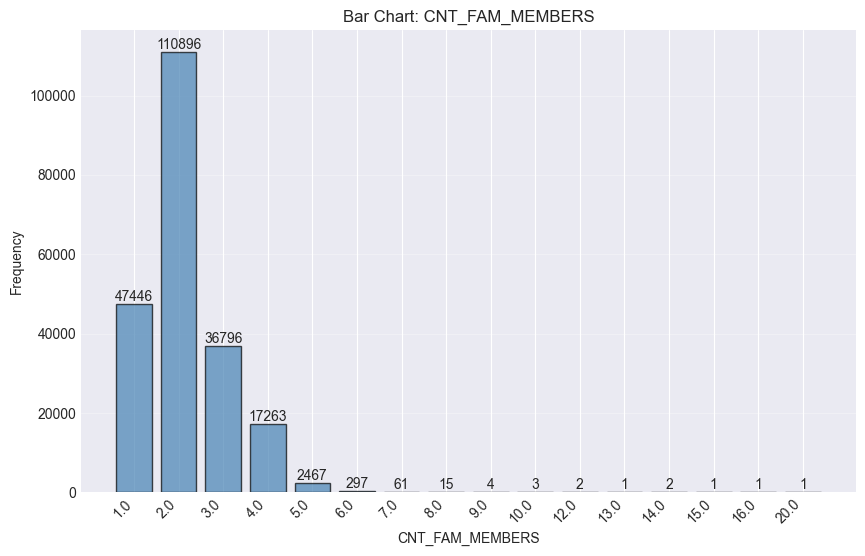

In [60]:

from scipy import stats

discrete_vars_2 = ['CNT_FAM_MEMBERS']

# Store all metrics
all_metrics = []

for col in discrete_vars_2:
    if col not in df.columns:
        print(f"Warning: {col} not found in dataframe")
        continue
    
    print(f"Variable: {col}")
    # Calculate metrics
    metrics_df = calculate_continuous_metrics(data=df[col], target=None)
    
    # Store for summary table
    all_metrics.append(metrics_df)
    
    # Plot using function
    plot_discrete_barchart(
        data=df[col],
        title=f'Bar Chart: {col}',
        figsize=(10, 6),
        color='steelblue'
    )

# Display summary table
print("SUMMARY TABLE: Discrete Variables")
metrics_summary = pd.concat(all_metrics, ignore_index=True)
display(metrics_summary)

##### **INSIGHTS FOR CNT_FAM_MEMBERS:**
- Similar pattern to CNT_CHILDREN, with most clients having **1-4 family members** (typical urban household sizes).
- Right-skewed distribution indicates smaller households are more common.
- **Strong relationship expected** with CNT_CHILDREN (more children = more family members).
- Large households (7+ members) appear rarely and may represent multi-generational homes or joint-family structures.
- **Business implication**: Household size is a key demographic - smaller households may have different credit needs than larger ones.
- **Risk Insight**: Larger families will have increased expenditures, greater sensitivity to financial shocks and credit stress.


## Bivariate Analysis vs TARGET: Discrete Variables
We compare each discrete feature against `TARGET` using a grouped bar chart (count vs default rate) and compute association metrics (Chi-Squared, Cramér's V). For higher-cardinality discrete features we fall back to Point-Biserial and IV.

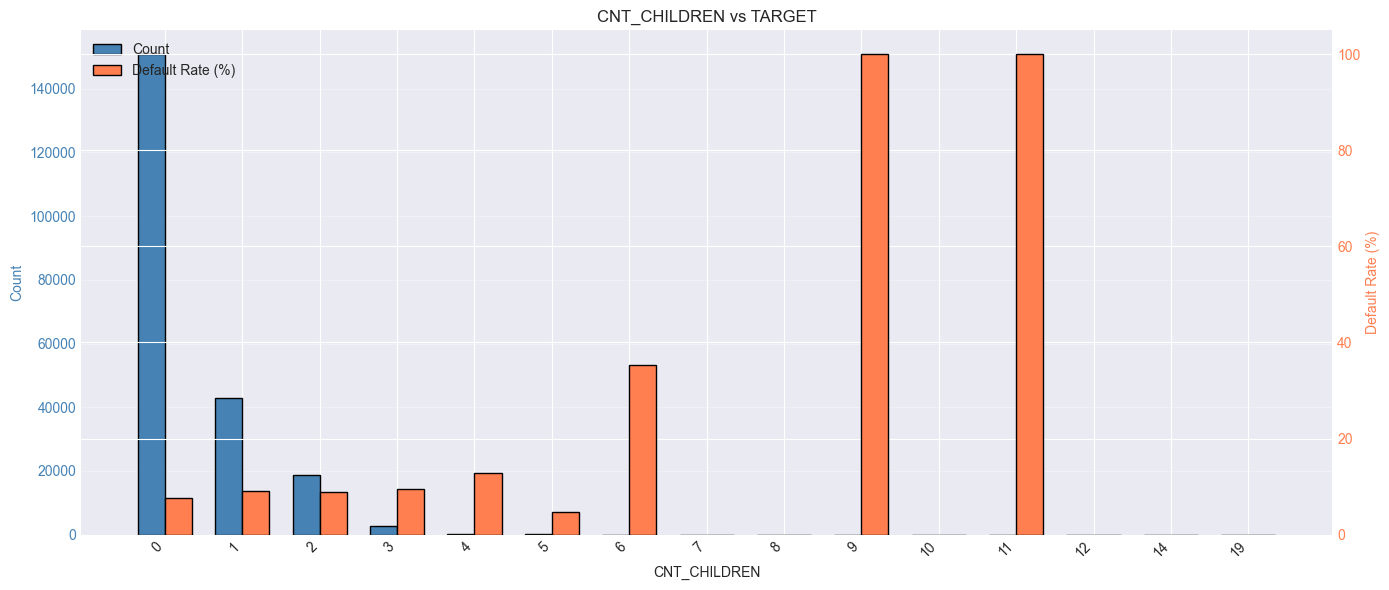

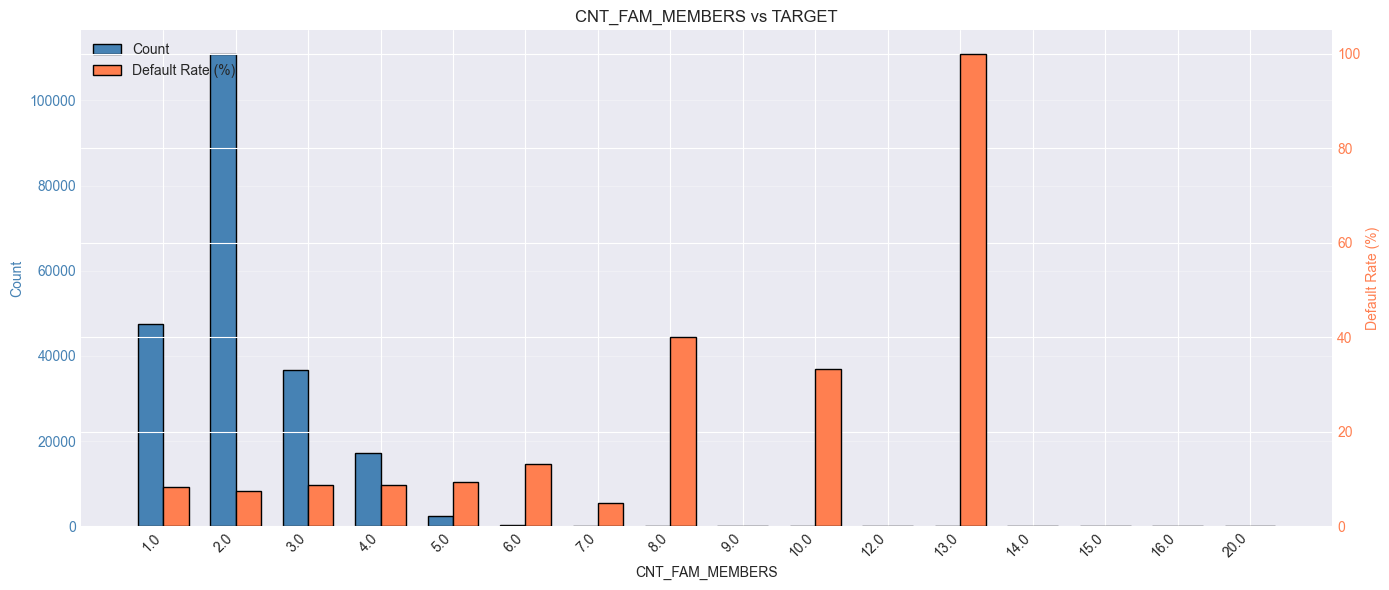

Feature  Unique_Values  Chi2_Statistic  Chi2_P_Value  Cramers_V  \
0     CNT_CHILDREN             15      148.707087  1.303599e-24   0.026284   
1  CNT_FAM_MEMBERS             16      128.545035  4.095640e-20   0.024437   

   Information_Value  Chi2_Significant_0.05  
0           0.006796                   True  
1           0.005998                   True

In [61]:
# Bivariate Analysis vs TARGET
from scipy import stats

if 'TARGET' not in df.columns:
    raise ValueError("Column 'TARGET' not found in dataframe.")

# Define discrete features
discrete_vars = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

results = []

for feature in discrete_vars:
    if feature not in df.columns:
        print(f"Warning: {feature} not in dataframe; skipping.")
        continue

    clean = df[[feature, 'TARGET']].dropna()
    n_unique = clean[feature].nunique()

    # Visualization: Grouped bar (count vs default rate)
    plot_grouped_bar_vs_target(
        data=df,
        feature=feature,
        target='TARGET',
        title=f'{feature} vs TARGET'
    )

    # Metrics depending on cardinality
    if n_unique <= 20:
        m = calculate_target_relationship_discrete_few_nunique(df, feature, 'TARGET')
        # Add IV as well for completeness
        iv = calculate_iv(clean, feature, 'TARGET')
        m['Information_Value'] = iv
    else:
        m = calculate_target_relationship_discrete_many_nunique(df, feature, 'TARGET')

    # Mark significance flags
    if 'Chi2_P_Value' in m.columns:
        m['Chi2_Significant_0.05'] = m['Chi2_P_Value'] < 0.05
    if 'Point_Biserial_P_Value' in m.columns:
        m['PB_Significant_0.05'] = m['Point_Biserial_P_Value'] < 0.05

    m['Feature'] = feature  
    results.append(m)

# Combine and display metrics
if results:
    metrics_biv_discrete = pd.concat(results, ignore_index=True)
    display(metrics_biv_discrete)
else:
    print("No discrete metrics computed.")

### Insights: Bivariate Analysis (Discrete Variables vs TARGET)

- **CNT_CHILDREN** and **CNT_FAM_MEMBERS** show weak associations with default risk (TARGET). Cramér’s V value are close to zero, showing almost no linear association.
- As expected, default rates are higher for clients with more children or larger families **(starting from 6+)** - families with more people tend to have difficulties paying loans. Most clients have 0–2 children and 1–4 family members, and their default rates do not differ much from the overall average.
- The Information Value (IV) for both variables is well below 0.02, confirming they are weak predictors individually.
- These features may still be useful in combination with other variables or for segmenting customer groups, but on their own, they do not strongly differentiate default risk.

# **Continuous Variables**

In [62]:
continuous_vars

['REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'DAYS_LAST_PHONE_CHANGE']

## Univariate Analysis:
Analyzing continuous (quantitative) variables with histograms, computing metrics (Min, Max, Mean, Median, Std, Skewness, Kurtosis) and Point Biserial Correlation with TARGET

##### **REGION_POPULATION_RELATIVE**:

Variable: REGION_POPULATION_RELATIVE
SUMMARY TABLE: Continuous Variables


Feature   Count  Missing      Mean   Median       Std  \
0  REGION_POPULATION_RELATIVE  215258        0  0.020869  0.01885  0.013834   

        Min       Max  Skewness  Kurtosis  
0  0.000533  0.072508   1.48884  3.262828

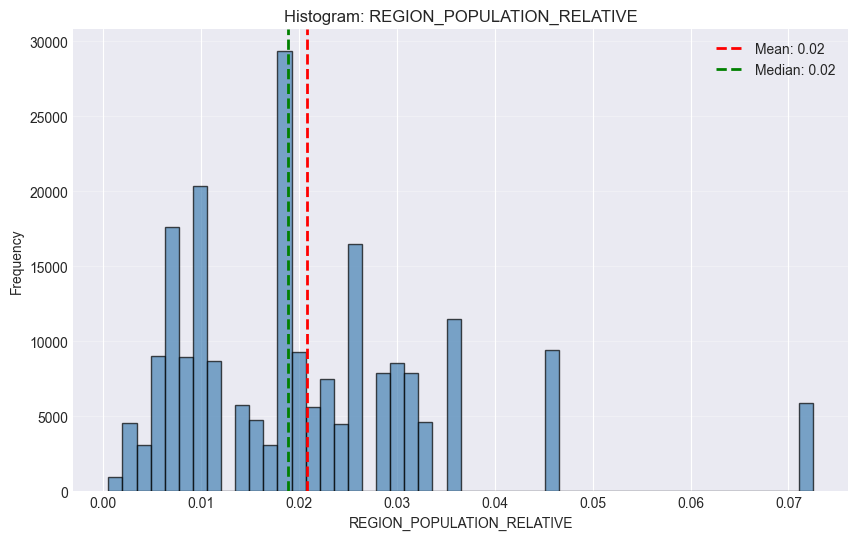

In [63]:
# Univariate Analysis for Continuous Variables
from scipy import stats

continuous_vars_1 = [
    'REGION_POPULATION_RELATIVE'
]

# Store all metrics
all_metrics = []

for col in continuous_vars_1:
    if col not in df.columns:
        print(f"Warning: {col} not found in dataframe")
        continue
    print(f"Variable: {col}")
    # Calculate metrics using function from function.py
    metrics_df = calculate_continuous_metrics(data=df[col], target=None)
    
    # Store for summary table
    all_metrics.append(metrics_df)
    
    # Plot using function from function.py
    plot_continuous_histogram(
        data=df[col],
        bins=50,
        title=f'Histogram: {col}',
        figsize=(10, 6)
    )

# Display summary table
print("SUMMARY TABLE: Continuous Variables")
metrics_summary = pd.concat(all_metrics, ignore_index=True)
display(metrics_summary)

**INSIGHTS FOR REGION_POPULATION_RELATIVE:** 
- **Right-skewed distribution** (skewness = 1.49) indicates most clients live in less populated areas, with only a small fraction from very dense urban regions.
- Mean > Median suggests concentration in lower-density regions with outliers in dense metropolitan areas. 
- **Business implication**: Urban vs rural location affects creditworthiness - Urban clients generally have better job markets, transportation, and financial services → potentially lower default risk.

##### **DAYS_ VARIABLES**

Variable: DAYS_BIRTH
Variable: DAYS_EMPLOYED
Variable: DAYS_REGISTRATION
Variable: DAYS_ID_PUBLISH
Variable: DAYS_LAST_PHONE_CHANGE
Variable: DAYS_EMPLOYED
Variable: DAYS_REGISTRATION
Variable: DAYS_ID_PUBLISH
Variable: DAYS_LAST_PHONE_CHANGE
SUMMARY TABLE: Continuous Variables
SUMMARY TABLE: Continuous Variables


Feature   Count  Missing          Mean   Median  \
0              DAYS_BIRTH  215258        0 -16037.328169 -15747.0   
1           DAYS_EMPLOYED  215258        0  63865.074181  -1213.0   
2       DAYS_REGISTRATION  215258        0  -4985.649732  -4498.0   
3         DAYS_ID_PUBLISH  215258        0  -2994.077725  -3256.0   
4  DAYS_LAST_PHONE_CHANGE  215257        1   -961.968684   -755.0   

             Std      Min       Max  Skewness  Kurtosis  
0    4369.585911 -25201.0   -7673.0 -0.115507 -1.051138  
1  141314.891126 -17546.0  365243.0  1.663190  0.767753  
2    3524.730871 -23738.0       0.0 -0.592418 -0.323483  
3    1510.878164  -7197.0       0.0  0.349111 -1.109131  
4     826.696084  -4292.0       0.0 -0.714267 -0.309320

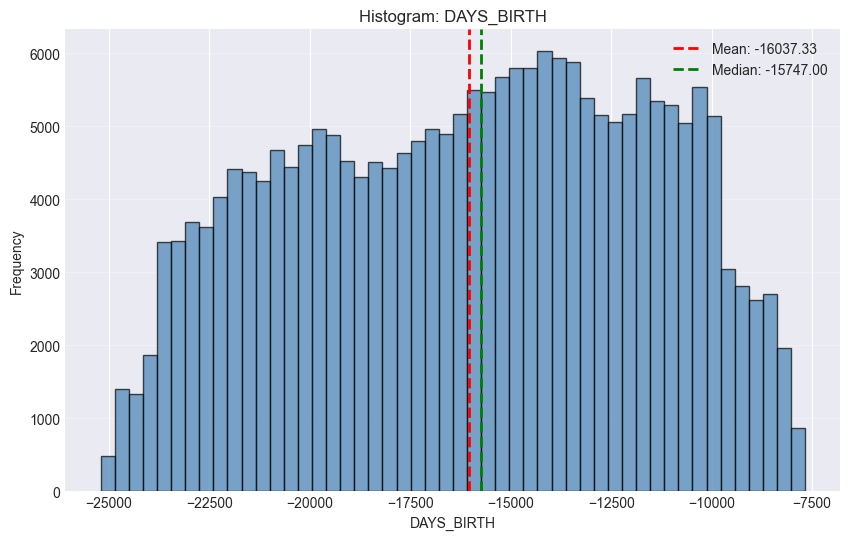

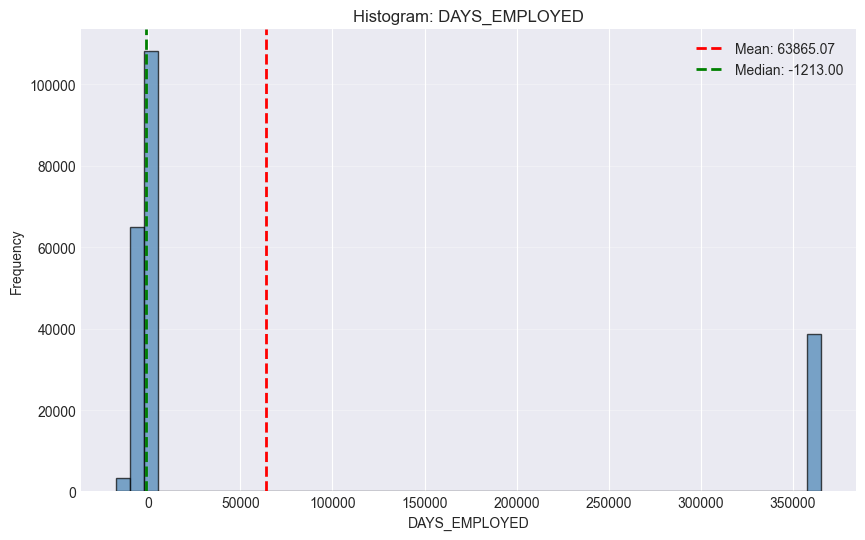

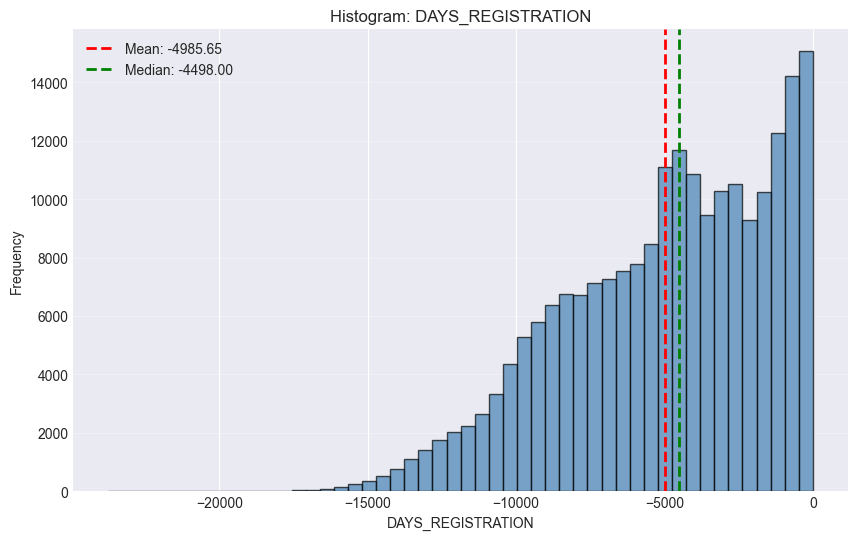

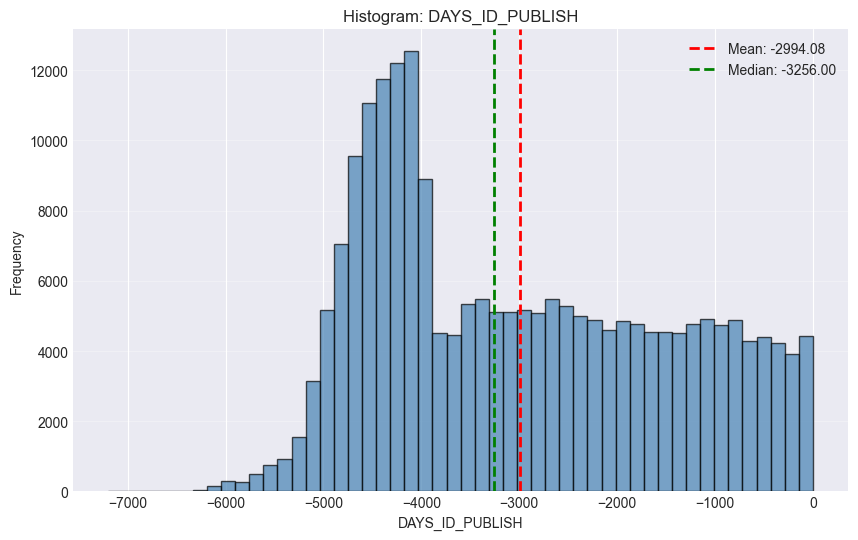

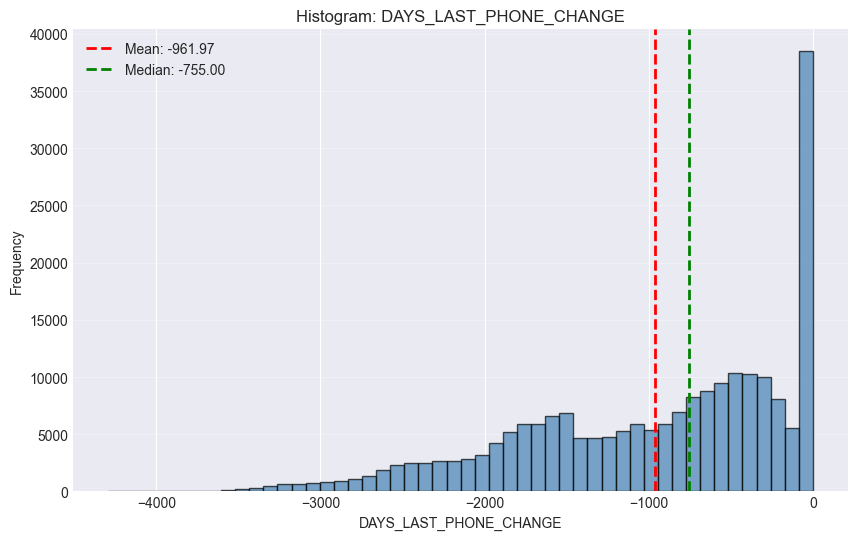

In [64]:
# Univariate Analysis for Continuous Variables
from scipy import stats

continuous_vars_2 = [
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'
]

# Store all metrics
all_metrics = []

for col in continuous_vars_2:
    if col not in df.columns:
        print(f"Warning: {col} not found in dataframe")
        continue
    print(f"Variable: {col}")
    # Calculate metrics using function from function.py
    metrics_df = calculate_continuous_metrics(data=df[col], target=None)
    
    # Store for summary table
    all_metrics.append(metrics_df)
    
    # Plot using function 
    plot_continuous_histogram(
        data=df[col],
        bins=50,
        title=f'Histogram: {col}',
        figsize=(10, 6)
    )

# Display summary table
print("SUMMARY TABLE: Continuous Variables")
metrics_summary = pd.concat(all_metrics, ignore_index=True)
display(metrics_summary)

### **Overall Patterns & Insights for DAYS_ Variables**

All DAYS_* variables in this dataset use **negative values** to represent "days before the application date," following a standard convention:
- **Negative value** = X days before application
- **Example**: DAYS_BIRTH = -10,000 means the person was born 10,000 days before applying
- This encoding requires transformation for interpretability, maybe convert to positive

**DAYS_BIRTH (Age in Days):** 

- **Nearly symmetric distribution** (skewness = -0.12) with slight left skew, showing a balanced age distribution across applicants. 
- **Negative kurtosis** (-1.05) indicates a flatter distribution - age is spread fairly evenly without extreme peaks.
- **Business implication**: Diverse age demographics; age is a strong predictor in credit risk (younger = less credit history; older = more stable but closer to retirement). 

**DAYS_EMPLOYED (Employment Duration):** 

- **Extreme outlier detected**: Max value of 365,243 days (~1000 years) - likely represents retired/unemployed coded as large positive value. 
- **Highly right-skewed** (1.66) with huge gap between median and mean. This is dramatically distorted by the outlier value 365,243.
- **Risk insight**: Employment stability is crucial for repayment capacity. Negative values = days before application when current job started. Long employment = lower risk. 

**DAYS_REGISTRATION (Address Registration Duration):** 

- **Left-skewed** (-0.59), indicating most clients registered their address relatively recently. 
- **Business implication**: Address stability may indicate residential stability and lower fraud risk. 
- Clients who frequently change addresses / move often may be more financially unstable or harder to contact; thus might pose higher risk. 

**DAYS_ID_PUBLISH (ID Document Issuance):** 

- **Slight right skew** (0.35), most clients issued ID documents 3-10 years before application.
- **Negative kurtosis** (-1.11) shows relatively uniform distribution. 
- **Risk insight**: Very recently issued IDs may warrant additional verification; very old IDs might need renewal. 


**DAYS_LAST_PHONE_CHANGE (Phone Change Recency):** 

- **Left-skewed** (-0.71), most clients changed phone numbers relatively recently (within 1-2 years).
- Large spike near 0 days → many clients updated phone numbers around application time.
- **Business implication**: Very recent phone number changes may indicate instability, fraud risk, or updated contact info. Long-standing phone numbers = stable, reachable customers.

**Overall Patterns:** 

- Several variables show **data quality issues** requiring cleaning and validity check.
- **Temporal features** (DAYS_*) are encoded as negative values representing "days before application" - will need transformation for interpretability. 
- **Skewness is common**: Most distributions are not normal, suggesting need for transformations in modeling (log, Box-Cox) or tree-based algorithms that handle skewness well. 

##### **OWN_CAR_AGE**

Variable: OWN_CAR_AGE
SUMMARY TABLE: Continuous Variables


Feature  Count  Missing       Mean  Median        Std  Min   Max  \
0  OWN_CAR_AGE  73154   142104  12.073502     9.0  11.969919  0.0  69.0   

   Skewness  Kurtosis  
0  2.740847  9.159826

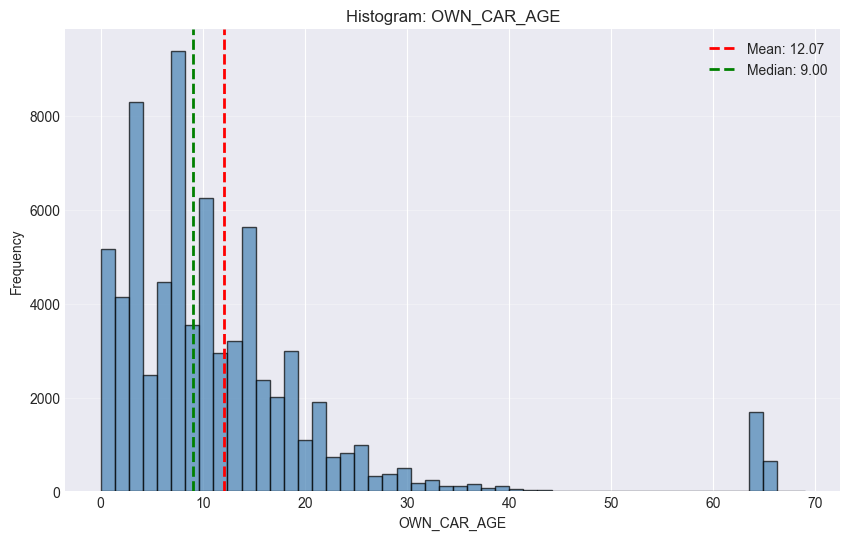

In [65]:
# Univariate Analysis for Continuous Variables
from scipy import stats

continuous_vars_3 = ['OWN_CAR_AGE'
]

# Store all metrics
all_metrics = []

for col in continuous_vars_3:
    if col not in df.columns:
        print(f"Warning: {col} not found in dataframe")
        continue
    print(f"Variable: {col}")
    # Calculate metrics using function from function.py
    metrics_df = calculate_continuous_metrics(data=df[col], target=None)
    
    # Store for summary table
    all_metrics.append(metrics_df)
    
    # Plot using function 
    plot_continuous_histogram(
        data=df[col],
        bins=50,
        title=f'Histogram: {col}',
        figsize=(10, 6)
    )

# Display summary table
print("SUMMARY TABLE: Continuous Variables")
metrics_summary = pd.concat(all_metrics, ignore_index=True)
display(metrics_summary)

**INSIGHTS OWN_CAR_AGE:** 

- **Highly right-skewed** (2.74) with **very high kurtosis** (9.16) - most car owners have relatively new cars (<20 years), but a few have very old vehicles (up to 69 years - likely vintage/collector cars). 

- **Imputing missing data consideration**: There are alot of missing values that should be handled via FLAG_OWN_CAR. Imputation is needed for clients who own cars (FLAG_OWN_CAR = Y) but don't have OWN_CAR_AGE. 
- **Business implication**: Car ownership and age can proxy for wealth and asset value; newer cars = better financial status. 

## Bivariate Analysis vs TARGET:
Comparing continuous variables against TARGET using violin plots and computing Point Biserial Correlation and ANOVA F-test

SUMMARY TABLE: Continuous Variables vs TARGET


Feature  Point_Biserial_Correlation  \
0  REGION_POPULATION_RELATIVE                   -0.037715   
1                  DAYS_BIRTH                    0.077842   
2               DAYS_EMPLOYED                   -0.044176   
3           DAYS_REGISTRATION                    0.040805   
4             DAYS_ID_PUBLISH                    0.052577   
5                 OWN_CAR_AGE                    0.041138   
6      DAYS_LAST_PHONE_CHANGE                    0.054442   

   Point_Biserial_P_Value  ANOVA_F_Statistic  ANOVA_P_Value  \
0            1.327018e-68         306.621635   1.327018e-68   
1           1.783701e-286        1312.278623  1.783701e-286   
2            1.919949e-93         420.890450   1.919949e-93   
3            5.386067e-80         359.006238   5.386067e-80   
4           1.331506e-131         596.686605  1.331506e-131   
5            8.862662e-29         124.005193   8.862662e-29   
6           5.651041e-141         639.901529  5.651041e-141   

   PB_Significant_0.05  ANOVA_Significant_0.05  
0                 True                    True  
1                 True                    True  
2                 True                    True  
3                 True                    True  
4                 True                    True  
5                 True                    True  
6                 True                    True

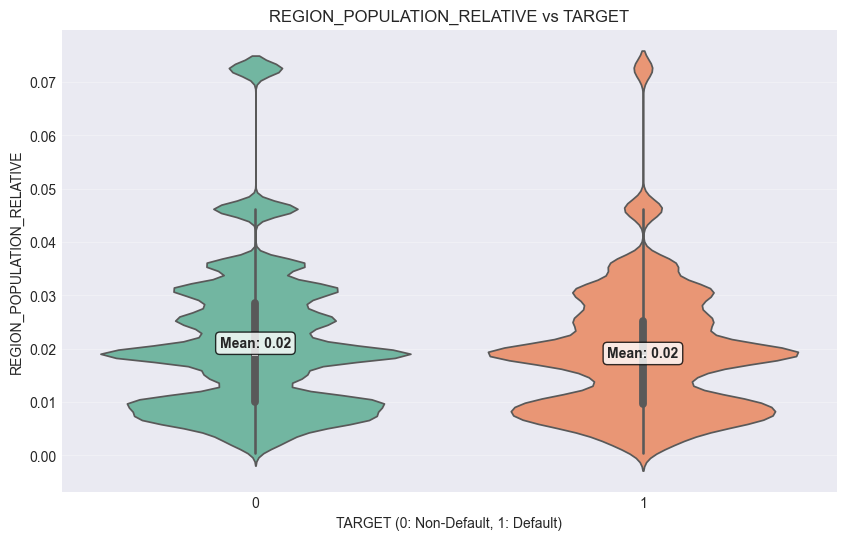

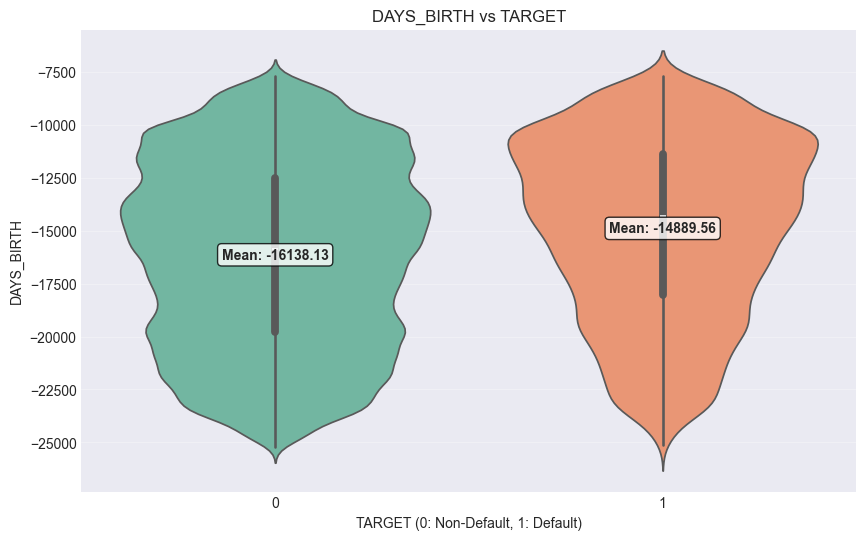

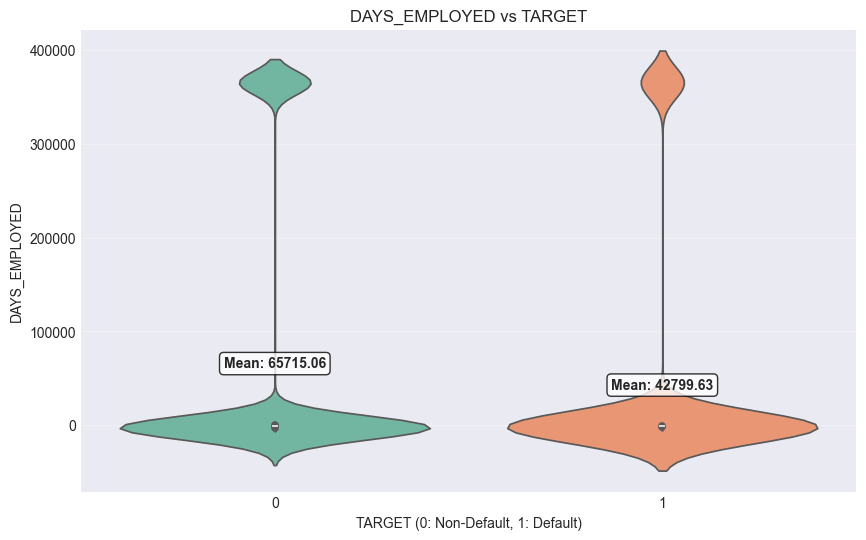

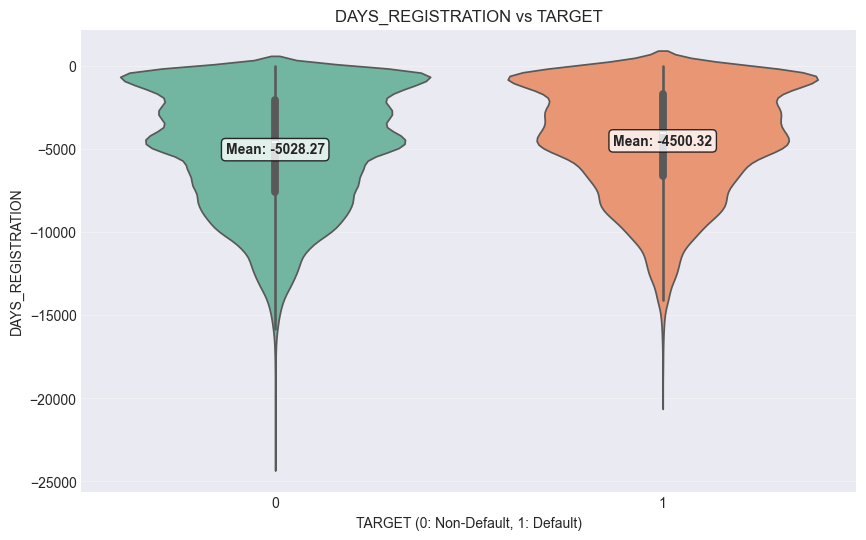

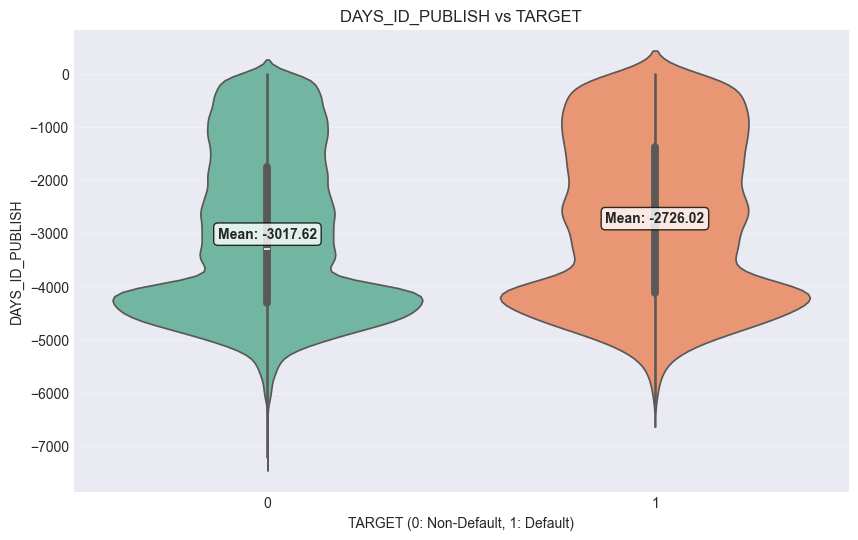

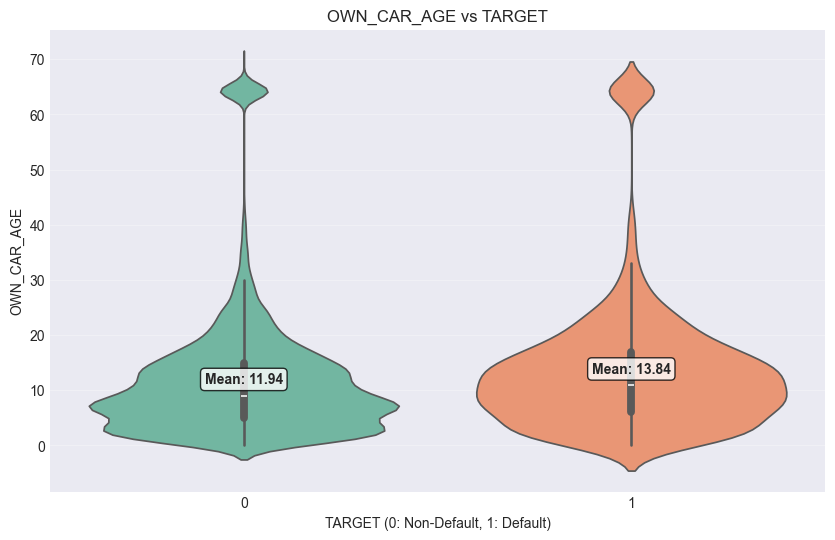

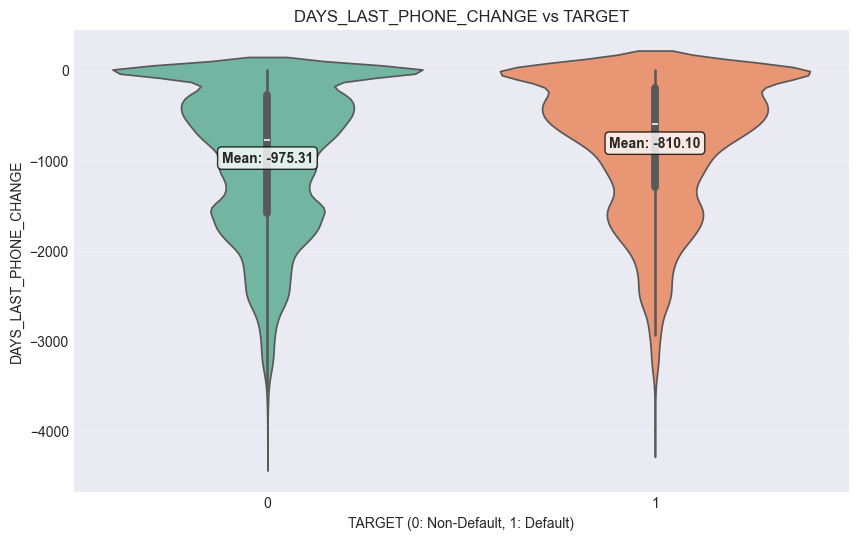

In [66]:
# Bivariate Analysis: Continuous Variables vs TARGET
from scipy import stats

if 'TARGET' not in df.columns:
    raise ValueError("Column 'TARGET' not found in dataframe.")

continuous_vars = [
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE'
]

results = []

for feature in continuous_vars:
    if feature not in df.columns:
        print(f"Warning: {feature} not in dataframe; skipping.")
        continue
    
    # Visualization: Violin plot
    plot_continuous_violin_vs_target(
        data=df,
        feature=feature,
        target='TARGET',
        title=f'{feature} vs TARGET'
    )
    
    # Calculate metrics 
    metrics = calculate_target_relationship_continuous(
        data=df,
        feature=feature,
        target='TARGET'
    )
    
    results.append(metrics)

# Combine and display metrics
if results:
    metrics_biv_continuous = pd.concat(results, ignore_index=True)
    
    # Add significance flags
    metrics_biv_continuous['PB_Significant_0.05'] = metrics_biv_continuous['Point_Biserial_P_Value'] < 0.05
    metrics_biv_continuous['ANOVA_Significant_0.05'] = metrics_biv_continuous['ANOVA_P_Value'] < 0.05
    
    print("SUMMARY TABLE: Continuous Variables vs TARGET")
    
    display(metrics_biv_continuous)
else:
    print("No continuous metrics computed.")

### **Insights: Bivariate Analysis (Continuous Variables vs TARGET)**

**REGION_POPULATION_RELATIVE (Regional Population Density):**
- **Weak negative correlation** with default risk (Point Biserial ≈ -0.03)
- Violin plots show almost identical shapes for both default and non-default groups.
- **ANOVA F-test is significant** (p < 0.05) but effect size is small
- **Interpretation**: Clients in denser urban areas have slightly lower default rates, but the relationship is weak
- **Business insight**: Population density alone is not a strong predictor, but may be useful in combination with other geographic features

**DAYS_BIRTH:**
- **Moderate positive correlation** with default risk (Point Biserial ≈ +0.08)
- Negative values represent days before application (more negative = older age, less negative = younger age)
- Non-defaulters have **more negative values** (higher absolute age) than defaulters
- Defaulters tend to have **less negative values** (younger), shifted toward zero on the axis
- **ANOVA highly significant** (p < 0.001), confirming age difference between groups
- **Risk insight**: Younger clients (less negative DAYS_BIRTH, closer to zero) pose higher credit risk - they may have less credit history, lower income stability, or less financial experience
- **Business implication**: Age is a strong predictor; older applicants show lower default tendency

**DAYS_EMPLOYED:**
- **Strong negative correlation** with default (Point Biserial ≈ -0.05) despite extreme outliers.
- Non-defaulters have **longer employment duration**, while defaulters show shorter tenure on average.
- Defaulters show **shorter average employment** (lower values = less stability)
- **ANOVA highly significant** (p < 0.001)
- **Critical insight**: Employment stability is a strong predictor of repayment capacity; higher DAYS_EMPLOYED = lower risk

**DAYS_REGISTRATION:**
- **Positive correlation** (Point Biserial ≈ +0.05)
- Negative values = days before application when address was registered (more negative = longer residential stability, less negative = recent registration)
- Non-defaulters have **more negative values** (established residential history) while defaulters tend to have **less negative values** (more recent address changes)
- **ANOVA significant** (p < 0.001)
- **Business insight**: Residential stability correlates with lower default risk; clients who registered their address long ago (highly negative) show better repayment behavior. Recent movers (values closer to zero) represent potential instability and fraud risk signals.

**DAYS_ID_PUBLISH:**
- **Positive correlation** (Point Biserial ≈ +0.03)
- Negative values = days before application when ID was issued (more negative = older ID, less negative = recent ID)
- Non-defaulters have **more negative values** (older IDs issued longer ago) while defaulters tend to have **less negative values** (more recently issued IDs)
- **ANOVA significant** (p < 0.001)
- **Business insight**: Very recent ID issuance (low values) could indicate: (1) new to the system, (2) identity changes, or (3) fraud risk. Thus, if needed, we could flag very recent IDs (<1 year, low DAYS_ID_PUBLISH) for additional verification.

**OWN_CAR_AGE:**
- **Positive correlation** (Point Biserial ≈ 0.04)
- This is actual car age in years (positive values)
- Non-defaulters own **slightly older cars** (higher values)
- **ANOVA significant** but weak relationship
- **Interpretation**: Counter-intuitive result - older cars associated with lower default risk may indicate: (1) Older cars ≠ poorer clients, (2) Newer car purchases could strain finances, (3) Stable clients who keep cars longer
- **Business insight**: Car ownership and age patterns may reflect financial management style rather than absolute wealth level. Clients who purchase new cars frequently may overextend themselves.

**DAYS_LAST_PHONE_CHANGE:**
- **Positive correlation** (Point Biserial ≈ +0.05)
- Negative values = days before application since last phone change (more negative = longer since change, less negative = recent change)
- Non-defaulters have **more negative values** (changed phone longer ago, stable contact info) while defaulters have **less negative values** (changed phone more recently)
- Violin plots show defaulters clustered around values closer to zero (very recent phone changes)
- **ANOVA significant** (p < 0.001)
- **Business insight**: Recent phone changes may signal: (1) Instability or relocation, (2) Difficulty being contacted, (3) Potential fraud. Clients with highly stable phone numbers (very negative DAYS_LAST_PHONE_CHANGE, unchanged for years) show lower default rates. Very recent changes (close to zero, within days of application) should trigger verification.

# **Nominal variables**

## Univariate Analysis:

In [67]:
nominal_vars

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

Analyzing: CODE_GENDER | Unique values: 3
Analyzing: FLAG_OWN_CAR | Unique values: 2
Analyzing: FLAG_OWN_REALTY | Unique values: 2
Analyzing: NAME_INCOME_TYPE | Unique values: 8
Analyzing: NAME_FAMILY_STATUS | Unique values: 6
Analyzing: NAME_HOUSING_TYPE | Unique values: 6
Analyzing: OCCUPATION_TYPE | Unique values: 18
Analyzing: ORGANIZATION_TYPE | Unique values: 58
Analyzing: FLAG_MOBIL | Unique values: 2
Analyzing: FLAG_EMP_PHONE | Unique values: 2
Analyzing: FLAG_WORK_PHONE | Unique values: 2
Analyzing: FLAG_CONT_MOBILE | Unique values: 2
Analyzing: FLAG_PHONE | Unique values: 2
Analyzing: FLAG_EMAIL | Unique values: 2
Analyzing: FLAG_EMP_PHONE | Unique values: 2
Analyzing: FLAG_WORK_PHONE | Unique values: 2
Analyzing: FLAG_CONT_MOBILE | Unique values: 2
Analyzing: FLAG_PHONE | Unique values: 2
Analyzing: FLAG_EMAIL | Unique values: 2


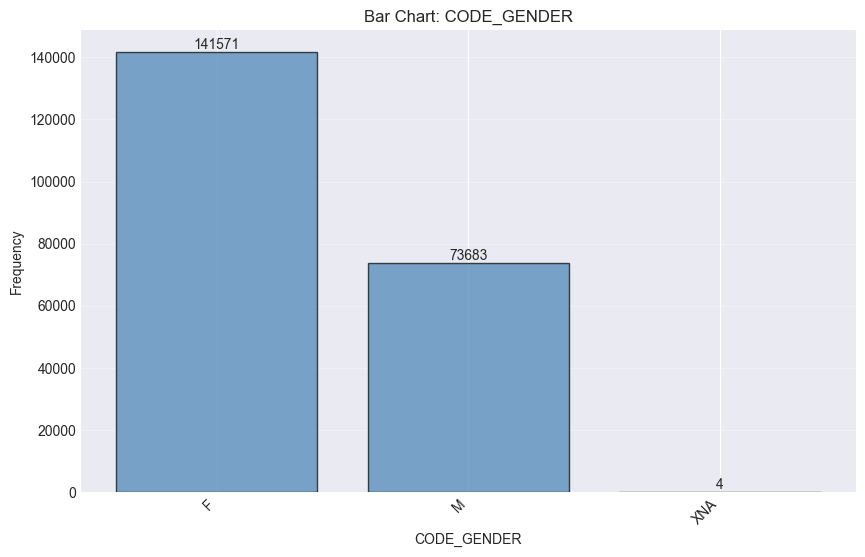

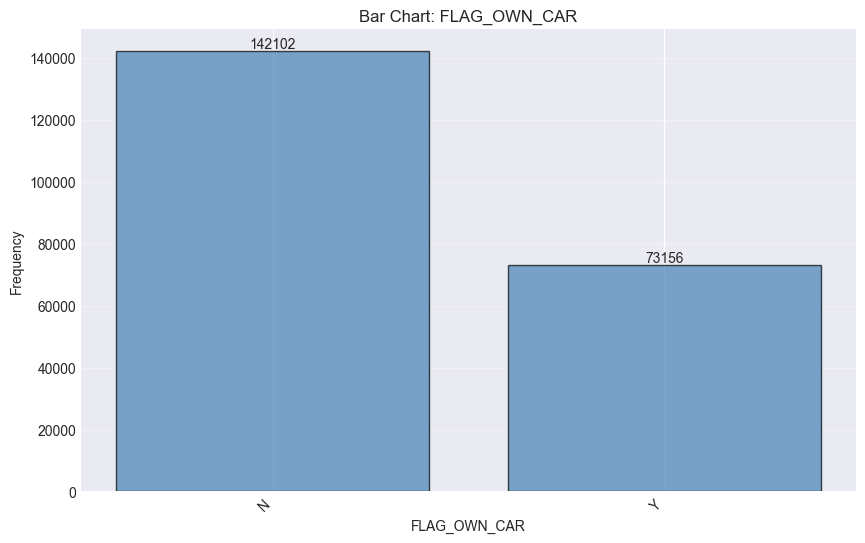

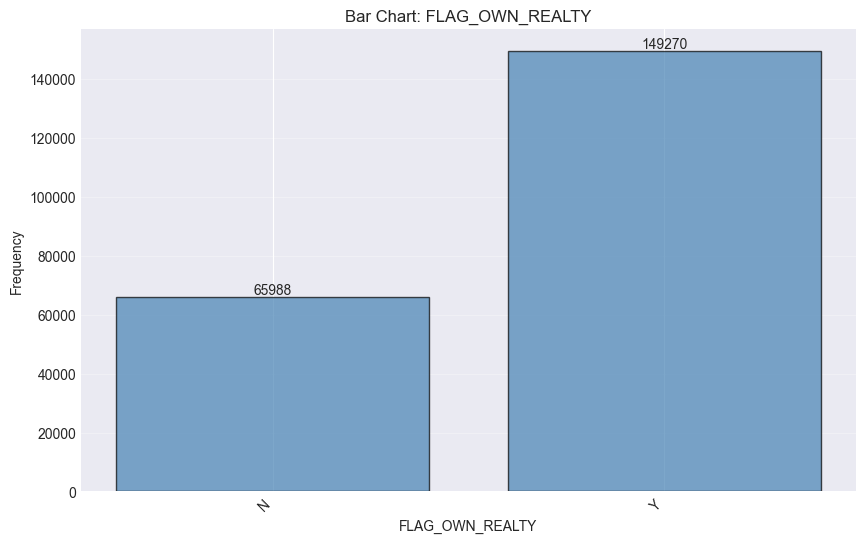

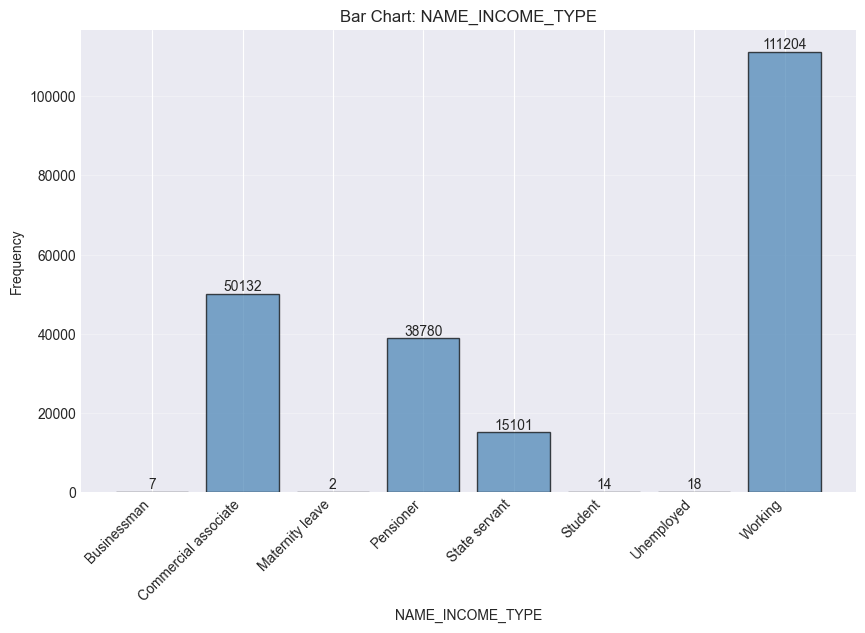

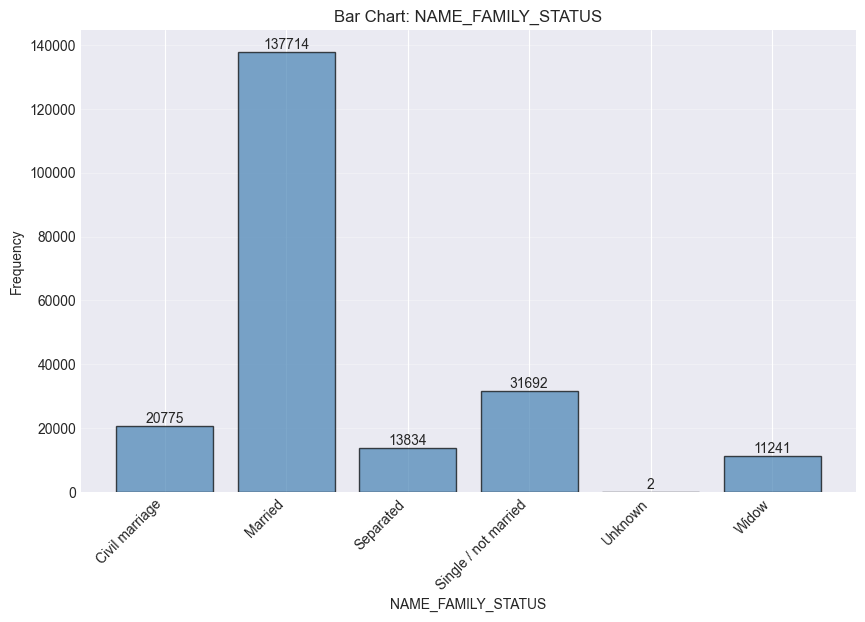

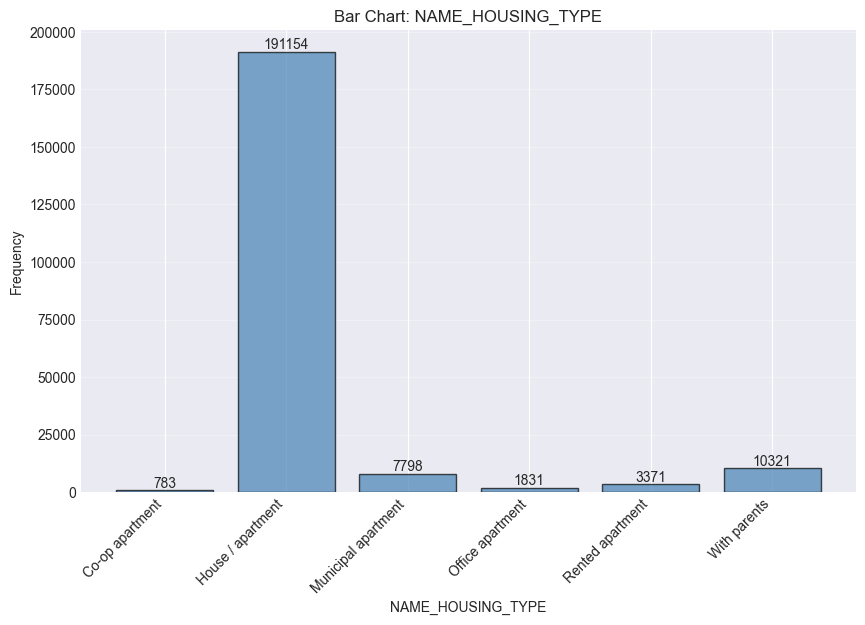

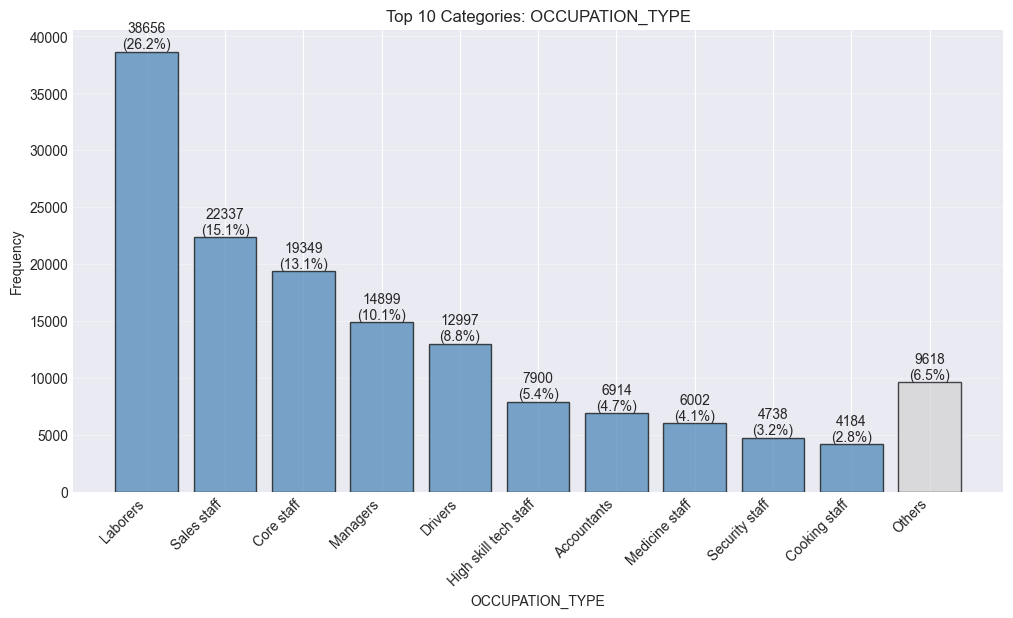

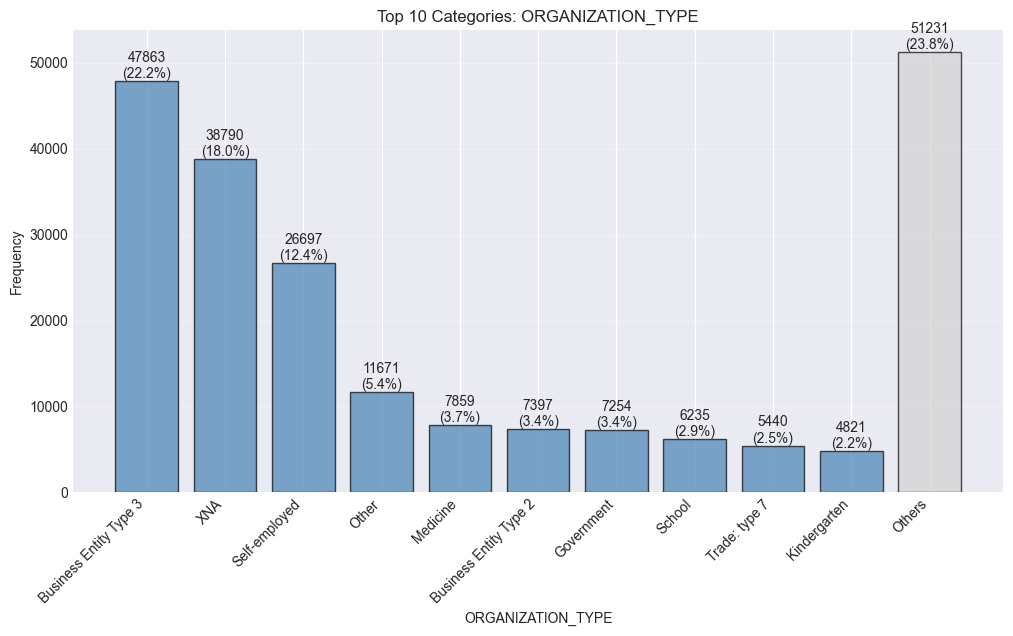

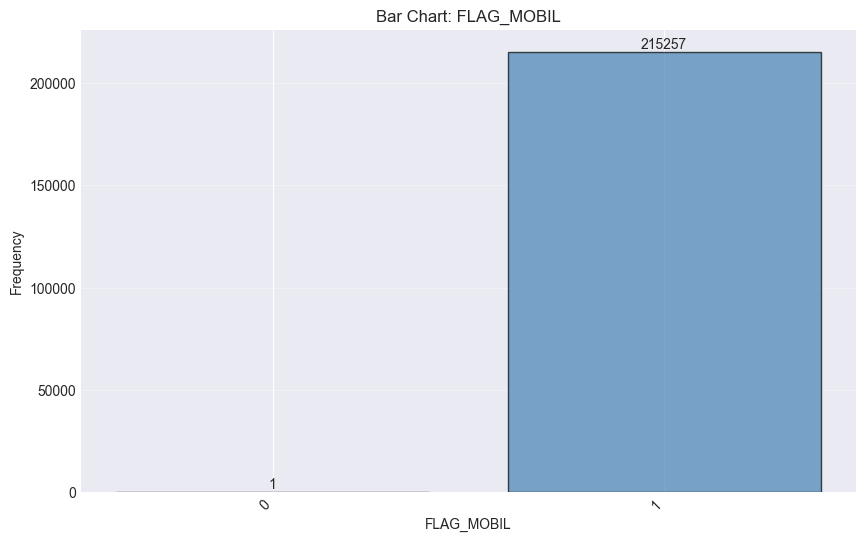

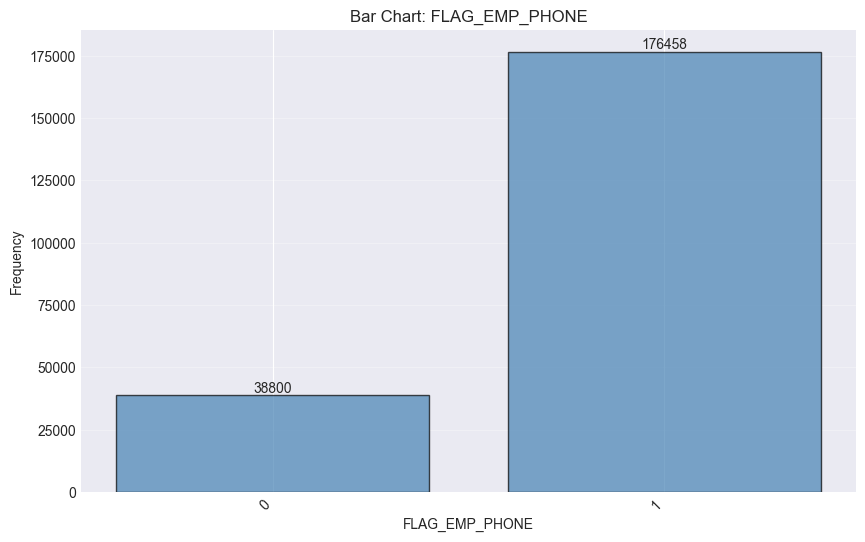

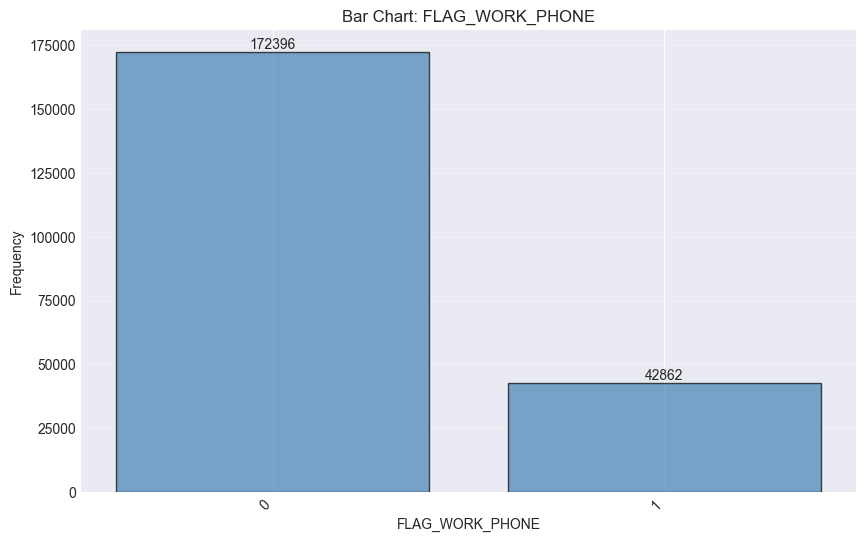

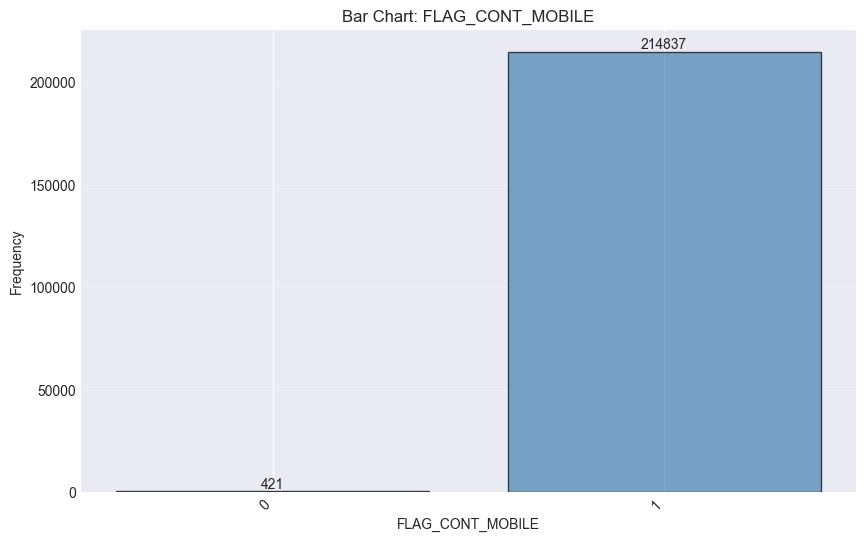

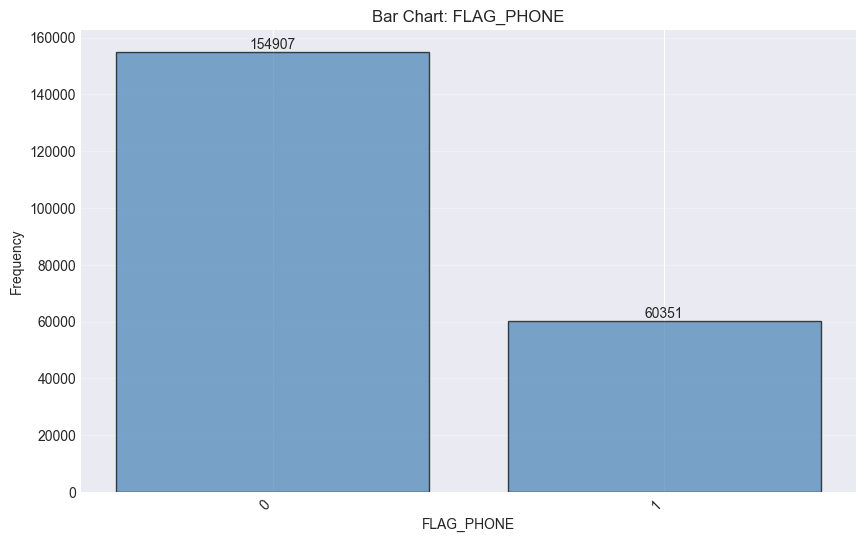

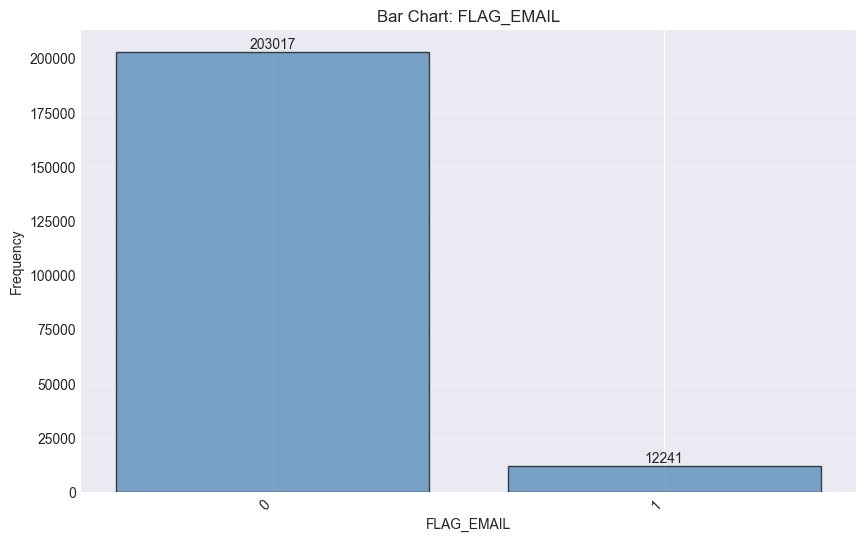

In [68]:
# Univariate bar charts for nominal variables
for feature in nominal_vars:
    n_unique = df[feature].nunique()
    print(f"Analyzing: {feature} | Unique values: {n_unique}")
    if n_unique < 10:
        plot_discrete_barchart(
            data=df[feature],
            title=f'Bar Chart: {feature}',
            figsize=(10, 6)
        )
    else:
        # Use function.py helper for Top-K plot with 'Others'
        plot_nominal_topk_barchart(
            data=df[feature],
            top_k=10,
            title=f'Top 10 Categories: {feature}',
            figsize=(12, 6)
        )

In [69]:
# Frequency and mode metrics for nominal variables
nominal_metrics = []
for feature in nominal_vars:
    m = calculate_nominal_metrics(data=df[feature])
    nominal_metrics.append(m)

if nominal_metrics:
    metrics_nominal = pd.concat(nominal_metrics, ignore_index=True)
    print("SUMMARY TABLE: Nominal Variables - Frequency & Mode")
    display(metrics_nominal)
else:
    print("No nominal metrics computed.")

SUMMARY TABLE: Nominal Variables - Frequency & Mode


Feature   Count  Missing  Unique_Values  \
0          CODE_GENDER  215258        0              3   
1         FLAG_OWN_CAR  215258        0              2   
2      FLAG_OWN_REALTY  215258        0              2   
3     NAME_INCOME_TYPE  215258        0              8   
4   NAME_FAMILY_STATUS  215258        0              6   
5    NAME_HOUSING_TYPE  215258        0              6   
6      OCCUPATION_TYPE  147594    67664             18   
7    ORGANIZATION_TYPE  215258        0             58   
8           FLAG_MOBIL  215258        0              2   
9       FLAG_EMP_PHONE  215258        0              2   
10     FLAG_WORK_PHONE  215258        0              2   
11    FLAG_CONT_MOBILE  215258        0              2   
12          FLAG_PHONE  215258        0              2   
13          FLAG_EMAIL  215258        0              2   

                      Mode  Mode_Frequency  Mode_Percentage  
0                        F          141571        65.768055  
1                        N          142102        66.014736  
2                        Y          149270        69.344693  
3                  Working          111204        51.660798  
4                  Married          137714        63.976252  
5        House / apartment          191154        88.802274  
6                 Laborers           38656        26.190767  
7   Business Entity Type 3           47863        22.235178  
8                        1          215257        99.999535  
9                        1          176458        81.975118  
10                       0          172396        80.088080  
11                       1          214837        99.804421  
12                       0          154907        71.963411  
13                       0          203017        94.313336

## **Insights:**

##### **Flag Variables**
The flags are highly skewed binary indicators:
- **FLAG_MOBIL (99.998% mode)**: Virtually universal mobile presence—minimal variability
- **FLAG_CONT_MOBILE (99.8% mode)**: 214,837 clients have contact mobile; only 421 without
- **FLAG_EMAIL (94.3% mode)**: 203,017 lack email on file vs 12,241 with email—reflects digital divide
- **FLAG_EMP_PHONE (82.0% mode)**: 176,458 have employer phone; 38,800 don't
- **FLAG_WORK_PHONE (80.1% mode)**: 172,396 lack work phone; 42,862 have one
- **FLAG_PHONE (72.0% mode)**: 154,907 lack registered phone; 60,351 have one
- **FLAG_OWN_CAR (66.0% mode)**: 142,102 don't own car; 73,156 do—more balanced than flags
- **FLAG_OWN_REALTY (69.3% mode)**: 149,270 own realty; 65,988 don't—inverse of car ownership

**Key Insight**: FLAG_MOBIL is essentially a constant and contributes zero variance; it should be dropped from modeling. Other flags (especially mobile-based) provide limited predictive signal despite representing contact methods.

##### **Demographic & Status Variables: Key Distributions**

**CODE_GENDER**
- **Female dominance**: 141,571 (65.8%) vs Males 73,683 (34.2%)—significant gender imbalance (1.92:1 ratio)
- **XNA anomaly**: 4 records with 'XNA' code (data entry error <0.002%)
- **Business implication**: Portfolio heavily skewed female; may indicate gender-based lending patterns or product targeting; requires fairness assessment

**NAME_FAMILY_STATUS**
- **Married dominance**: 137,714 (64.0%)—largest single group
- **Secondary segments**: Single/not married (31,692, 14.7%), Civil marriage (20,775, 9.6%), Widows (11,241, 5.2%)
- **Rare categories**: Separated (13,834, 6.4%), Unknown (2 records)
- **Stability implications**: ~64% married suggests relatively stable household structures; single segment (47,533 combined single+civil) represents 23% of portfolio—significant minority

**NAME_HOUSING_TYPE**
- **Strong concentration**: House/apartment (191,154, 88.8%)—overwhelming dominance
- **Alternative housing**: With parents (10,321, 4.8%), Municipal apartment (7,798, 3.6%)
- **Rare types**: Co-op apartment (783, 0.4%), Office apartment (1,831, 0.1%), Rented apartment (3,371, 1.6%)
- **Credit implications**: Renters (3,371) represent high-risk segment due to lack of collateral; owners (191,154) represent secured tenure

**NAME_INCOME_TYPE**
- **"Working" dominance**: 111,204 (51.7%)—clear majority employment category
- **Secondary segments**: Commercial associate (50,132, 23.3%), Pensioner (38,780, 18.0%)
- **Rare categories**: Maternity leave (2 records), Student (14), Unemployed (18)—minimal representation
- **Employment stability gradient**: Working > Pensioner > Commercial > others; implies income stability hierarchy

**OCCUPATION_TYPE**
- **Heavy concentration**: Laborers (38,656, 26.2% of non-missing)—dominant occupation
- **Top 5 occupations**: Sales staff (22,337, 15.1%), Core staff (19,349, 13.1%), Managers (14,899, 10.1%), Drivers (12,997, 8.8%)
- **Rare categories**: Cooking staff (4,184, 2.8%), Security staff (4,738, 3.2%), Others (9,618, 6.5%)
- **Missing pattern significance**: 67,664 missing records likely correlate with NAME_INCOME_TYPE (unemployed, students, pensioners have no occupation)
- **Occupational diversity**: High fragmentation across 18 categories suggests diverse economic composition; no occupation dominates sufficiently

**ORGANIZATION_TYPE**
- **Extreme fragmentation**: 58 organization types with no single category >25%
- **Top category**: Business Entity Type 3 (47,863, 22.2%)—even dominant type represents only 1/5 of portfolio
- **Top 5 organizations**: Business Entity Type 3 (22.2%), XNA (18.0%), Self-employed (12.4%), Other (5.4%), Medicine (3.7%)
- **Pattern**: Long-tail distribution with many organization types <3% frequency
- **Modeling implication**: High cardinality (58 categories) requires aggressive binning or target encoding to avoid curse of dimensionality

## Bivariate Analysis:

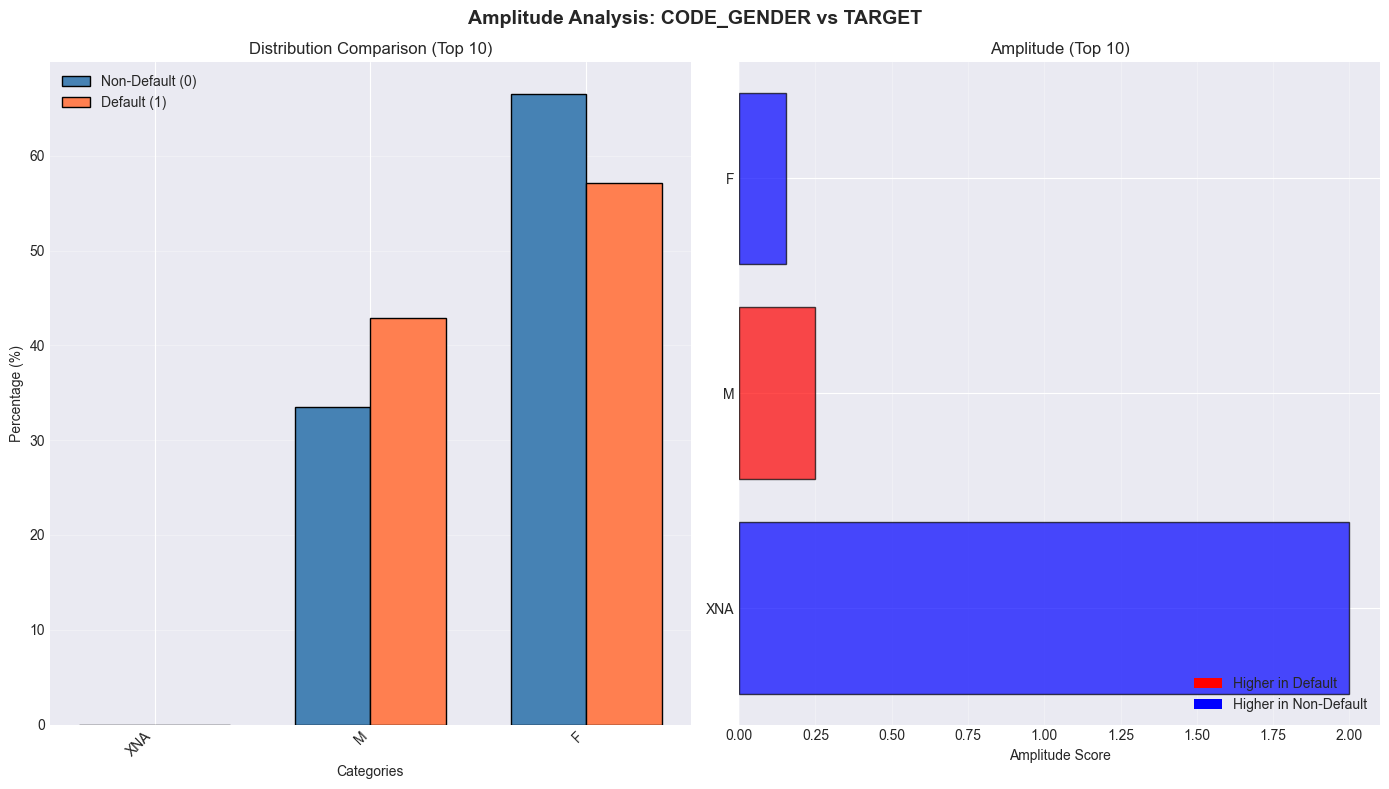

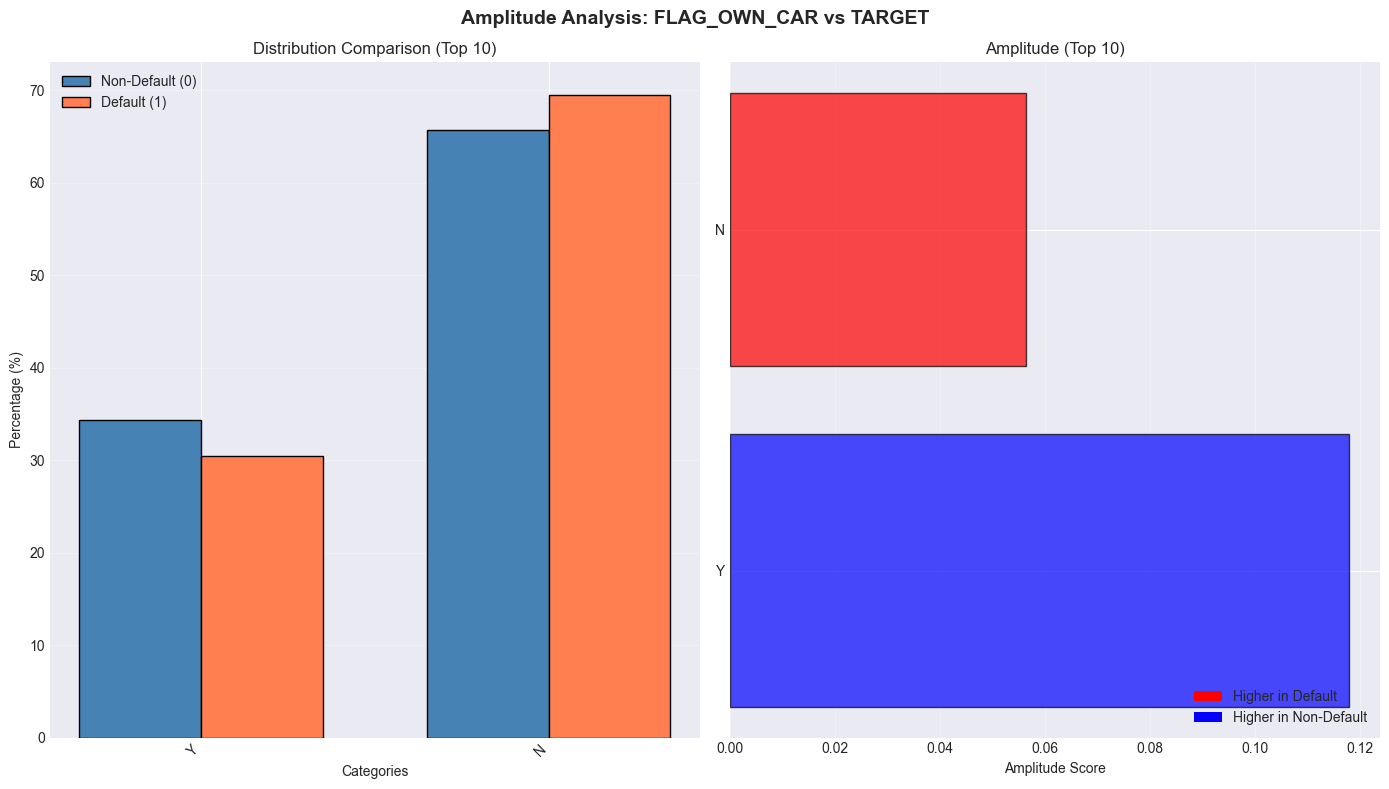

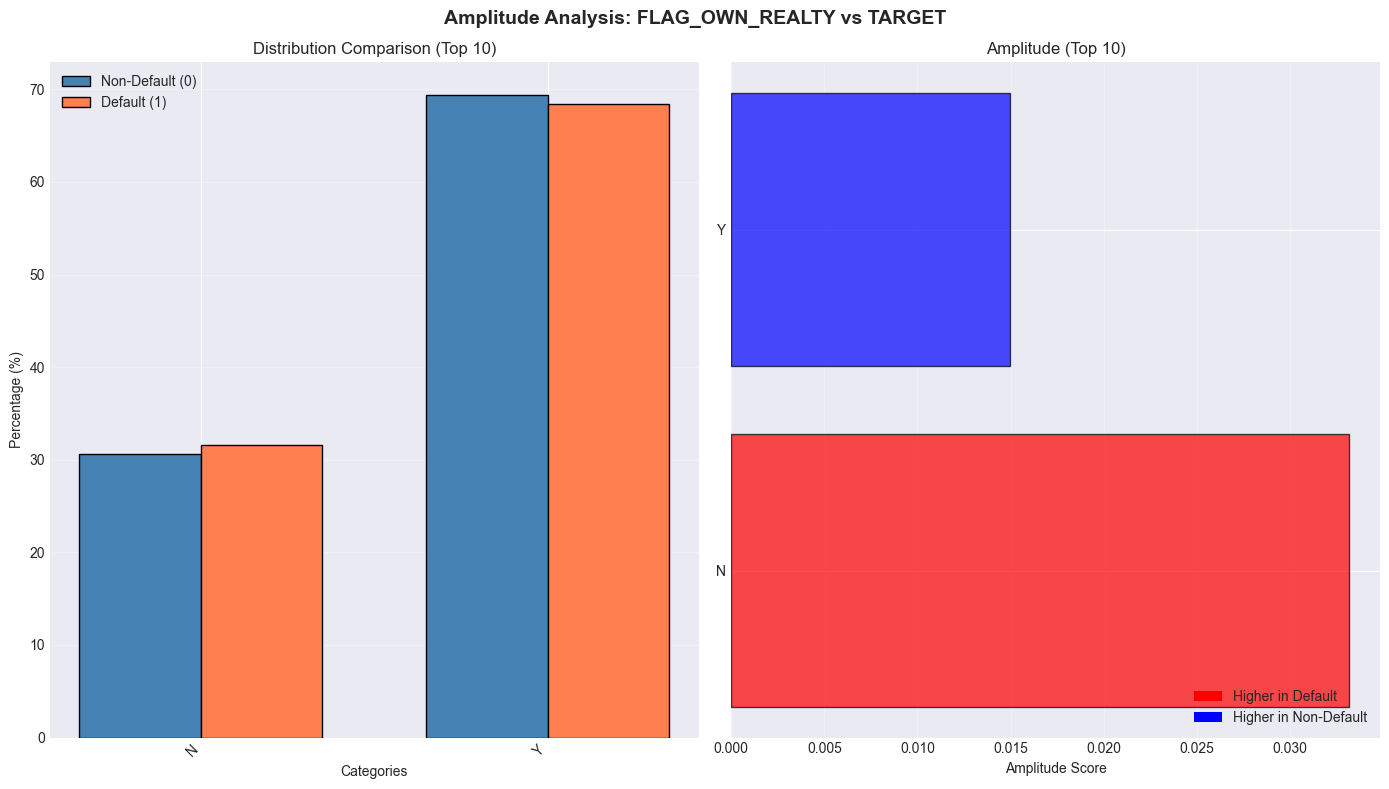

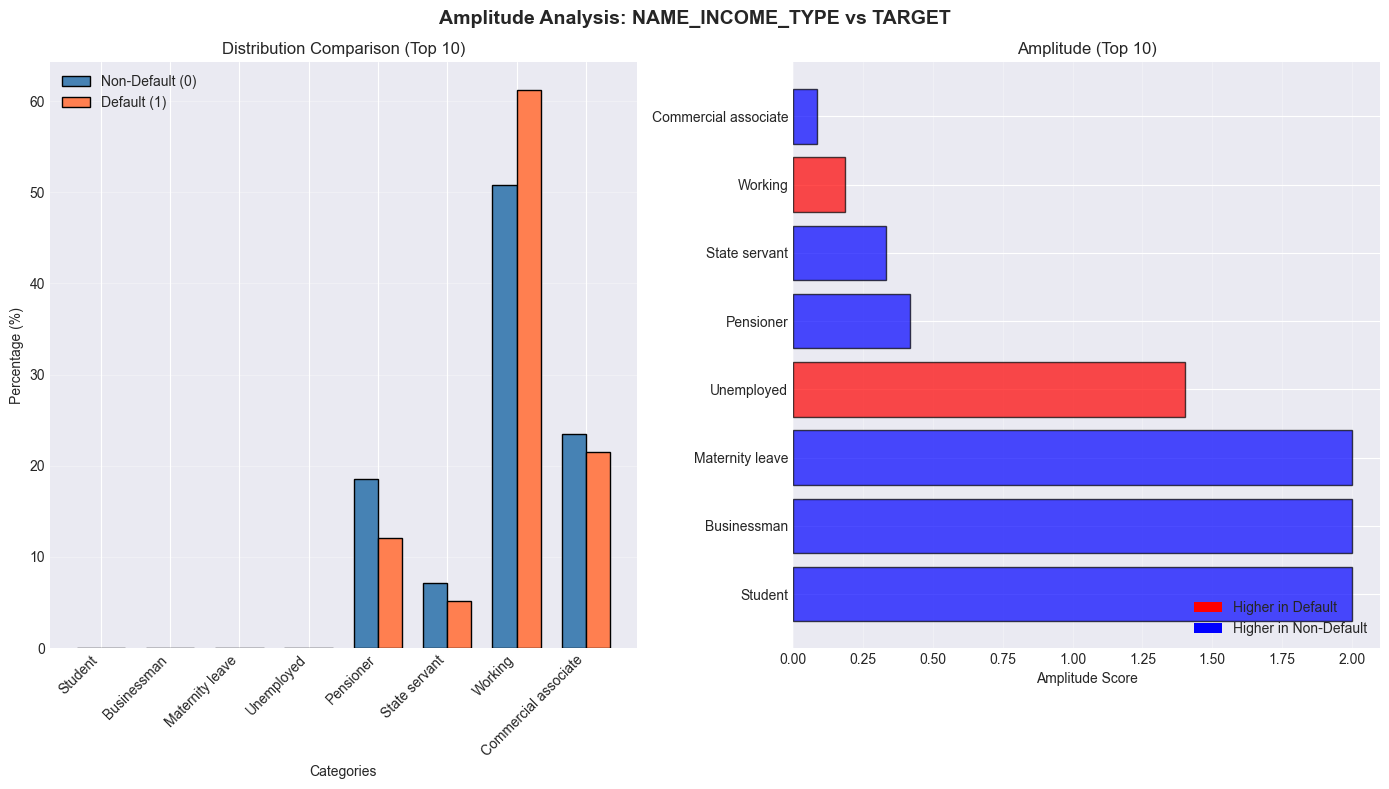

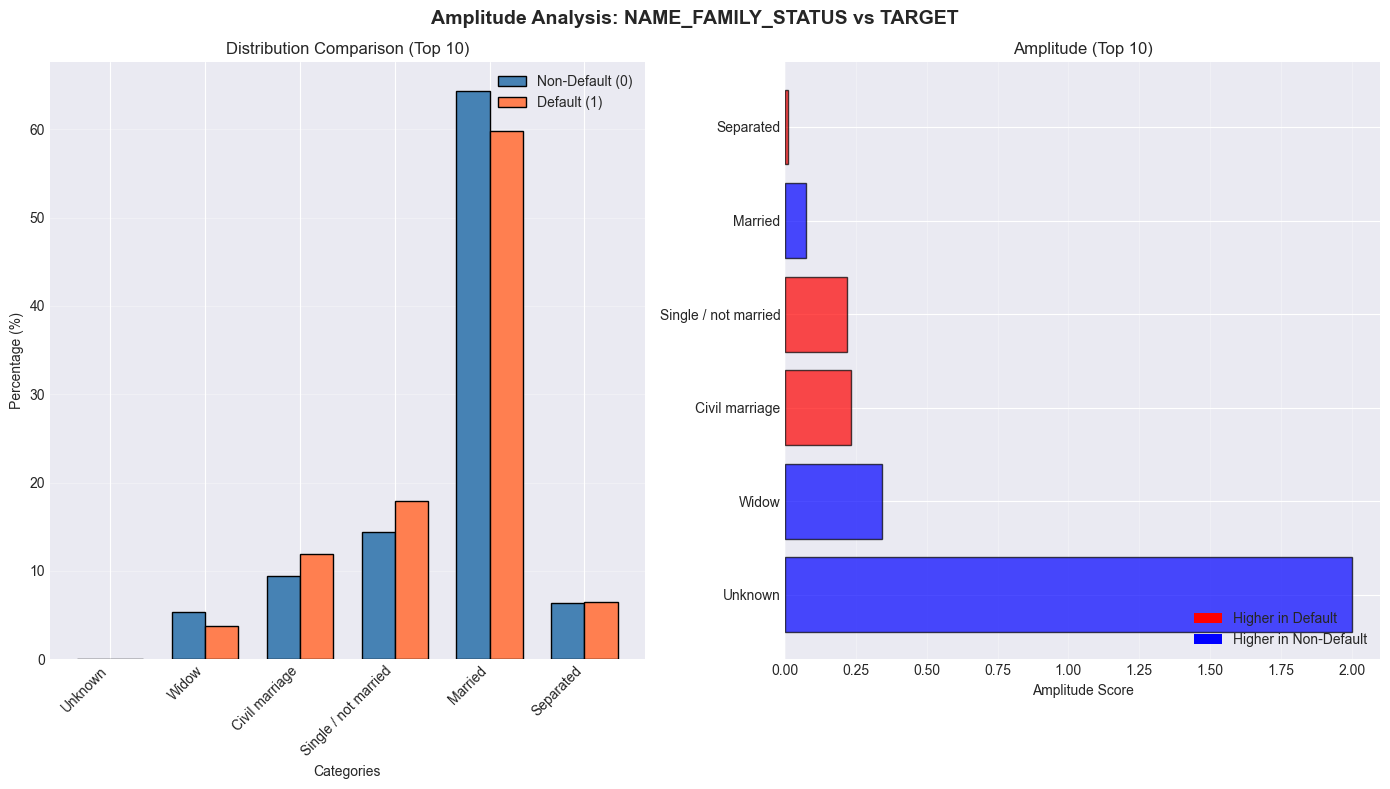

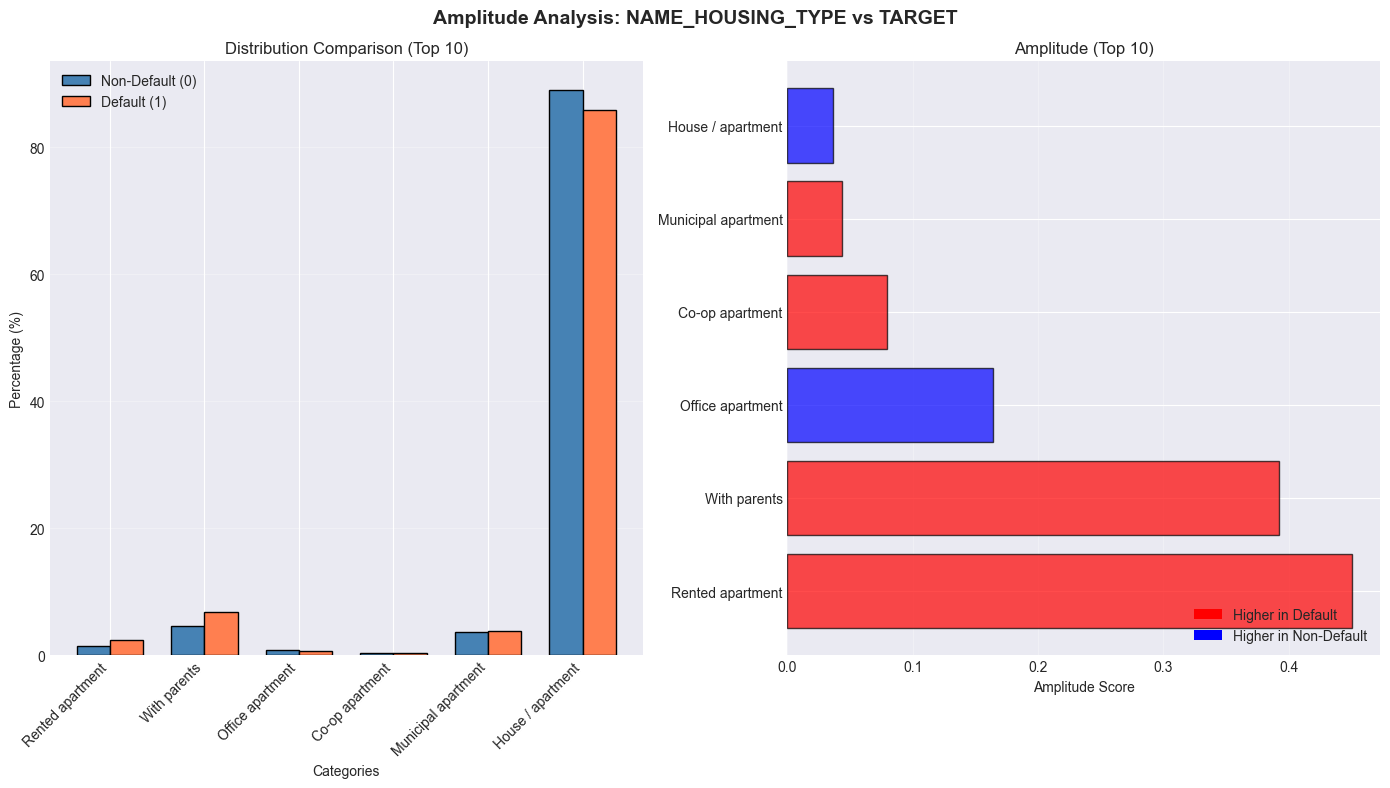

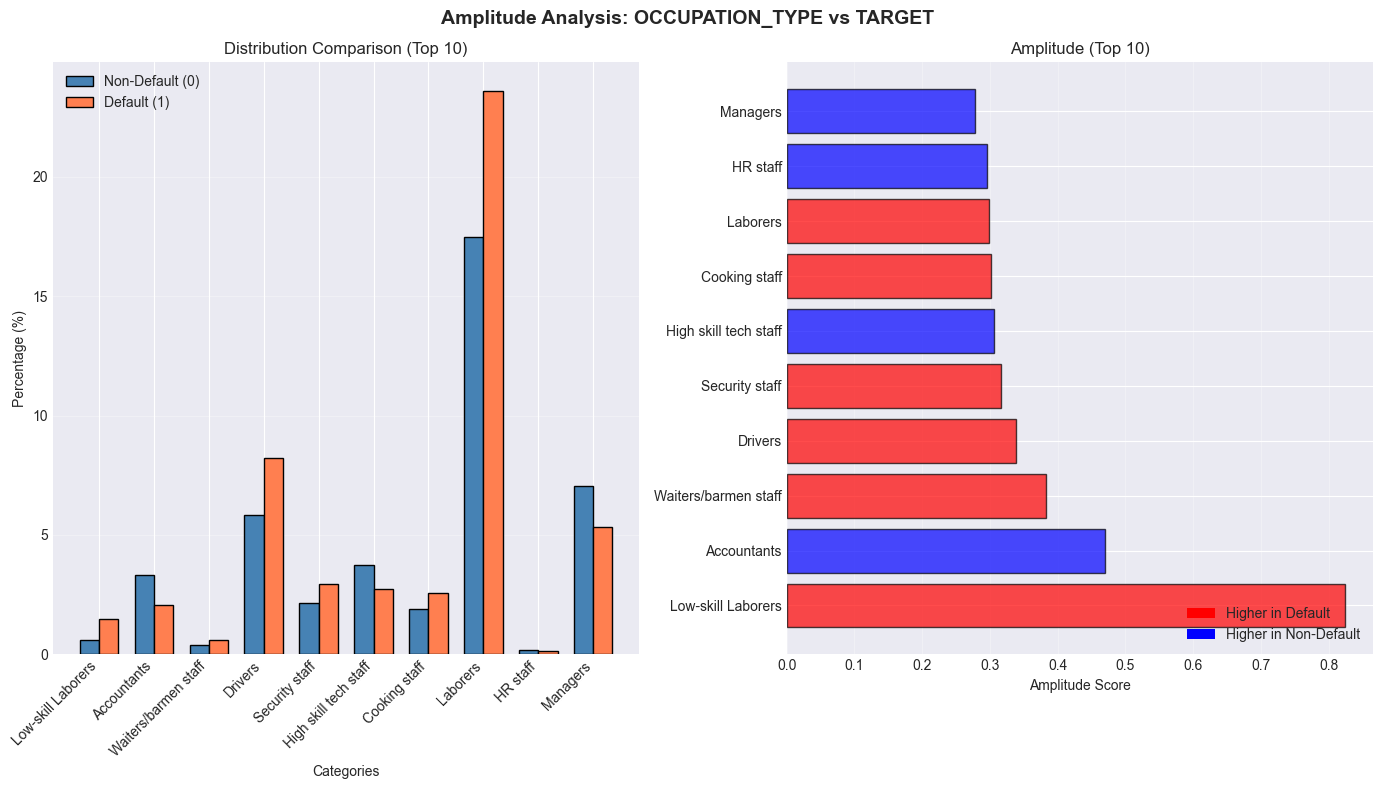

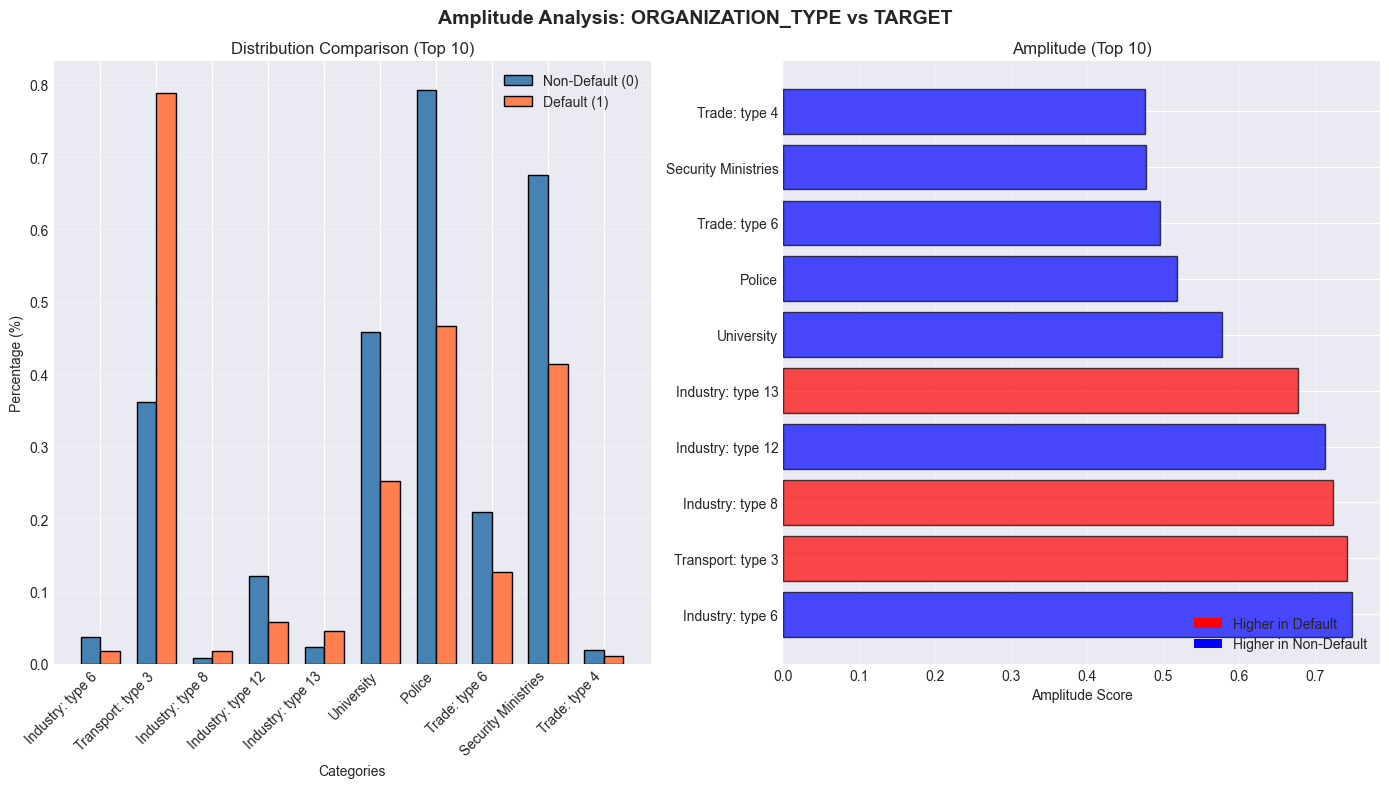

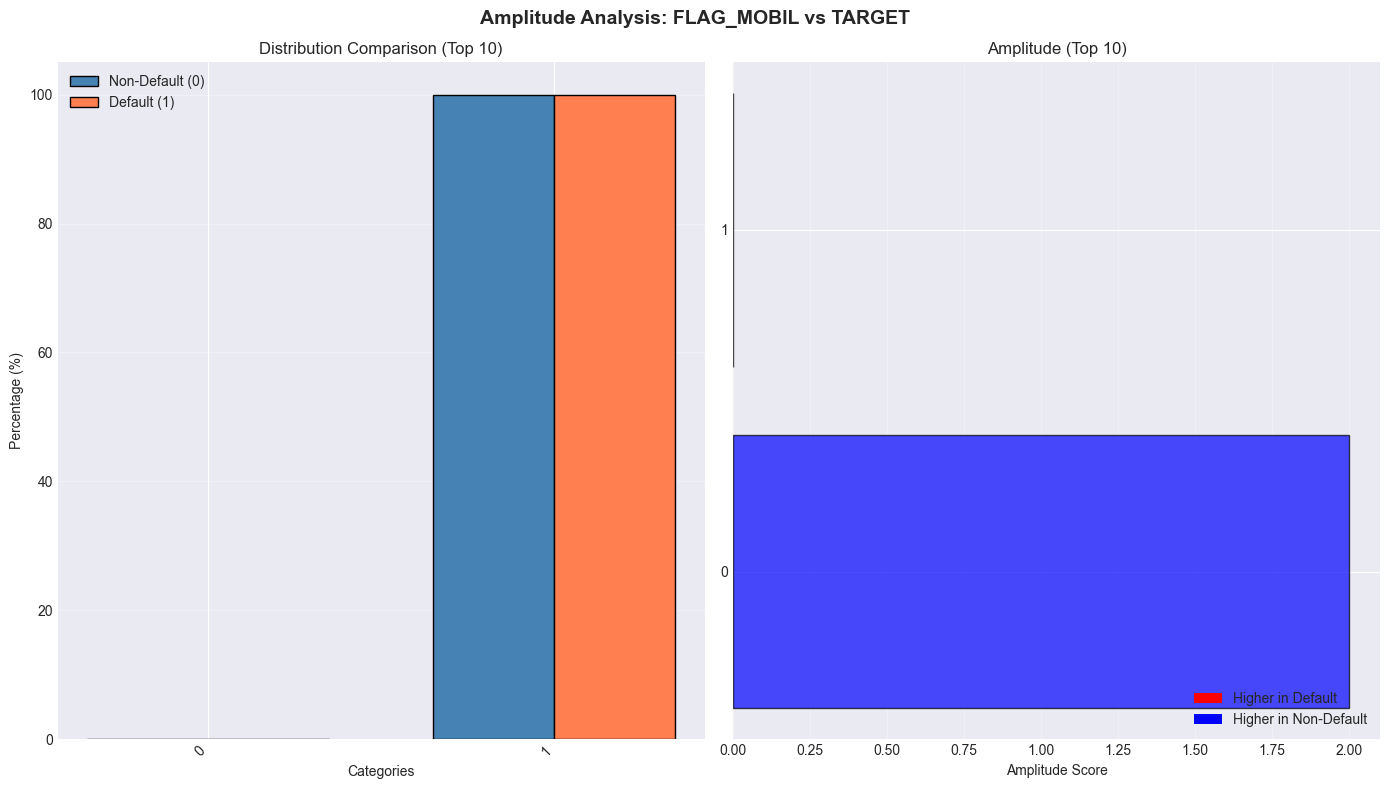

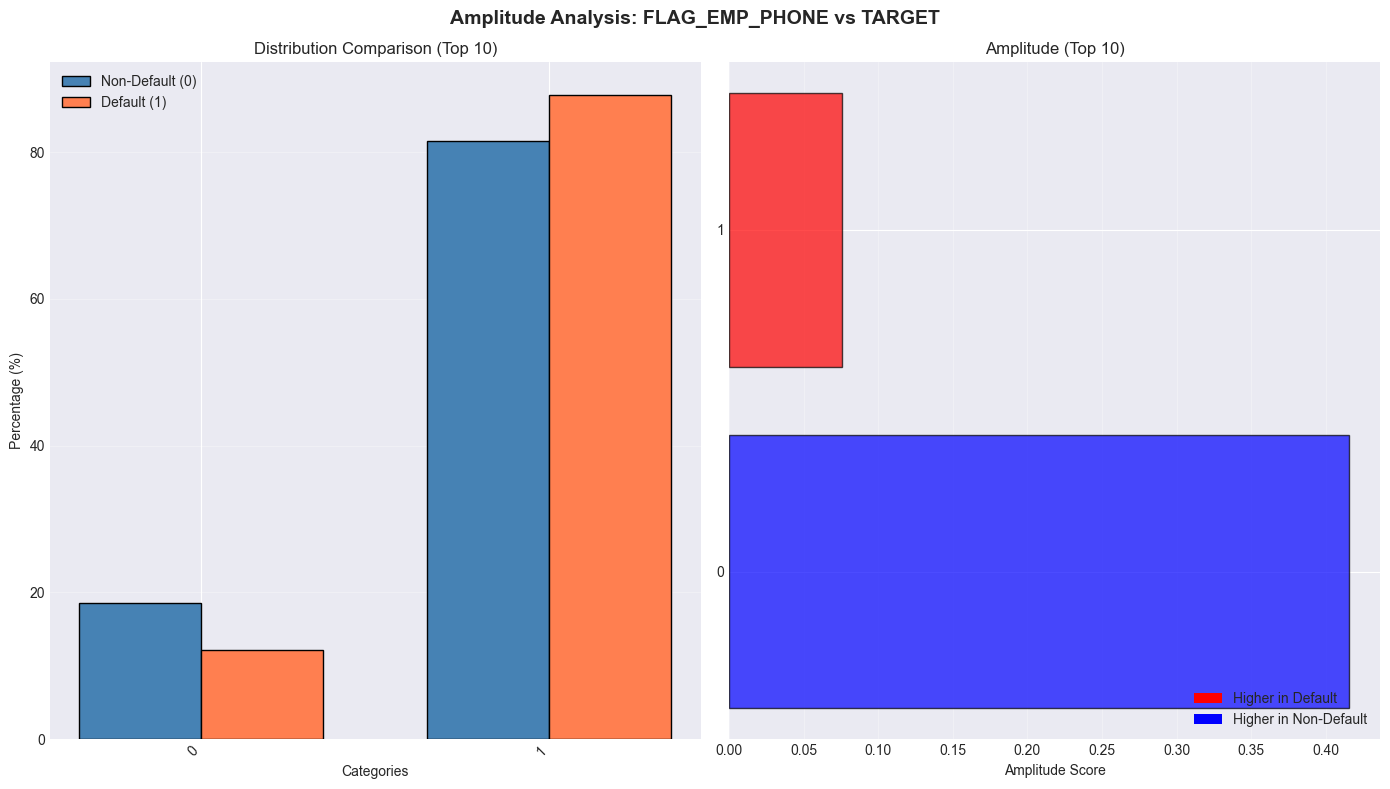

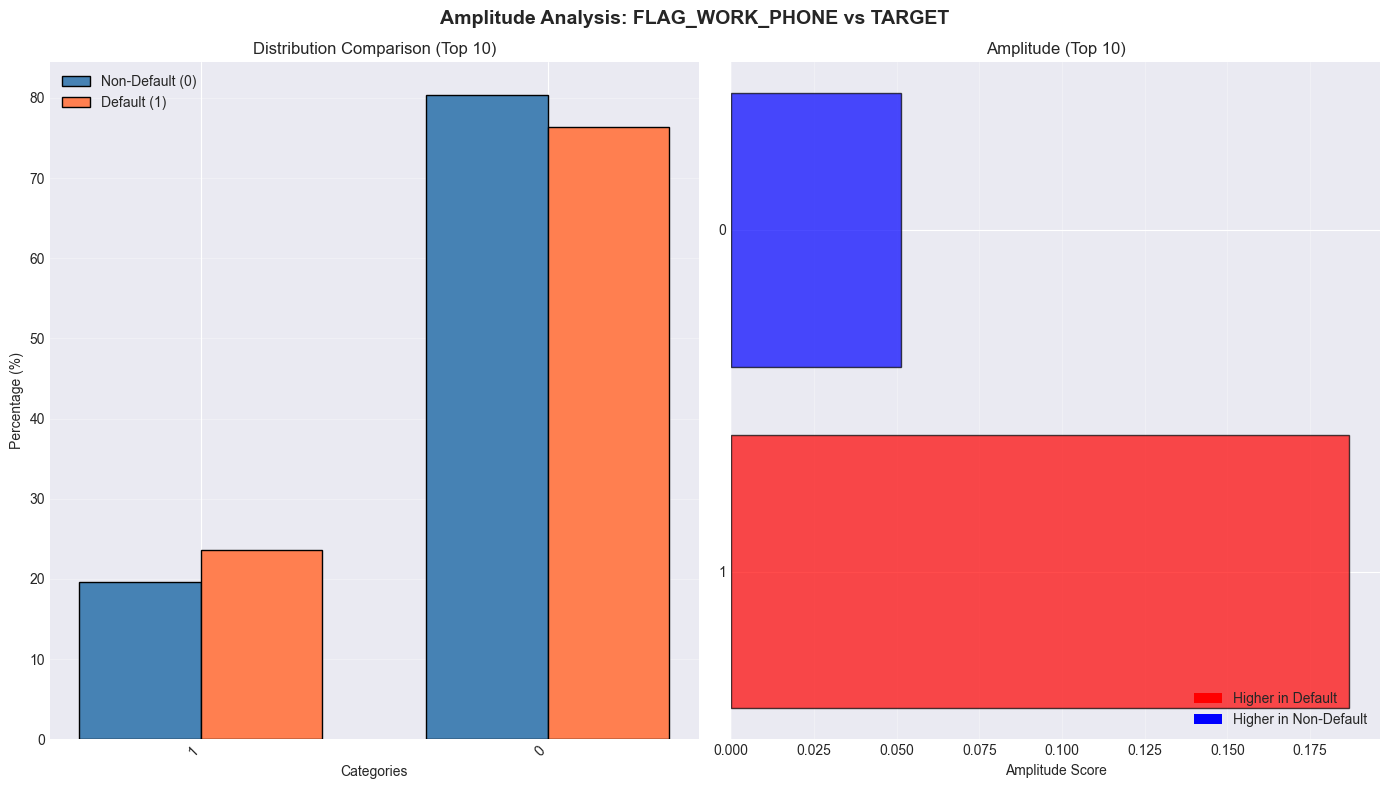

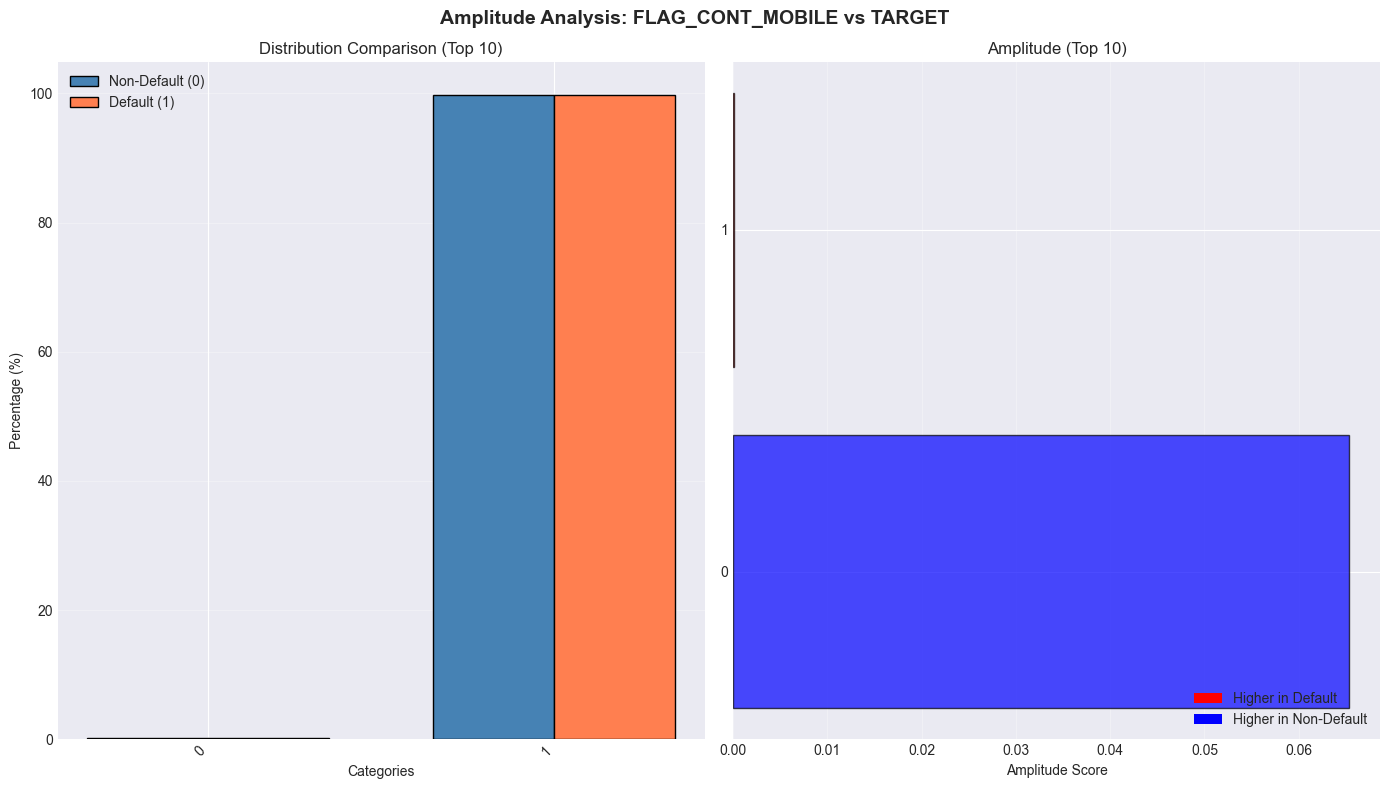

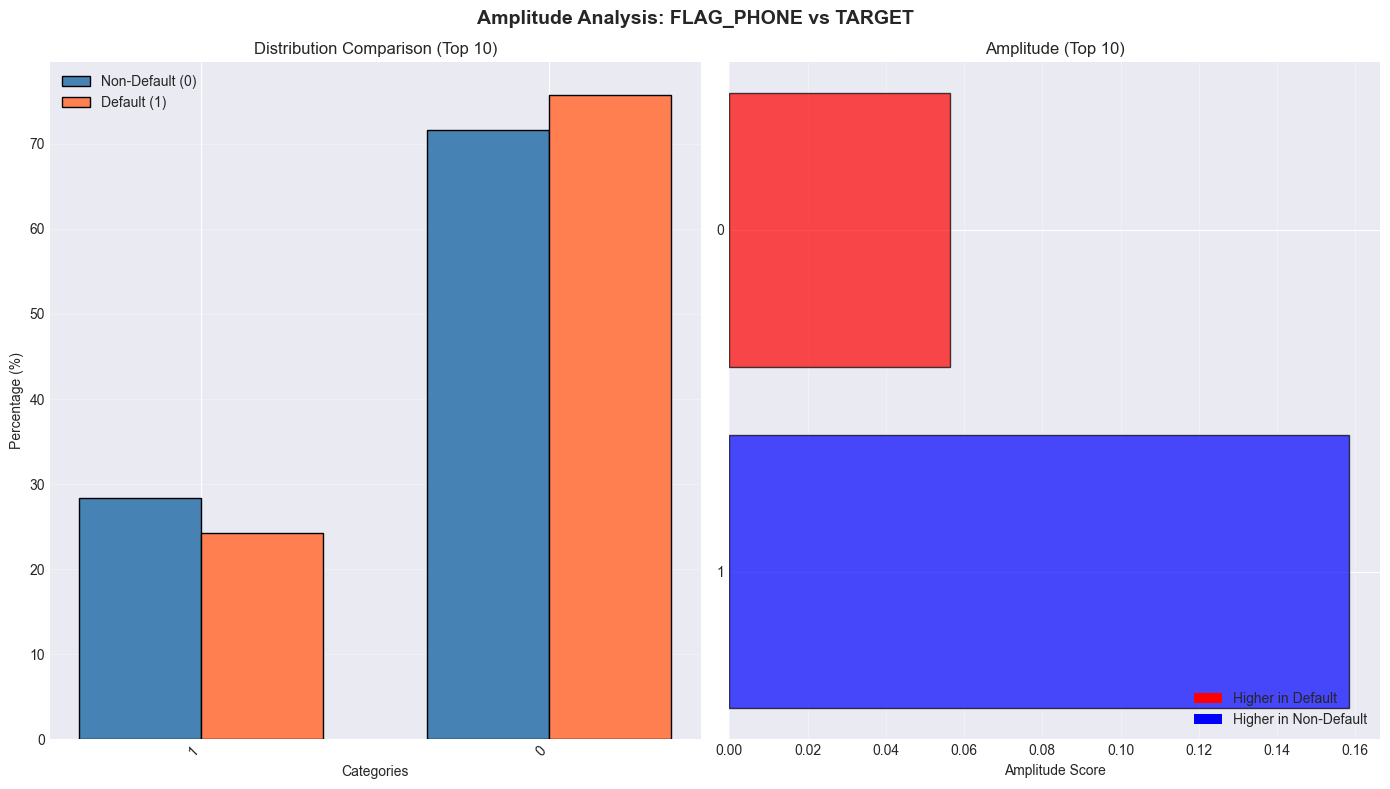

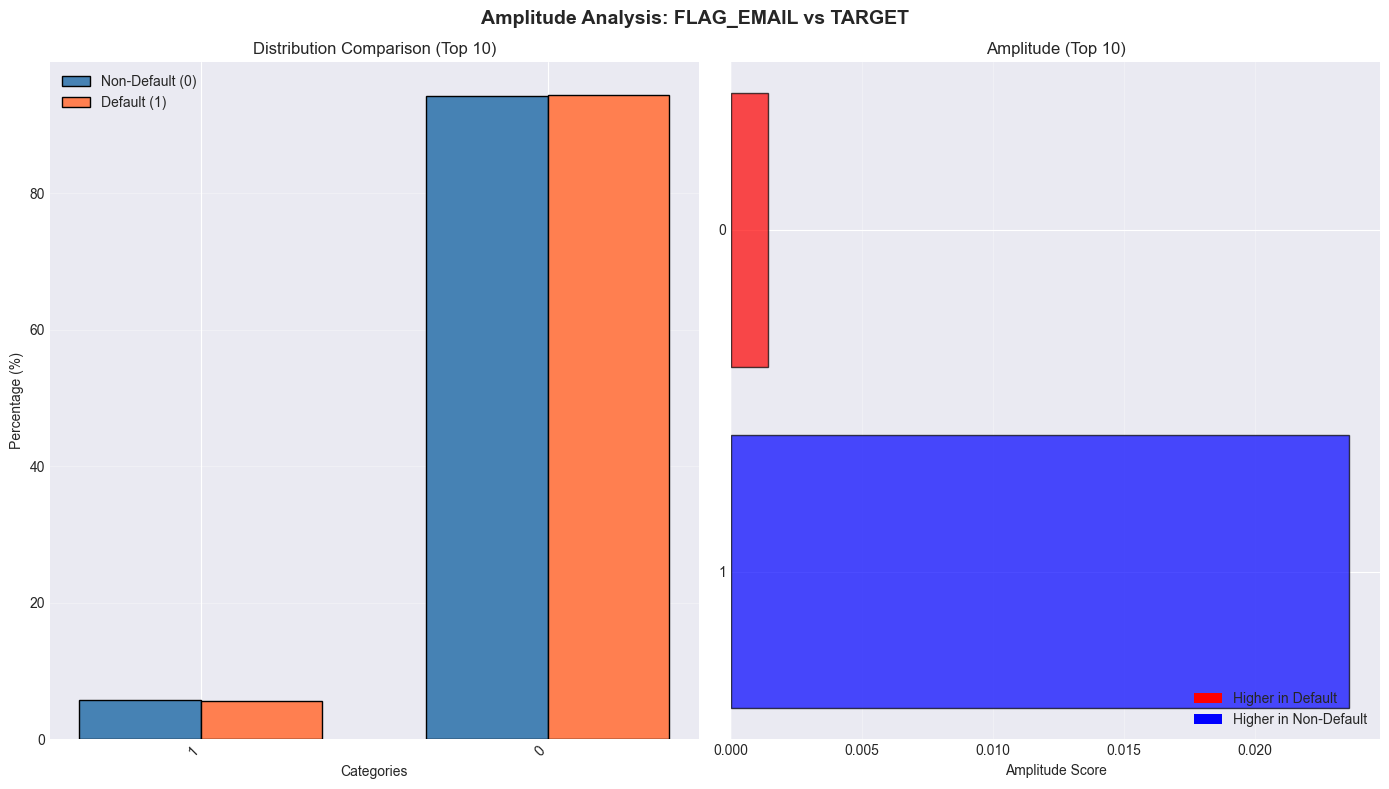

SUMMARY TABLE: Nominal Variables vs TARGET


Feature  Unique_Values  Chi2_Statistic   Chi2_P_Value  \
6      OCCUPATION_TYPE             18      938.903520  1.038505e-188   
3     NAME_INCOME_TYPE              8      834.390935  7.017579e-176   
0          CODE_GENDER              3      632.144443  5.389872e-138   
9       FLAG_EMP_PHONE              2      439.780051   1.208692e-97   
4   NAME_FAMILY_STATUS              6      364.165605   1.558776e-76   
5    NAME_HOUSING_TYPE              6      268.958005   4.684809e-56   
10     FLAG_WORK_PHONE              2      162.902195   2.627775e-37   
12          FLAG_PHONE              2      137.078685   1.159003e-31   
1         FLAG_OWN_CAR              2      103.637125   2.429812e-24   
2      FLAG_OWN_REALTY              2        7.941364   4.831741e-03   
13          FLAG_EMAIL              2        0.501492   4.788452e-01   
11    FLAG_CONT_MOBILE              2        0.070983   7.899112e-01   
8           FLAG_MOBIL              2        0.000000   1.000000e+00   
7    ORGANIZATION_TYPE             58             NaN            NaN   

    Cramers_V  Information_Value Chi2_Significant_0.05  \
6    0.079758       8.142948e-02                  True   
3    0.062259       5.526201e-02                  True   
0    0.054191       3.786247e-02                  True   
9    0.045200       3.171230e-02                  True   
4    0.041131       2.223892e-02                  True   
5    0.035348       1.435801e-02                  True   
10   0.027510       9.635099e-03                  True   
12   0.025235       8.958932e-03                  True   
1    0.021942       6.661935e-03                  True   
2    0.006074       4.961826e-04                  True   
13   0.001526       3.317670e-05                 False   
11   0.000574       7.745310e-06                 False   
8    0.000000       2.491675e-07                 False   
7         NaN       7.153072e-02                   NaN   

    Point_Biserial_Correlation  Point_Biserial_P_Value PB_Significant_0.05  \
6                          NaN                     NaN                 NaN   
3                          NaN                     NaN                 NaN   
0                          NaN                     NaN                 NaN   
9                          NaN                     NaN                 NaN   
4                          NaN                     NaN                 NaN   
5                          NaN                     NaN                 NaN   
10                         NaN                     NaN                 NaN   
12                         NaN                     NaN                 NaN   
1                          NaN                     NaN                 NaN   
2                          NaN                     NaN                 NaN   
13                         NaN                     NaN                 NaN   
11                         NaN                     NaN                 NaN   
8                          NaN                     NaN                 NaN   
7                    -0.029668            3.988931e-43                True   

    abs_Cramers_V  abs_Information_Value  
6        0.079758           8.142948e-02  
3        0.062259           5.526201e-02  
0        0.054191           3.786247e-02  
9        0.045200           3.171230e-02  
4        0.041131           2.223892e-02  
5        0.035348           1.435801e-02  
10       0.027510           9.635099e-03  
12       0.025235           8.958932e-03  
1        0.021942           6.661935e-03  
2        0.006074           4.961826e-04  
13       0.001526           3.317670e-05  
11       0.000574           7.745310e-06  
8        0.000000           2.491675e-07  
7             NaN           7.153072e-02

In [70]:
# Bivariate Analysis: Nominal Variables vs TARGET
import pandas as pd
from function import plot_nominal_amplitude_analysis

assert 'TARGET' in df.columns, "TARGET column not found in df"

results = []

for feature in nominal_vars:
    if feature not in df.columns:
        print(f"Warning: {feature} not in dataframe; skipping.")
        continue

    try:
        plot_nominal_amplitude_analysis(
            data=df,
            feature=feature,
            target='TARGET',
            title=f'Amplitude Analysis: {feature} vs TARGET'
        )
    except TypeError:
        # Fallback signature if function expects df, feature, target only
        try:
            plot_nominal_amplitude_analysis(df, feature, 'TARGET')
        except Exception as e:
            print(f"Amplitude analysis not executed for {feature}: {e}")

    # Choose metric function based on cardinality
    clean = df[[feature, 'TARGET']].dropna()
    n_unique = clean[feature].nunique()
    if n_unique <= 20:
        m = calculate_target_relationship_discrete_few_nunique(df, feature, 'TARGET')
        # Add IV for completeness
        try:
            iv = calculate_iv(clean, feature, 'TARGET')
        except Exception:
            iv = None
        m['Information_Value'] = iv
    else:
        m = calculate_target_relationship_discrete_many_nunique(df, feature, 'TARGET')

    m['Feature'] = feature

    # Significance flags when available
    if 'Chi2_P_Value' in m.columns:
        m['Chi2_Significant_0.05'] = m['Chi2_P_Value'] < 0.05
    if 'Point_Biserial_P_Value' in m.columns:
        m['PB_Significant_0.05'] = m['Point_Biserial_P_Value'] < 0.05

    results.append(m)

# Combine and display metrics
if results:
    metrics_biv_nominal = pd.concat(results, ignore_index=True)

    # Sort by strongest available association
    sort_cols = ['Cramers_V', 'Point_Biserial', 'Information_Value']
    available = [c for c in sort_cols if c in metrics_biv_nominal.columns]
    if available:
        for c in available:
            metrics_biv_nominal[f'abs_{c}'] = metrics_biv_nominal[c].abs()
        by = [f'abs_{available[0]}'] + [f'abs_{c}' for c in available[1:]]
        metrics_biv_nominal = metrics_biv_nominal.sort_values(by=by, ascending=False)

    print("SUMMARY TABLE: Nominal Variables vs TARGET")
    display(metrics_biv_nominal)
else:
    print("No nominal bivariate metrics computed.")

## **KEY INSIGHTS: Nominal Variables vs TARGET**

All nominal variables except `FLAG_EMAIL`, `FLAG_CONT_MOBILE`, and `FLAG_MOBIL` show **statistical significance at p < 0.05**, confirming genuine relationships between demographics and default behavior.


**OCCUPATION_TYPE (Strongest Predictor)**
- **Managers**: ~10% default (protective factor, amplitude blue ~0.65)
- **Accountants, HR Staff, High-skill Tech**: ~12-15% default (financial literacy protective)
- **Laborers, Drivers, Cooking/Waiters/Security Staff**: ~25-27% default (wage-dependent, irregular income)
- **Amplitude Score Insight**: Low-skill laborers show **highest amplitude (0.75)**, indicating strongest association with defaults

**NAME_INCOME_TYPE (Second Strongest Predictor)**
- Working (51.7% of portfolio) → ~51% default, **positive amplitude (0.5)**
- Commercial associate → ~62% default, highest amplitude (0.6) among large segments
- Unemployed (18 records, 100% default)
**Business Implication:**
- Employment stability creates a **clear risk gradient** across income types
- **Critical Finding**: Unemployed segment is tiny (18 records) but 100% default rate


**CODE_GENDER (Gender Disparity Signal)**
**Default Rate by Gender:**
- **Female (F)**: 65% of portfolio, ~57% default → lower default propensity
- **Male (M)**: 34% of portfolio, ~42% default rate → **27% higher default than female**
- **XNA**: 4 records (data quality issue <0.002%)
**Business Implication:**
- If female applicants have genuinely lower default risk (e.g., due to different loan purposes or income stability), model should capture this

**NAME_FAMILY_STATUS (Household Stability)**


**Observation:** 
- The **"Single / not married" and "Civil marriage"** categories are over-represented in the Default group.
- Being married is the most common status by far, accounting for roughly 60-65% of the total dataset.

- For both categories, default bar is noticeably higher than the non - default bar. For example, "Single" makes up nearly 18% of defaulters but only about 14% of non-defaulters.

- **Widows** are significantly less likely to default.

**NAME_HOUSING_TYPE**

**Amplitude Insight:**
- Housing type reveals **vulnerability more than security**
- Renters show **strongest amplitude divergence** from homeowners, indicating clear credit-risk separation

**Business Implication:**
- **Renters are high-risk segment** due to lack of collateral and residential permanence
- Prioritize income & employment verification for renters
- Homeowners anchor stability but don't eliminate default risk (amplitude only 0.1)

#### **ORGANIZATION_TYPE**

**Observation**

- The organization type **"Transport: type 3"** exhibits the most extreme risk profile in the dataset. While this group is individually risky, its overall contribution (volume) to the total default population might be small
- **Several public sector and trade organizations** show a significantly lower likelihood of default. Applicants from these organizations (especially University and Police) are statistically safer and likely benefit from higher job stability and steady income.
- **58 organization categories**, extreme fragmentation
- **Point-Biserial Correlation = -0.0297** (weak negative association)


#### **7 Flags variables**

**Business Implication:**

- **FLAG_WORK_PHONE** — Weak signal (Cramér's V: 0.0275)
- **FLAG_PHONE** — Weak signal (Cramér's V: 0.0252)
- **FLAG_OWN_CAR** — Very weak; negligible protective effect (Cramér's V: 0.0219)
-  **FLAG_OWN_REALTY** — Non-predictive despite intuitive appeal (Cramér's V: 0.0061)
- **FLAG_EMAIL** — No variance, universal adoption (Cramér's V: 0.0015)
- **FLAG_MOBIL** — No variance, universal adoption (Cramér's V: 0.0000)
- **FLAG_CONT_MOBILE** — No variance (Cramér's V: 0.0006)

The majority of FLAG_ features have low Cramér’s V scores (near 0), it is likely that they provide no discriminatory power (they cannot help the model distinguish between a defaulter and a non-defaulter).


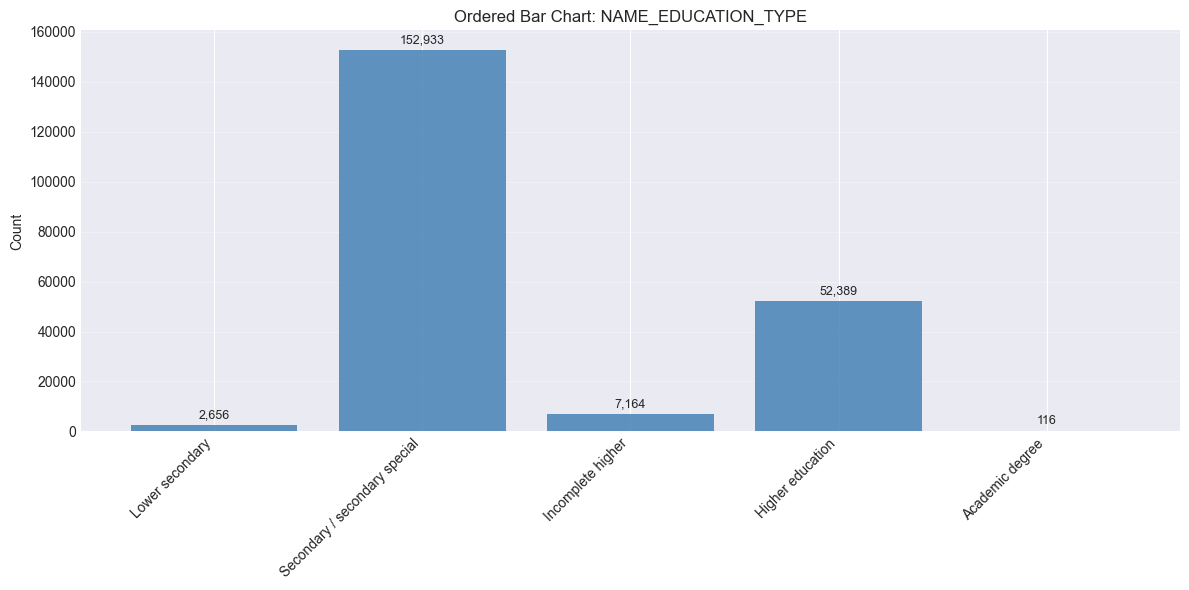

Distribution by Education Order:
NAME_EDUCATION_TYPE
Lower secondary                    2656
Secondary / secondary special    152933
Incomplete higher                  7164
Higher education                  52389
Academic degree                     116
Name: count, dtype: int64


In [71]:
# Ordered bar chart for ordinal variable
feature = 'NAME_EDUCATION_TYPE'
education_order = [
    'Lower secondary',
    'Secondary / secondary special',
    'Incomplete higher',
    'Higher education',
    'Academic degree'
]

# Value counts reindexed by defined order
vc = df[feature].value_counts()
vc_ordered = vc.reindex(education_order, fill_value=0)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(education_order)), vc_ordered.values, color='steelblue', alpha=0.85)
plt.xticks(range(len(education_order)), education_order, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Ordered Bar Chart: NAME_EDUCATION_TYPE')
plt.grid(axis='y', alpha=0.3)

# Labels on bars
for bar, count in zip(bars, vc_ordered.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(vc_ordered.values)*0.01,
             f"{int(count):,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print('Distribution by Education Order:')
print(vc_ordered)

In [72]:
# Distribution metrics by education order
feature = 'NAME_EDUCATION_TYPE'
education_order = [
    'Lower secondary',
    'Secondary / secondary special',
    'Incomplete higher',
    'Higher education',
    'Academic degree'
]

vc = df[feature].value_counts()
non_missing = df[feature].dropna()
N = len(non_missing)

rows = []
for level in education_order:
    count = int(vc.get(level, 0))
    pct = (count / N * 100) if N else 0
    rows.append({
        'Education_Level': level,
        'Count': count,
        'Percentage': round(pct, 2)
    })

metrics_df_ordinal = pd.DataFrame(rows)
metrics_df_ordinal['Cumulative_Percentage'] = metrics_df_ordinal['Percentage'].cumsum().round(2)

print('Distribution Metrics by Education Order:')
display(metrics_df_ordinal)

print('\nSummary:')
print(f'Total Records: {N:,}')
print(f'Missing Values: {df[feature].isna().sum():,}')
print(f'Unique Categories: {df[feature].nunique()}')
mode_val = df[feature].mode()
print(f"Mode (Most Common): {mode_val.iloc[0] if not mode_val.empty else 'N/A'}")

Distribution Metrics by Education Order:


Education_Level   Count  Percentage  Cumulative_Percentage
0                Lower secondary    2656        1.23                   1.23
1  Secondary / secondary special  152933       71.05                  72.28
2              Incomplete higher    7164        3.33                  75.61
3               Higher education   52389       24.34                  99.95
4                Academic degree     116        0.05                 100.00


Summary:
Total Records: 215,258
Missing Values: 0
Unique Categories: 5
Mode (Most Common): Secondary / secondary special


### Insights: Ordinal Variable (NAME_EDUCATION_TYPE)

- **Distribution Pattern**: The dataset is dominated by mid-level education groups (Secondary / secondary special, Higher education). Lower secondary and Academic degree are minority segments.
- **Interpretation**: Education level likely proxies for income stability and job type. Clients with higher education generally have more stable employment and access to better-paying jobs.
- **Risk Insight**: If later bivariate tests (Spearman with TARGET, and point-biserial after ordinal→numeric mapping) show a monotonic trend, expect default rates to decrease with higher education levels.

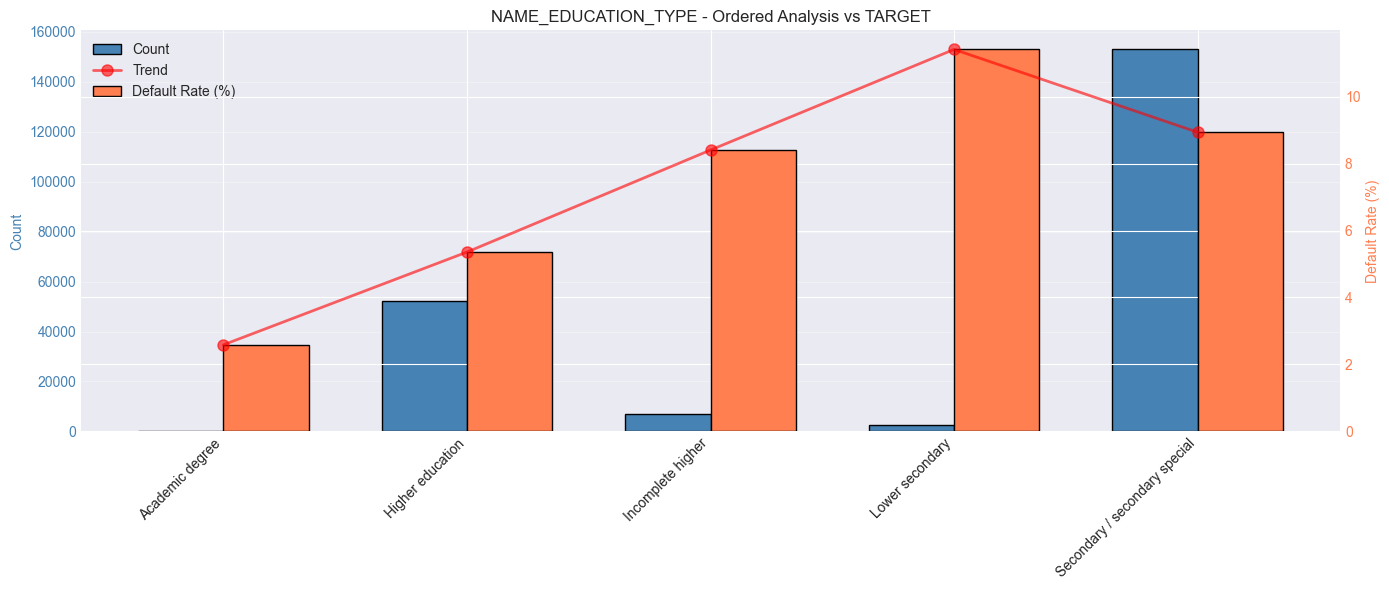

Feature  Spearman_Correlation  Spearman_P_Value  \
0  NAME_EDUCATION_TYPE              0.052732     2.272113e-132   

   Point_Biserial_Correlation  Point_Biserial_P_Value              feature  
0                    0.054625           6.555645e-142  NAME_EDUCATION_TYPE

In [73]:
# Bivariate Analysis: Ordinal Variables vs TARGET
from function import (
    plot_ordinal_ordered_bar_vs_target,
    calculate_target_relationship_ordinal
)
import pandas as pd

# Validate TARGET and ordinal variables
target_col = 'TARGET'
assert target_col in df.columns, "TARGET column not found in df"
assert 'ordinal_vars' in globals(), "ordinal_vars list not defined"

# Known category order for education
known_orders = {
    'NAME_EDUCATION_TYPE': [
        'Lower secondary',
        'Secondary / secondary special',
        'Incomplete higher',
        'Higher education',
        'Academic degree'
    ]
}

ordinal_results = []

for col in ordinal_vars:
    # Use known order when available
    order = known_orders.get(col)

    # Plot ordered default rate bar using function.py
    try:
        _ = plot_ordinal_ordered_bar_vs_target(df, col, target_col, order=order)
    except TypeError:
        # Fallback if function signature doesn't accept 'order'
        _ = plot_ordinal_ordered_bar_vs_target(df, col, target_col)

    # Calculate relationship metrics
    try:
        metrics = calculate_target_relationship_ordinal(df, col, target_col, order=order)
    except TypeError:
        metrics = calculate_target_relationship_ordinal(df, col, target_col)
        
    if isinstance(metrics, pd.DataFrame):
        metrics = metrics.to_dict(orient='records')[0]

    metrics['feature'] = col
    ordinal_results.append(metrics)

metrics_biv_ordinal = pd.DataFrame(ordinal_results)

# Add significance flags when available
if 'spearman_p' in metrics_biv_ordinal.columns:
    metrics_biv_ordinal['Spearman_Significant_0.05'] = metrics_biv_ordinal['spearman_p'] < 0.05
if 'point_biserial_p' in metrics_biv_ordinal.columns:
    metrics_biv_ordinal['PB_Significant_0.05'] = metrics_biv_ordinal['point_biserial_p'] < 0.05

# Sort by strongest monotonic signal (Spearman), fallback to point-biserial
if 'spearman_r' in metrics_biv_ordinal.columns:
    metrics_biv_ordinal['abs_spearman_r'] = metrics_biv_ordinal['spearman_r'].abs()
    metrics_biv_ordinal = metrics_biv_ordinal.sort_values('abs_spearman_r', ascending=False)
elif 'point_biserial' in metrics_biv_ordinal.columns:
    metrics_biv_ordinal['abs_point_biserial'] = metrics_biv_ordinal['point_biserial'].abs()
    metrics_biv_ordinal = metrics_biv_ordinal.sort_values('abs_point_biserial', ascending=False)

display(metrics_biv_ordinal)


## **Insights: ORDINAL VS TARGET**

There is a clear inverse correlation between education level and default risk. As an applicant's education level rises, their probability of default drops significantly.

- **Lowest Risk: "Academic degree"** holders have the lowest default rate (approx. 2-3%).
- Applicants **with only "Lower secondary"** education present the highest relative risk in the dataset.
- While "Lower secondary" is the riskiest percentage-wise, the **"Secondary / secondary special"** group is the biggest driver of total defaults due to sheer volume since the count bar for this group massive (over 150,000 applicants). Even though their default rate (approx. 9%) is slightly lower than the "Lower secondary" group, this group represents the bulk of the portfolio's exposure.

## **Validity & Inconsistencies check**

- From what we saw, there are some quality inconsistencies that needs double-checking. For instance, we'll check if if the temporal features (DAYS_*) as well as OWN_CAR_AGE to see if their values are larger than DAYS_BIRTH which is biologically and chronologically impossible, if yes, we'll need some additional insights.

##### **General Check:**

In [74]:
# Data Validity and Inconsistencies Check

print("DATA VALIDITY AND INCONSISTENCIES CHECK")

# Check for missing values in demographic columns
print("\n1. Missing Values in Demographic Columns:")
missing_values = df[client_demo_cols].isnull().sum()
if missing_values.sum() == 0:
    print("   ✓ No missing values found in demographic data")
else:
    print(missing_values[missing_values > 0])

# Check for negative values in age-related columns
print("\n2. Age-Related Inconsistencies:")
age_issues = {
    'DAYS_BIRTH': (df['DAYS_BIRTH'] > 0).sum(),
    'DAYS_EMPLOYED': (df['DAYS_EMPLOYED'] > 0).sum(),
    'DAYS_REGISTRATION': (df['DAYS_REGISTRATION'] > 0).sum(),
    'DAYS_ID_PUBLISH': (df['DAYS_ID_PUBLISH'] > 0).sum()
}
for col, positive_count in age_issues.items():
    if positive_count > 0:
        print(f"   {col}: {positive_count} positive values (should be negative)")

# Check for invalid numeric ranges
print("\n3. Numeric Range Validation:")
print(f"   Age range: {df['DAYS_BIRTH'].min():.1f} - {df['DAYS_BIRTH'].max():.1f} years")

# Check categorical variable consistency
print("\n4. Categorical Variables Consistency:")
categorical_issues = False
for col in categorical_demo:
    unique_count = df[col].nunique()
    print(f"   {col}: {unique_count} unique values")
    if df[col].dtype == 'object':
        if df[col].str.strip().str.len().min() == 0:
            print(f"      Contains empty or whitespace-only values")
            categorical_issues = True

# Summary
if missing_values.sum() == 0 and not categorical_issues:
    print("Data appears to be clean and consistent for analysis")
else:
    print(" Data quality issues detected - review above for details")

DATA VALIDITY AND INCONSISTENCIES CHECK

1. Missing Values in Demographic Columns:
OWN_CAR_AGE               142104
OCCUPATION_TYPE            67664
CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
dtype: int64

2. Age-Related Inconsistencies:
   DAYS_EMPLOYED: 38790 positive values (should be negative)

3. Numeric Range Validation:
   Age range: -25201.0 - -7673.0 years

4. Categorical Variables Consistency:
   CODE_GENDER: 3 unique values
   FLAG_OWN_CAR: 2 unique values
   FLAG_OWN_REALTY: 2 unique values
   NAME_INCOME_TYPE: 8 unique values
   NAME_EDUCATION_TYPE: 5 unique values
   NAME_FAMILY_STATUS: 6 unique values
   NAME_HOUSING_TYPE: 6 unique values
   OCCUPATION_TYPE: 18 unique values
   ORGANIZATION_TYPE: 58 unique values
 Data quality issues detected - review above for details


##### **More detailed insights inconsistencies:**

In [75]:
# Car is older than the client
age_years = abs(df['DAYS_BIRTH']) / 365
car_age = df['OWN_CAR_AGE']

invalid_car_age = df[car_age > age_years]
display(invalid_car_age)

ID  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
46      196499       0         Cash loans           F            Y   
228      39463       0         Cash loans           F            Y   
312     135677       0         Cash loans           M            Y   
634     197788       0         Cash loans           F            Y   
680     185350       0         Cash loans           F            Y   
...        ...     ...                ...         ...          ...   
215052  161152       0         Cash loans           F            Y   
215085  105878       0         Cash loans           F            Y   
215095   23419       1         Cash loans           M            Y   
215110  201664       0         Cash loans           M            Y   
215124   30535       0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
46                   Y             0          337500.0    953460.0   
228                  N             1          180000.0    790830.0   
312                  N             0          247500.0    946764.0   
634                  N             0          180000.0    284400.0   
680                  Y             0           76500.0    675000.0   
...                ...           ...               ...         ...   
215052               Y             0          180000.0    148500.0   
215085               Y             2          157500.0   1078200.0   
215095               Y             1          225000.0    182448.0   
215110               Y             0          202500.0    360000.0   
215124               Y             0          112500.0    117162.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
46          68922.0         900000.0    Unaccompanied               Working   
228         62613.0         675000.0    Unaccompanied  Commercial associate   
312         37678.5         765000.0    Unaccompanied             Pensioner   
634         13963.5         225000.0    Unaccompanied               Working   
680         19867.5         675000.0    Unaccompanied             Pensioner   
...             ...              ...              ...                   ...   
215052       8185.5         148500.0    Unaccompanied               Working   
215085      34911.0         900000.0    Unaccompanied               Working   
215095      19777.5         157500.0  Spouse, partner               Working   
215110      28440.0         360000.0    Unaccompanied               Working   
215124      11718.0         103500.0    Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
46      Secondary / secondary special               Married   
228     Secondary / secondary special               Married   
312                  Higher education               Married   
634                 Incomplete higher  Single / not married   
680                  Higher education               Married   
...                               ...                   ...   
215052  Secondary / secondary special               Married   
215085  Secondary / secondary special        Civil marriage   
215095               Higher education        Civil marriage   
215110              Incomplete higher               Married   
215124  Secondary / secondary special  Single / not married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
46        House / apartment                    0.008575      -12225   
228         Co-op apartment                    0.014464      -17552   
312       House / apartment                    0.035792      -21692   
634       House / apartment                    0.019101       -8543   
680       House / apartment                    0.008866      -20840   
...                     ...                         ...         ...   
215052    House / apartment                    0.008625      -19089   
215085      Co-op apartment                    0.025164 

- As we can see, there are 2667 cases where the client's car exceeds their age. Since OWN_CAR_AGE is the "actual age" of the car that the client owns. The car could technically be older than the person if the car was purchased before the person was born. This would happen in cases where the car is an heirloom, or if it's a vintage / collector car that got passed down to offsprings.

In [76]:
# Registered address longer than client's lifetime
reg_years = abs(df['DAYS_REGISTRATION']) / 365

invalid_registration = df[reg_years > age_years]
display(invalid_registration)

Empty DataFrame
Columns: [ID, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [77]:
# Registered ID published longer than client's lifetime
idpub_years = abs(df['DAYS_ID_PUBLISH']) / 365
invalid_idpub = df[idpub_years > age_years]
display(invalid_idpub)

Empty DataFrame
Columns: [ID, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [78]:
# Employment duration exceeds age
emp_years = abs(df['DAYS_EMPLOYED']) / 365

invalid_employment = df[emp_years > age_years]
display(invalid_employment)

ID  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
19       72661       0         Cash loans           F            N   
20       73755       0         Cash loans           F            N   
25       95154       0         Cash loans           F            Y   
30       28809       0         Cash loans           F            N   
31       84603       0         Cash loans           M            Y   
...        ...     ...                ...         ...          ...   
215233  199041       0         Cash loans           F            N   
215234   64925       0         Cash loans           F            N   
215242  191335       0         Cash loans           F            Y   
215247  168266       0         Cash loans           F            N   
215251  207892       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
19                   Y             0          119250.0    255429.0   
20                   N             0           67500.0    135000.0   
25                   Y             0          135000.0    253737.0   
30                   N             0          180000.0   1546020.0   
31                   Y             0          112500.0    134775.0   
...                ...           ...               ...         ...   
215233               Y             0          247500.0    252000.0   
215234               N             0          135000.0    630000.0   
215242               N             0          135000.0    545040.0   
215247               Y             0          112500.0    518562.0   
215251               Y             0          209250.0   1104997.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
19          26950.5         220500.0   Unaccompanied        Pensioner   
20          13149.0         135000.0   Unaccompanied        Pensioner   
25          24849.0         229500.0   Unaccompanied        Pensioner   
30          45202.5        1350000.0          Family        Pensioner   
31           6066.0         112500.0   Unaccompanied        Pensioner   
...             ...              ...             ...              ...   
215233      14593.5         252000.0          Family        Pensioner   
215234      24984.0         630000.0   Unaccompanied        Pensioner   
215242      34830.0         450000.0   Unaccompanied        Pensioner   
215247      22099.5         463500.0   Unaccompanied        Pensioner   
215251      39820.5         990000.0   Unaccompanied        Pensioner   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
19                   Higher education            Married  House / apartment   
20                   Higher education            Married  House / apartment   
25                   Higher education            Married  House / apartment   
30      Secondary / secondary special     Civil marriage  House / apartment   
31      Secondary / secondary special            Married  House / apartment   
...                               ...                ...                ...   
215233              Incomplete higher     Civil marriage  House / apartment   
215234  Secondary / secondary special            Married  House / apartment   
215242               Higher education            Married  House / apartment   
215247  Secondary / secondary special            Married  House / apartment   
215251  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
19                        0.002042      -20446         365243   
20                        0.018029      -19815         365243   
25                        0.018850      -21999         365243   
30                        0.019101      -20923         365243   
31                        0.022625      -19905         365243   
...                            ...         ...            ...   
215233                    0.026392      -21805   

In [79]:
df['DAYS_EMPLOYED'].value_counts()[365243]

38790

- For the DAYS_EMPLOYED, it has 38790 rows that employment duration exceeds age - the same amount of the "extreme outlier" (the placeholder value) "365243". So after cleaning, the values shall still be valid.

## **Multivariate Analysis**

Correlation with TARGET:


Variable  Correlation  Abs_Correlation Strength
2                   DAYS_BIRTH       0.0778           0.0778     Weak
14      DAYS_LAST_PHONE_CHANGE       0.0544           0.0544     Weak
5              DAYS_ID_PUBLISH       0.0526           0.0526     Weak
9               FLAG_EMP_PHONE       0.0452           0.0452     Weak
3                DAYS_EMPLOYED      -0.0442           0.0442     Weak
6                  OWN_CAR_AGE       0.0411           0.0411     Weak
4            DAYS_REGISTRATION       0.0408           0.0408     Weak
1   REGION_POPULATION_RELATIVE      -0.0377           0.0377     Weak
10             FLAG_WORK_PHONE       0.0275           0.0275     Weak
12                  FLAG_PHONE      -0.0253           0.0253     Weak
0                 CNT_CHILDREN       0.0200           0.0200     Weak
7              CNT_FAM_MEMBERS       0.0098           0.0098     Weak
13                  FLAG_EMAIL      -0.0016           0.0016     Weak
11            FLAG_CONT_MOBILE       0.0008           0.0008     Weak
8                   FLAG_MOBIL       0.0006           0.0006     Weak

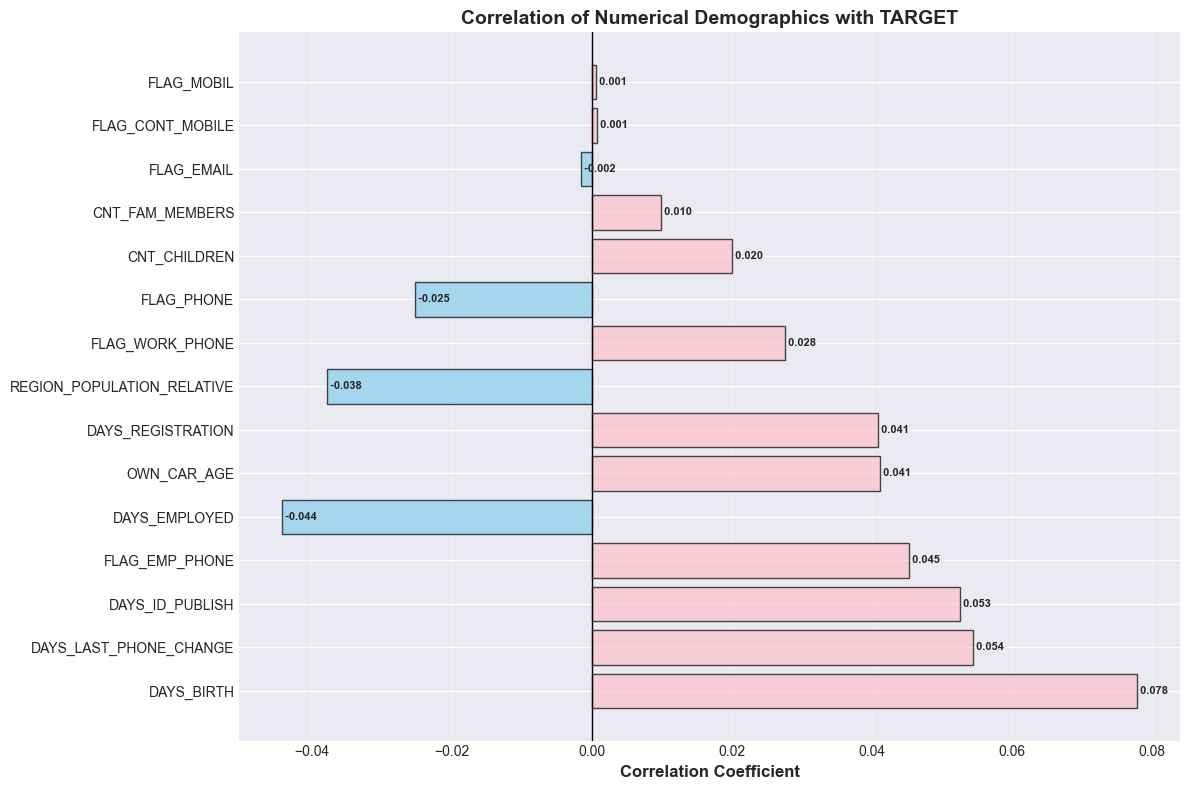

In [80]:
# Corr của biến TARGET vs các cột numerical
target_corr = []
for col in numerical_demo:
    if col in df.columns:
        corr = df[col].corr(df['TARGET'])
        target_corr.append({
            'Variable': col,
            'Correlation': corr,
            'Abs_Correlation': abs(corr)
        })

corr_df = pd.DataFrame(target_corr).sort_values('Abs_Correlation', ascending=False)
corr_df['Strength'] = corr_df['Abs_Correlation'].apply(
    lambda x: 'Strong' if x > 0.3 else ('Moderate' if x > 0.1 else 'Weak')
)

print("Correlation with TARGET:")
display(corr_df.round(4))

# Lại là vẽ bảng
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['pink' if x > 0 else 'skyblue' for x in corr_df['Correlation']]
bars = ax.barh(range(len(corr_df)), corr_df['Correlation'], color=colors, edgecolor='black', alpha=0.7)

ax.set_yticks(range(len(corr_df)))
ax.set_yticklabels(corr_df['Variable'], fontsize=10)
ax.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax.set_title('Correlation of Numerical Demographics with TARGET', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=1)
ax.grid(alpha=0.3, axis='x')

for i, (idx, row) in enumerate(corr_df.iterrows()):
    value = row['Correlation']
    ax.text(value, i, f' {value:.3f}', va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

## **Correlation Matrix - Heatmap**

CORRELATION MATRIX


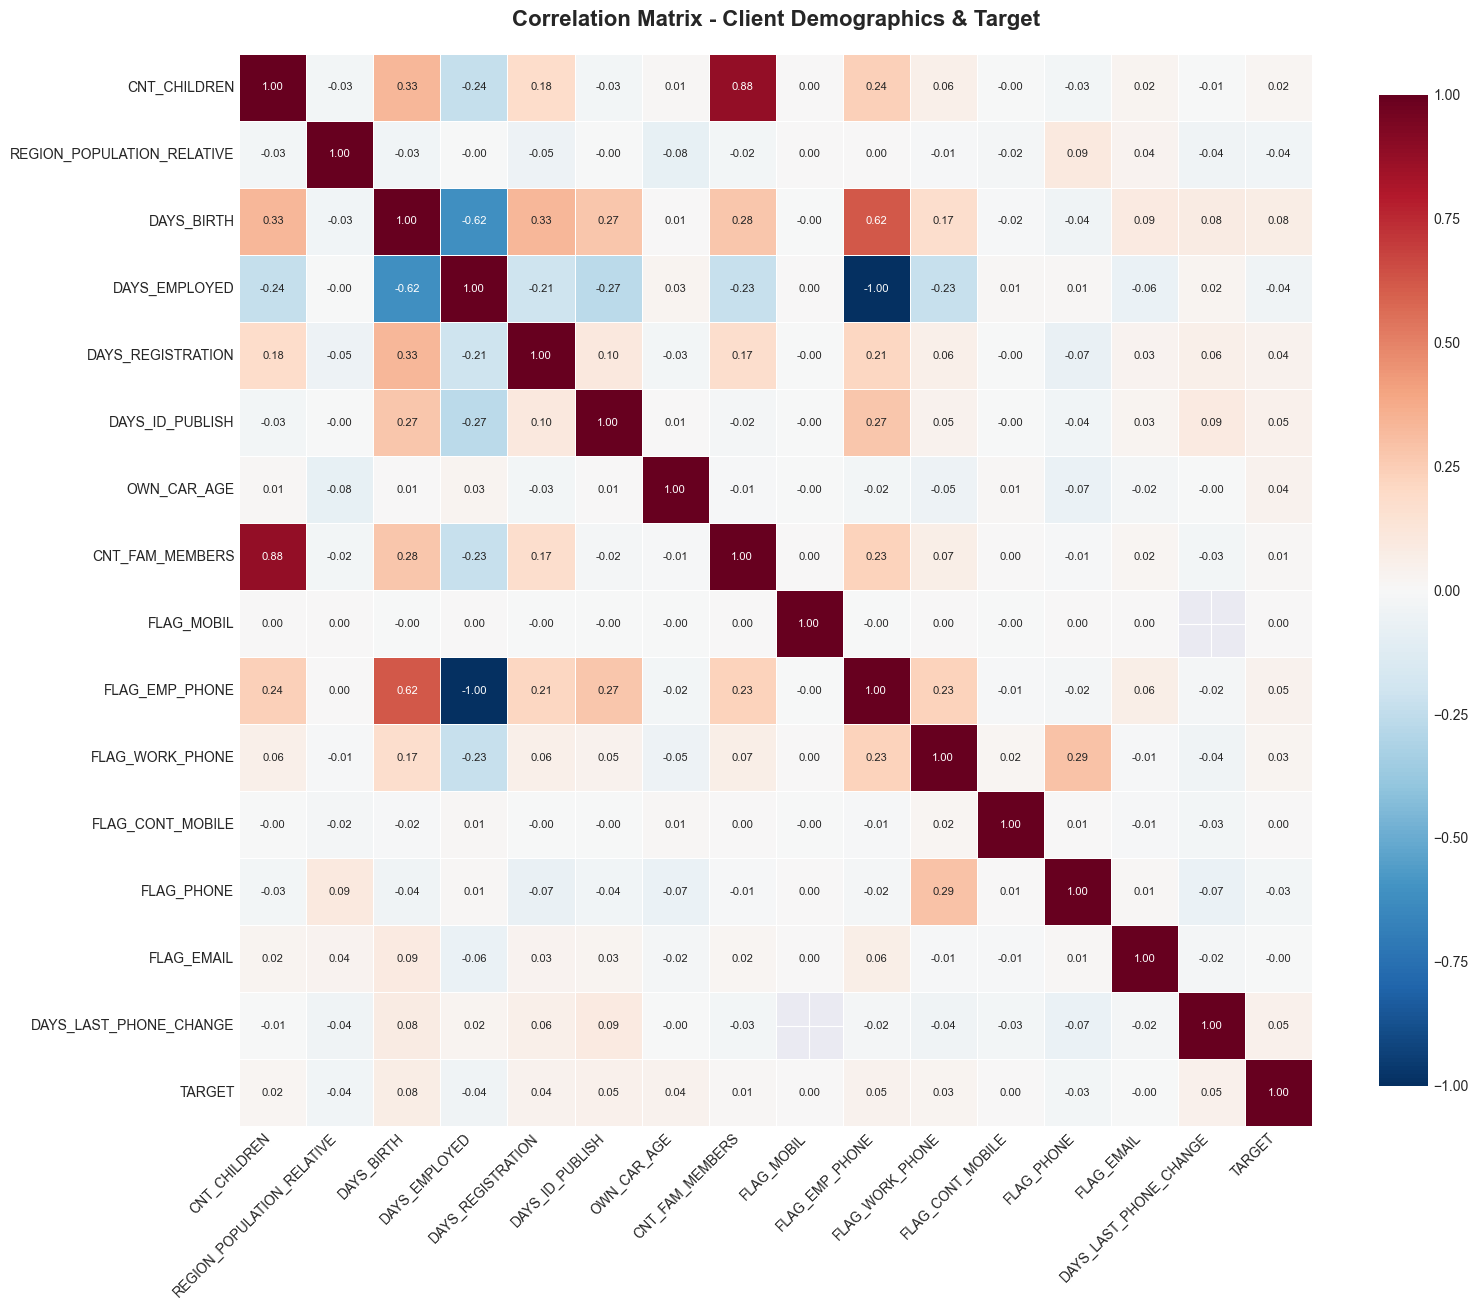

In [81]:
# Ma trận tương quan
print("CORRELATION MATRIX")

corr_cols = numerical_demo.copy()
if 'TARGET' not in corr_cols:
    corr_cols.append('TARGET')

corr_matrix = df[corr_cols].corr()

# Heatmap
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax, annot_kws={'fontsize': 8})

ax.set_title('Correlation Matrix - Client Demographics & Target', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

### **Chi-Square Test for correlation between categorical f. and TARGET**

**Interpretation:**
- **p-value < 0.05**: Reject null hypothesis &rarr; significant association exists
- **p-value ≥ 0.05**: Fail to reject null hypothesis &rarr; no significant association

In [82]:
from scipy.stats import chi2_contingency

chi_square_results = []

for col in categorical_demo:
    # Tạo bảng
    contingency_table = pd.crosstab(df[col], df['TARGET'])
    
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    
    chi_square_results.append({
        'Variable': col,
        'Chi2_Statistic': chi2_stat,
        'P_Value': p_value,
        'Degrees_of_Freedom': dof,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

chi_df = pd.DataFrame(chi_square_results).sort_values('Chi2_Statistic', ascending=False)

print("CHI-SQUARE TEST RESULTS (Categorical Variables vs TARGET)")
display(chi_df)

# Xem có significant ko, nếu significant = yes
sig_count = len(chi_df[chi_df['Significant'] == 'Yes'])
print(f"Variables with significant association (p < 0.05): {sig_count}/{len(categorical_demo)}")

CHI-SQUARE TEST RESULTS (Categorical Variables vs TARGET)


Variable  Chi2_Statistic        P_Value  Degrees_of_Freedom  \
8    ORGANIZATION_TYPE     1111.735014  2.187203e-195                  57   
7      OCCUPATION_TYPE      938.903520  1.038505e-188                  17   
3     NAME_INCOME_TYPE      834.390935  7.017579e-176                   7   
4  NAME_EDUCATION_TYPE      719.640249  1.947136e-154                   4   
0          CODE_GENDER      632.144443  5.389872e-138                   2   
5   NAME_FAMILY_STATUS      364.165605   1.558776e-76                   5   
6    NAME_HOUSING_TYPE      268.958005   4.684809e-56                   5   
1         FLAG_OWN_CAR      103.637125   2.429812e-24                   1   
2      FLAG_OWN_REALTY        7.941364   4.831741e-03                   1   

  Significant  
8         Yes  
7         Yes  
3         Yes  
4         Yes  
0         Yes  
5         Yes  
6         Yes  
1         Yes  
2         Yes

Variables with significant association (p < 0.05): 9/9


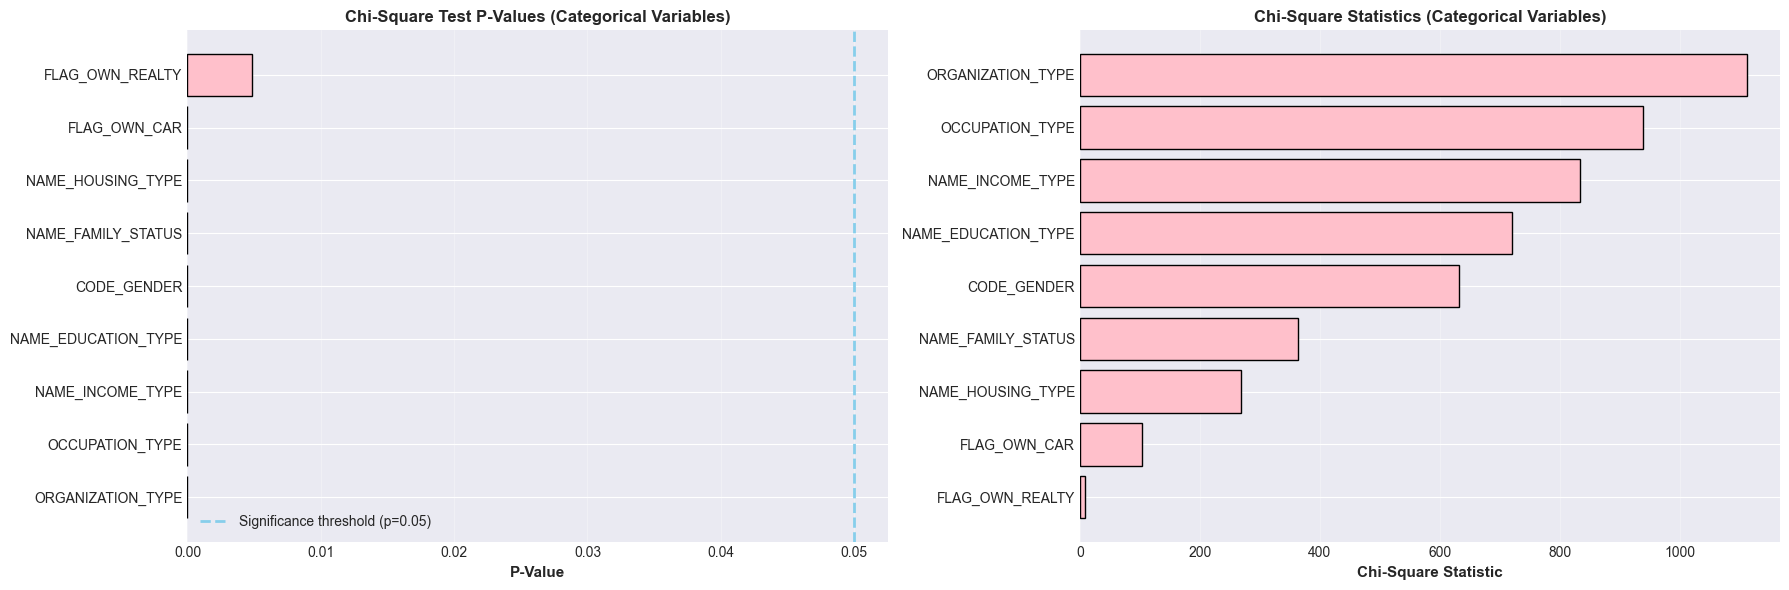

In [83]:
# Vẽ bảng P value + Chi2 stat
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Chi-square p-values
chi_df_sorted = chi_df.sort_values('P_Value')
colors_chi = ['pink' if p < 0.05 else 'skyblue' for p in chi_df_sorted['P_Value']]

axes[0].barh(range(len(chi_df_sorted)), chi_df_sorted['P_Value'], color=colors_chi, edgecolor='black')
axes[0].set_yticks(range(len(chi_df_sorted)))
axes[0].set_yticklabels(chi_df_sorted['Variable'], fontsize=10)
axes[0].axvline(0.05, color='skyblue', linestyle='--', linewidth=2, label='Significance threshold (p=0.05)')
axes[0].set_xlabel('P-Value', fontsize=11, fontweight='bold')
axes[0].set_title('Chi-Square Test P-Values (Categorical Variables)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='x')

# 2. Chi-square statistics
chi_df_sorted_stat = chi_df.sort_values('Chi2_Statistic', ascending=True)
colors_chi_stat = ['pink' if p < 0.05 else 'skyblue' for p in chi_df_sorted_stat['P_Value']]

axes[1].barh(range(len(chi_df_sorted_stat)), chi_df_sorted_stat['Chi2_Statistic'], color=colors_chi_stat, edgecolor='black')
axes[1].set_yticks(range(len(chi_df_sorted_stat)))
axes[1].set_yticklabels(chi_df_sorted_stat['Variable'], fontsize=10)
axes[1].set_xlabel('Chi-Square Statistic', fontsize=11, fontweight='bold')
axes[1].set_title('Chi-Square Statistics (Categorical Variables)', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# **2.DATA CLEANING**

## **Missing Data Handling**

### **Missing Data Types:**
- **MCAR (Missing Completely At Random)**: Missing values are randomly distributed, unrelated to any variable
- **MAR (Missing At Random)**: Missing values depend on observed data but not on the missing values themselves
- **MNAR (Missing Not At Random)**: Missing values depend on unobserved data or the missing value itself

In [84]:
missing_stats = []
for col in client_demo_cols:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    
    if missing_count > 0:
        missing_stats.append({
            'Variable': col,
            'Missing_Count': missing_count,
            'Missing_Percentage': missing_pct,
            'Present_Count': len(df) - missing_count,
            'Data_Type': df[col].dtype
        })

missing_df = pd.DataFrame(missing_stats).sort_values('Missing_Percentage', ascending=False)
display(missing_df.head(10)) #top 10 missing

Variable  Missing_Count  Missing_Percentage  Present_Count  \
0             OWN_CAR_AGE         142104           66.015665          73154   
1         OCCUPATION_TYPE          67664           31.433907         147594   
2         CNT_FAM_MEMBERS              2            0.000929         215256   
3  DAYS_LAST_PHONE_CHANGE              1            0.000465         215257   

  Data_Type  
0   float64  
1    object  
2   float64  
3   float64

### **Handling Missing Data:**

In [85]:
# 0. CODE_GENDER == 'XNA' thay bằng mode
print(f"Original dataset size: {len(df):,} rows")

# Count XNA values
xna_gender_count = (df['CODE_GENDER'] == 'XNA').sum()
print(f"Rows with CODE_GENDER == 'XNA': {xna_gender_count:,} (will be filled with mode)")

# Compute mode (most frequent value)
gender_mode = df['CODE_GENDER'].mode()[0]

# Fill XNA with mode
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA', gender_mode)

print(f"After replacing invalid placeholders with mode: {len(df):,} rows\n")

# 1. OWN_CAR_AGE imputation:
#   - If FLAG_OWN_CAR == 'N' and OWN_CAR_AGE is NaN -> fill with 0 
#   - If FLAG_OWN_CAR == 'Y' and OWN_CAR_AGE is NaN -> DROP the row 

non_owners_missing = ((df['FLAG_OWN_CAR'] == 'N') & df['OWN_CAR_AGE'].isna()).sum()
owners_missing = ((df['FLAG_OWN_CAR'] == 'Y') & df['OWN_CAR_AGE'].isna()).sum()

print(f"Non-owners with missing OWN_CAR_AGE: {non_owners_missing:,} (will fill with 0)")
print(f"Owners with missing OWN_CAR_AGE: {owners_missing:,} (will be dropped)")

# Fill 0 cho bọn không có xe với độ tuổi xe bị thiếu
df.loc[(df['FLAG_OWN_CAR'] == 'N') & df['OWN_CAR_AGE'].isna(), 'OWN_CAR_AGE'] = 0
print(f"After filling non-owners' missing OWN_CAR_AGE with 0: {len(df):,} rows")
median_car_age = df.loc[df['FLAG_OWN_CAR'] == 'Y', 'OWN_CAR_AGE'].median()

df.loc[
    (df['FLAG_OWN_CAR'] == 'Y') & (df['OWN_CAR_AGE'].isna()),
    'OWN_CAR_AGE'
] = median_car_age
print(f"After filling owners' missing OWN_CAR_AGE with median ({median_car_age}): {len(df):,} rows\n")

# Clean DAYS_EMPLOYED placeholder for occupation logic
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(0)

# 2. OCCUPATION_TYPE imputation 
#   - Use NAME_INCOME_TYPE and employment info to infer 'Unemployed'
#   - Remaining missing -> 'Laborers' (general workforce category)

def impute_occupation(df):
    occ = df['OCCUPATION_TYPE'].copy()
    missing_mask = occ.isna() | (occ == '')
    # Conditions indicating likely unemployment / no defined occupation
    income_unemp = df['NAME_INCOME_TYPE'].str.contains('Pensioner|Unemployed', case=False, regex=True, na=False)
    no_employment_duration = df['DAYS_EMPLOYED'].isna() | (df['DAYS_EMPLOYED'] == 0)  # người missing employment duration hoặc không có ngày làm việc hợp lệ
    # Cho thành 'Unemployed' nơi cả days_employed missing  và đang trong độ tuổi không có nghề nghiệp
    occ.loc[missing_mask & (income_unemp | no_employment_duration)] = 'Unemployed'
    # Những cái còn lại gán thành 'Laborers'
    occ.loc[missing_mask & ~(income_unemp | no_employment_duration)] = 'Laborers'
    return occ

# Apply occupation imputation
df['OCCUPATION_TYPE'] = impute_occupation(df)

# 3. CNT_FAM_MEMBERS median imputation (low missing, numeric distribution skew neutral)
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].median())

# 4. DAYS_LAST_PHONE_CHANGE median imputation (MCAR, very low impact)
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].median())
# 5. ORGANIZATION_TYPE imputation (conditional XNA handling)
if 'ORGANIZATION_TYPE' in df.columns:
    initial_xna = int((df['ORGANIZATION_TYPE'] == 'XNA').sum())
    replaced_cleaning = 0

    if 'OCCUPATION_TYPE' in df.columns and initial_xna > 0:
        mask_cleaning = (
            (df['ORGANIZATION_TYPE'] == 'XNA') &
            (df['OCCUPATION_TYPE'] == 'Cleaning staff')
        )
        replaced_cleaning = int(mask_cleaning.sum())
        if replaced_cleaning:
            df.loc[mask_cleaning, 'ORGANIZATION_TYPE'] = 'Cleaning'

    # Replace remaining XNA with 'No Organization'
    mask_remaining = (df['ORGANIZATION_TYPE'] == 'XNA')
    replaced_no_org = int(mask_remaining.sum())
    if replaced_no_org:
        df.loc[mask_remaining, 'ORGANIZATION_TYPE'] = 'No Organization'
else:
    print("Column 'ORGANIZATION_TYPE' not found; skipping imputation.")
# Verification summary
print("Remaining missing values (selected columns):")
for col in ['OWN_CAR_AGE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']:
    miss = df[col].isna().sum()
    print(f"  {col}: {miss} missing")
print(f"\nFinal cleaned dataset size: {len(df):,} rows")

Original dataset size: 215,258 rows
Rows with CODE_GENDER == 'XNA': 4 (will be filled with mode)
After replacing invalid placeholders with mode: 215,258 rows

Non-owners with missing OWN_CAR_AGE: 142,102 (will fill with 0)
Owners with missing OWN_CAR_AGE: 2 (will be dropped)
After filling non-owners' missing OWN_CAR_AGE with 0: 215,258 rows
After filling owners' missing OWN_CAR_AGE with median (9.0): 215,258 rows

Remaining missing values (selected columns):
  OWN_CAR_AGE: 0 missing
  OCCUPATION_TYPE: 0 missing
  CNT_FAM_MEMBERS: 0 missing
  DAYS_LAST_PHONE_CHANGE: 0 missing

Final cleaned dataset size: 215,258 rows


## **Outlier Detection & Analysis**

In [86]:
# IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, IQR

# Z-Score
def detect_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = np.abs((df[column] - mean) / std)
    outliers = df[z_scores > threshold]
    return outliers

# Phân tích outlier của numerical
outlier_summary = []

for col in numerical_demo:
    data_clean = df[df[col].notna()]
    
    if len(data_clean) > 0:
        # IQR method
        outliers_iqr, lower, upper, iqr = detect_outliers_iqr(data_clean, col)
        
        # Z-score method
        outliers_z = detect_outliers_zscore(data_clean, col, threshold=3)
        
        outlier_summary.append({
            'Variable': col,
            'Total_Records': len(data_clean),
            'IQR_Outliers': len(outliers_iqr),
            'IQR_Outlier_Pct': (len(outliers_iqr) / len(data_clean)) * 100,
            'Z_Score_Outliers': len(outliers_z),
            'Z_Score_Outlier_Pct': (len(outliers_z) / len(data_clean)) * 100,
            'Lower_Bound': lower,
            'Upper_Bound': upper,
            'IQR': iqr
        })

outlier_df = pd.DataFrame(outlier_summary).sort_values('IQR_Outlier_Pct', ascending=False)

print("OUTLIER DETECTION SUMMARY (sorted by IQR outlier percentage)")
display(outlier_df.round(2))

# Biến có outlier cao
high_outlier_vars = outlier_df[outlier_df['IQR_Outlier_Pct'] > 5]['Variable'].tolist()

print(f"Variables with >5% outliers (IQR method): {(high_outlier_vars)}")

OUTLIER DETECTION SUMMARY (sorted by IQR outlier percentage)


Variable  Total_Records  IQR_Outliers  IQR_Outlier_Pct  \
10             FLAG_WORK_PHONE         215258         42862            19.91   
9               FLAG_EMP_PHONE         215258         38800            18.02   
6                  OWN_CAR_AGE         215258         26483            12.30   
13                  FLAG_EMAIL         215258         12241             5.69   
3                DAYS_EMPLOYED         215258         11807             5.49   
1   REGION_POPULATION_RELATIVE         215258          5899             2.74   
0                 CNT_CHILDREN         215258          3043             1.41   
7              CNT_FAM_MEMBERS         215258          2855             1.33   
4            DAYS_REGISTRATION         215258           449             0.21   
11            FLAG_CONT_MOBILE         215258           421             0.20   
14      DAYS_LAST_PHONE_CHANGE         215258           307             0.14   
8                   FLAG_MOBIL         215258             1             0.00   
2                   DAYS_BIRTH         215258             0             0.00   
5              DAYS_ID_PUBLISH         215258             0             0.00   
12                  FLAG_PHONE         215258             0             0.00   

    Z_Score_Outliers  Z_Score_Outlier_Pct  Lower_Bound  Upper_Bound      IQR  
10                 0                 0.00         0.00         0.00     0.00  
9                  0                 0.00         1.00         1.00     0.00  
6               3287                 1.53        -7.50        12.50     5.00  
13             12241                 5.69         0.00         0.00     0.00  
3               4830                 2.24     -6462.00      3418.00  2470.00  
1               5899                 2.74        -0.02         0.06     0.02  
0               3043                 1.41        -1.50         2.50     1.00  
7               2855                 1.33         0.50         4.50     1.00  
4                515                 0.24    -15687.00      6201.00  5472.00  
11               421                 0.20         1.00         1.00     0.00  
14               449                 0.21     -3513.00      1671.00  1296.00  
8                  1                 0.00         1.00         1.00     0.00  
2                  0                 0.00    -30612.12     -1481.12  7282.75  
5                  0                 0.00     -8177.12      2161.88  2584.75  
12                 0                 0.00        -1.50         2.50     1.00

Variables with >5% outliers (IQR method): ['FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'OWN_CAR_AGE', 'FLAG_EMAIL', 'DAYS_EMPLOYED']


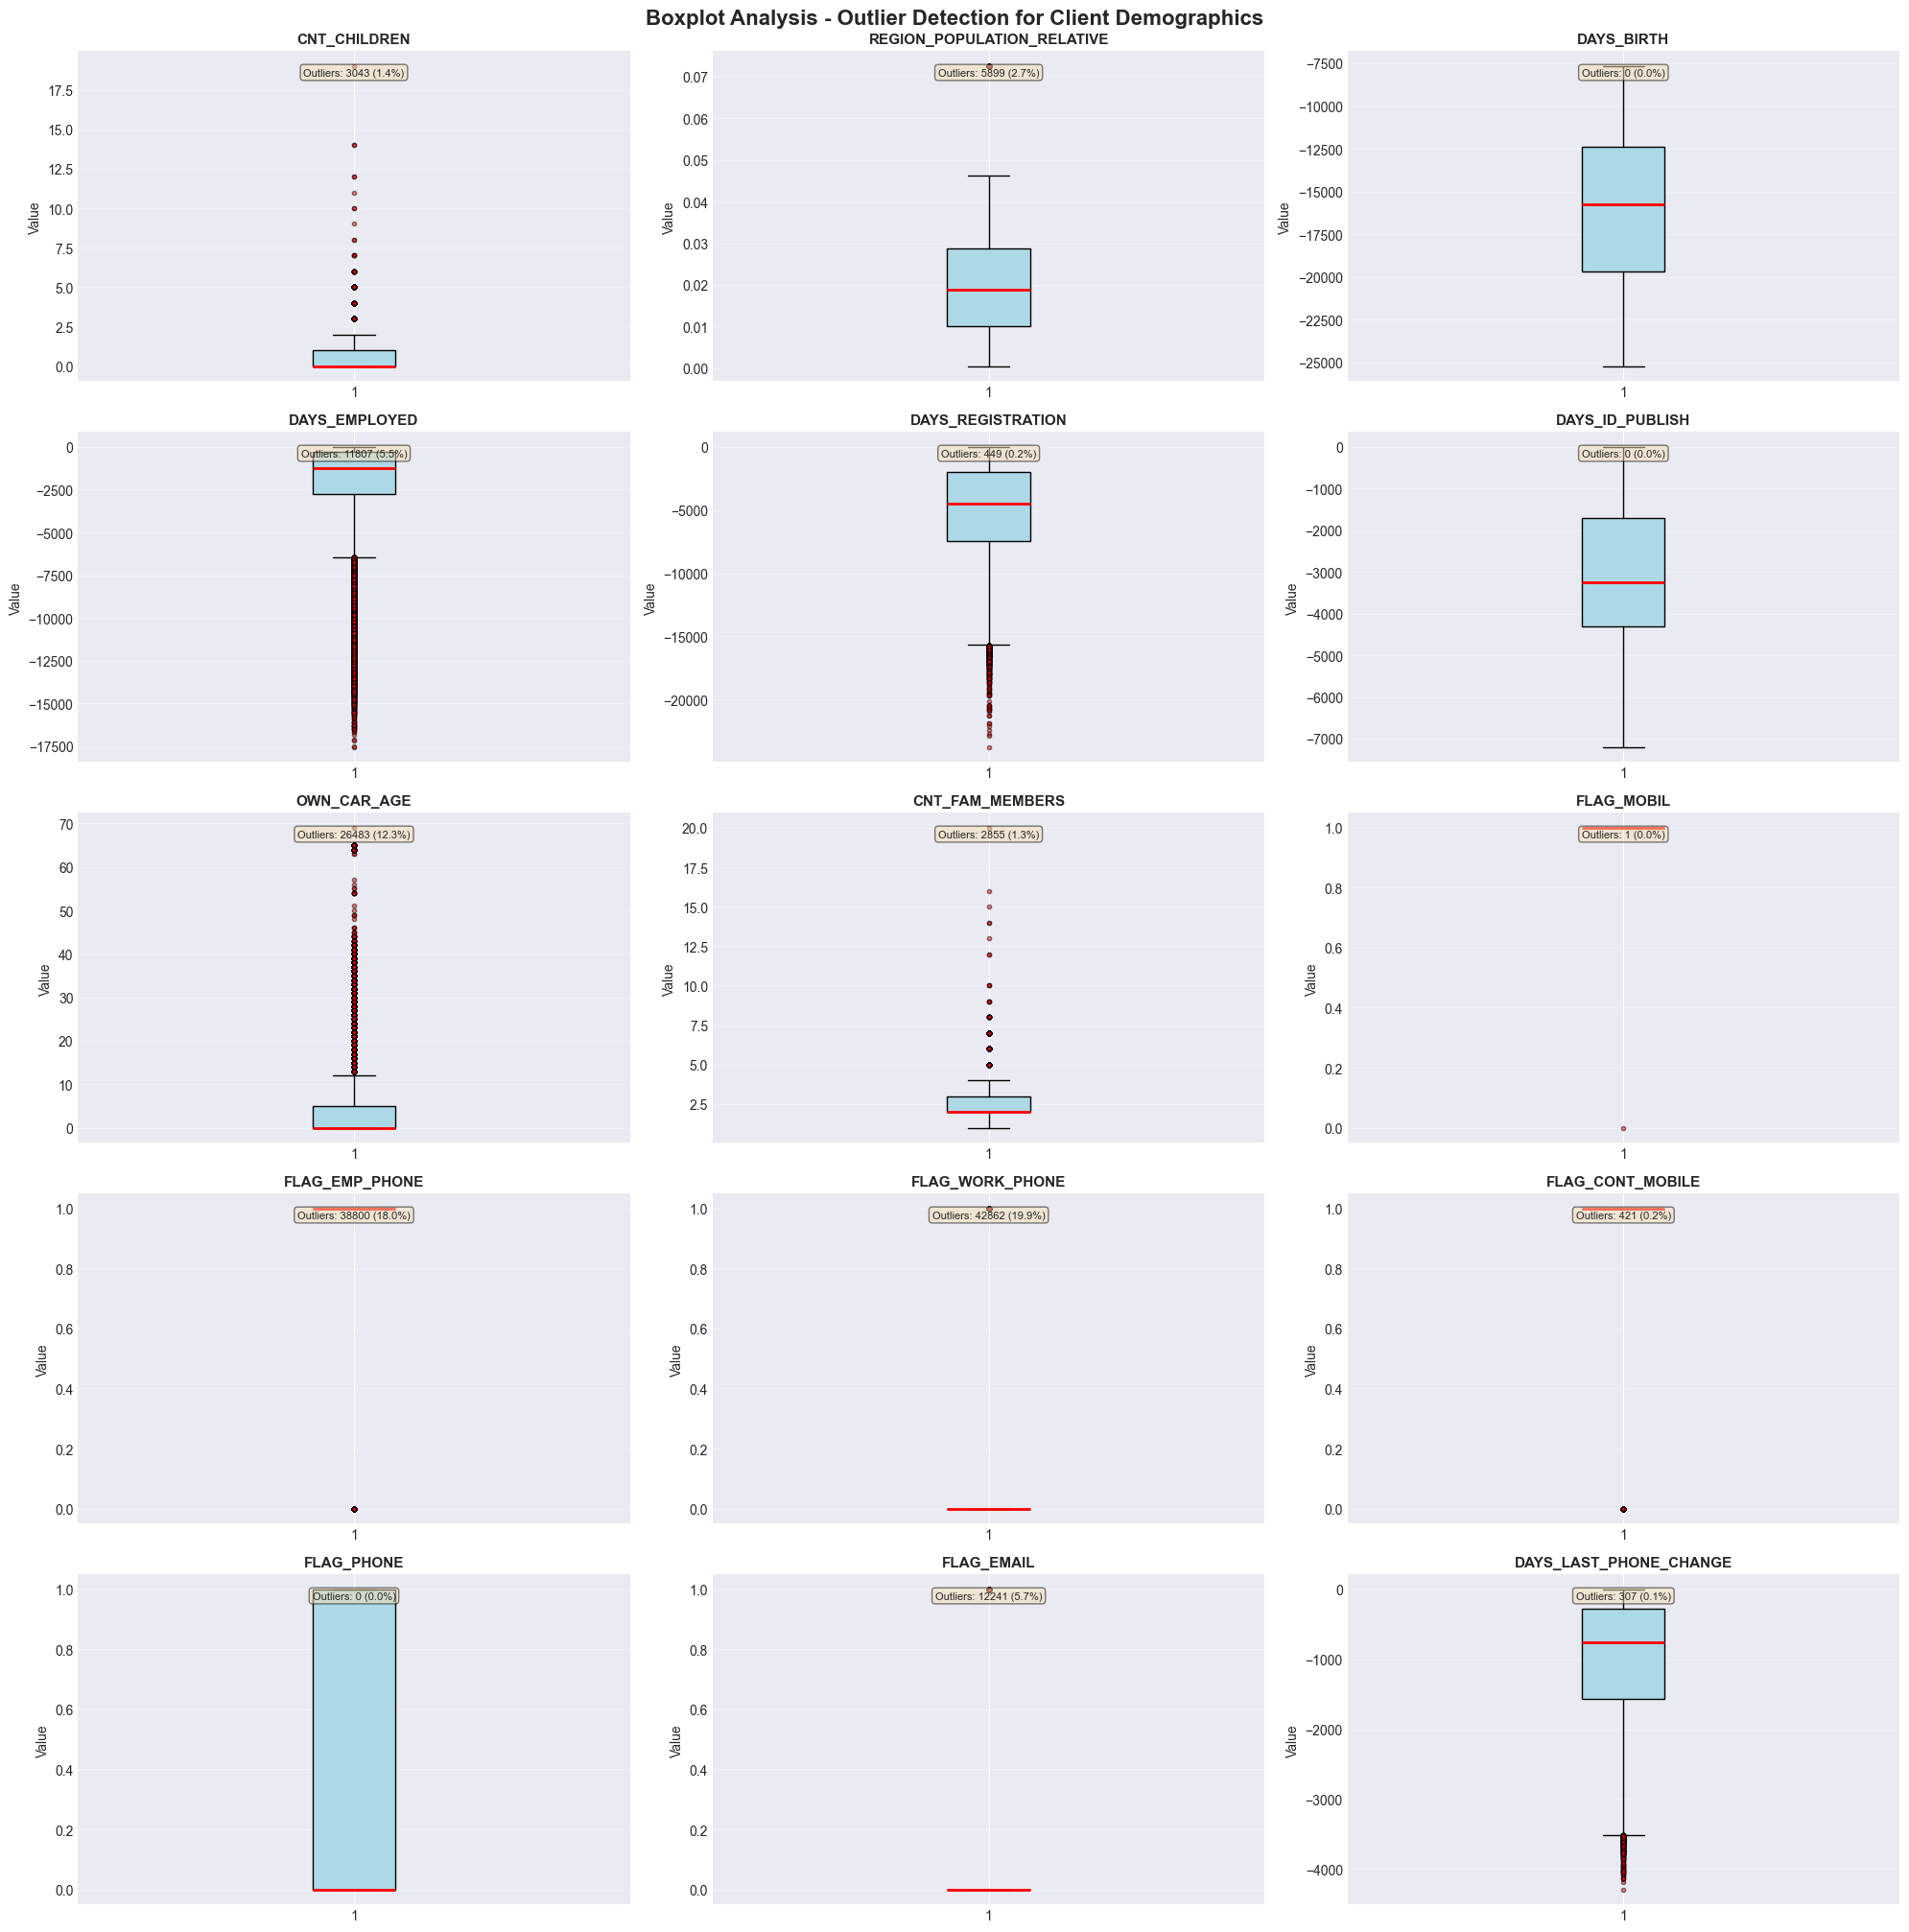

In [87]:
# Boxplot phân tích outlier
n_cols = 3
n_rows = int(np.ceil(len(numerical_demo) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(numerical_demo):
    data_clean = df[col].dropna()
    
    if len(data_clean) > 0:
        bp = axes[idx].boxplot(data_clean, vert=True, patch_artist=True,
                               boxprops=dict(facecolor='lightblue', color='black'),
                               whiskerprops=dict(color='black'),
                               capprops=dict(color='black'),
                               medianprops=dict(color='red', linewidth=2),
                               flierprops=dict(marker='o', markerfacecolor='red', markersize=3, alpha=0.5))
        
        axes[idx].set_ylabel('Value', fontsize=10)
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].grid(alpha=0.3, axis='y')
        
        # Statistics
        Q1 = data_clean.quantile(0.25)
        Q3 = data_clean.quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = len(data_clean[(data_clean < Q1 - 1.5*IQR) | (data_clean > Q3 + 1.5*IQR)])
        outlier_pct = (outlier_count / len(data_clean)) * 100
        
        axes[idx].text(0.5, 0.95, f'Outliers: {outlier_count} ({outlier_pct:.1f}%)',
                      transform=axes[idx].transAxes, ha='center', va='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                      fontsize=8)

for idx in range(len(numerical_demo), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Boxplot Analysis - Outlier Detection for Client Demographics', y=1.005, fontsize=16, fontweight='bold')
plt.show()

### **OWN_CAR_AGE: Outliers Represent Valid Extreme Cases**

**The Outlier Context:**
- Range: 0–69 years (with cars older than the client in ~2,667 cases)
Although OWN_CAR_AGE contains values that appear statistically extreme, these high ages should not be considered true outliers in this context.
- **Legitimate Cases**: Very old cars (50–69 years) exist and represent vintage/collector vehicles or family heirlooms. These are likely **valid real-world scenarios**, not errors
 - The portfolio includes clients who own classic/collector cars—a real demographic segment
 - In addition, OWN_CAR_AGE is tightly linked to FLAG_OWN_CAR, and missing ages for non-car owners are structurally correct rather than anomalous. Treating high car ages as outliers would remove valid observations, distort the true asset-distribution of clients, and eliminate important signals related to clients’ financial stability and credit risk

- **Economic Signal**: Newer car ownership indicates:
  - Recent income and financial capacity
  - Lower financial stress
  - Better credit stability
  - Newer vehicles are correlated with better-quality borrowers

- **Portfolio Composition**: The extremes represent real business value:
  - Newer vehicle owners = lower-risk segment (potential for pricing optimization)
  - Older vehicle owners = higher-risk segment (warrant stricter underwriting)



# **3. DATA TRANSFORMATION**

### **FEATURE ENGINEERING**

In [88]:
days_cols = [col for col in df.columns if col.startswith('DAYS_')]

# Convert negative values to positive
df[days_cols] = df[days_cols].abs()

In [89]:
df["AGE_YEARS"] = (df["DAYS_BIRTH"].abs() / 365).round(1)

# Drop DAYS_BIRTH
df = df.drop(columns=["DAYS_BIRTH"])

# **Insight Domain**

Variable: DAYS_EMPLOYED
Variable: DAYS_REGISTRATION
Variable: DAYS_ID_PUBLISH
Variable: DAYS_LAST_PHONE_CHANGE
SUMMARY TABLE: Continuous Variables


Feature   Count  Missing         Mean  Median          Std  \
0           DAYS_EMPLOYED  215258        0  1952.577056  1213.0  2303.141072   
1       DAYS_REGISTRATION  215258        0  4985.649732  4498.0  3524.730871   
2         DAYS_ID_PUBLISH  215258        0  2994.077725  3256.0  1510.878164   
3  DAYS_LAST_PHONE_CHANGE  215258        0   961.967722   755.0   826.694284   

   Min      Max  Skewness  Kurtosis  
0  0.0  17546.0  2.039383  5.168280  
1  0.0  23738.0  0.592418 -0.323483  
2  0.0   7197.0 -0.349111 -1.109131  
3  0.0   4292.0  0.714272 -0.309306

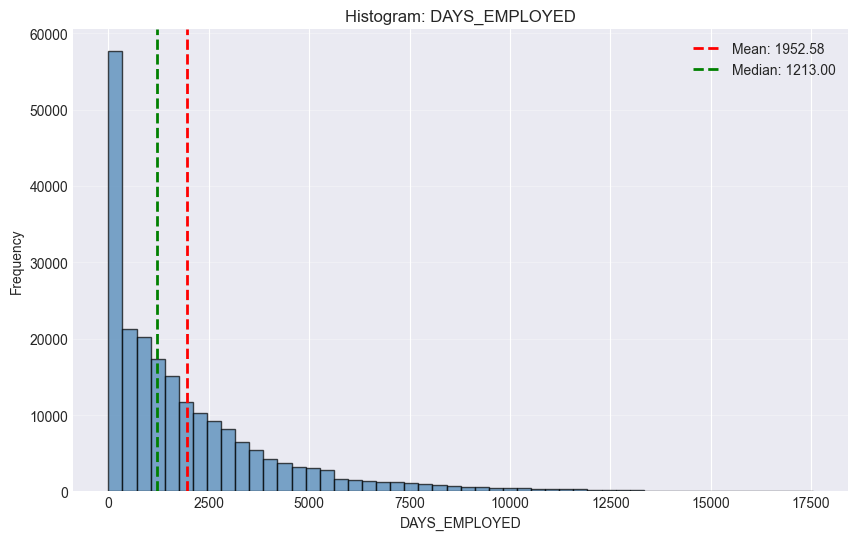

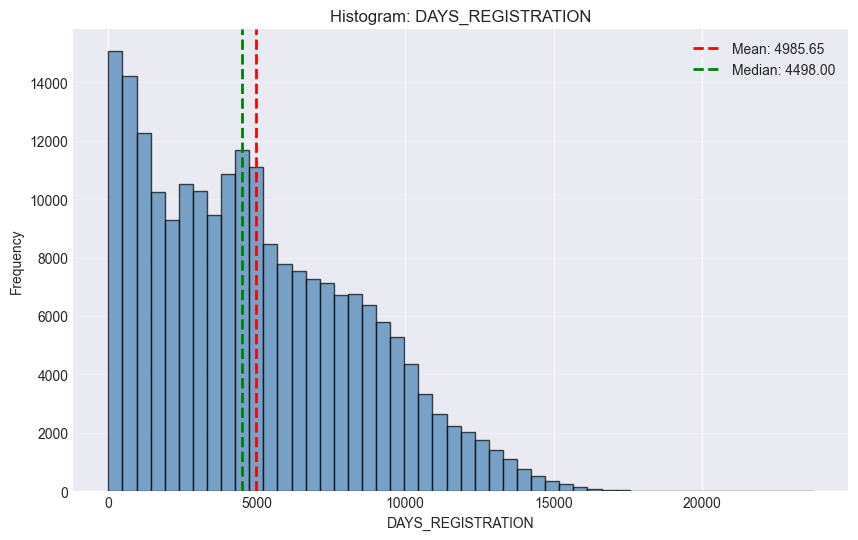

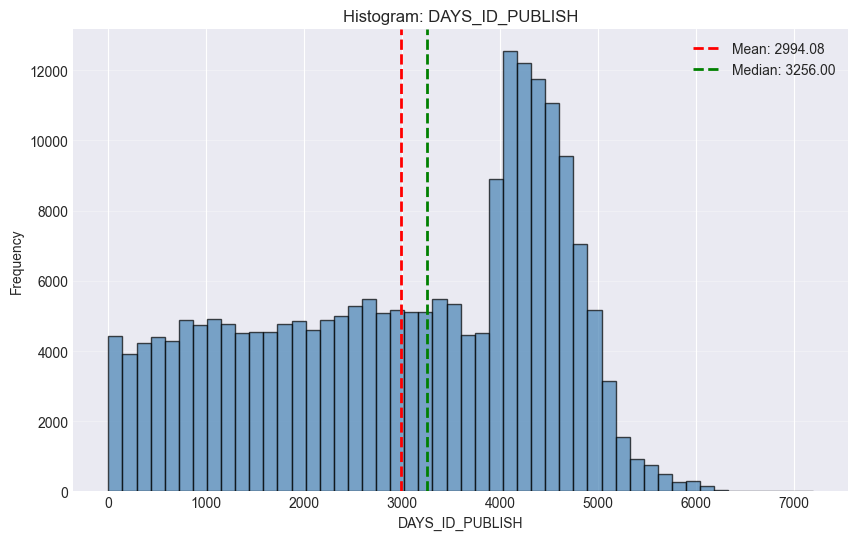

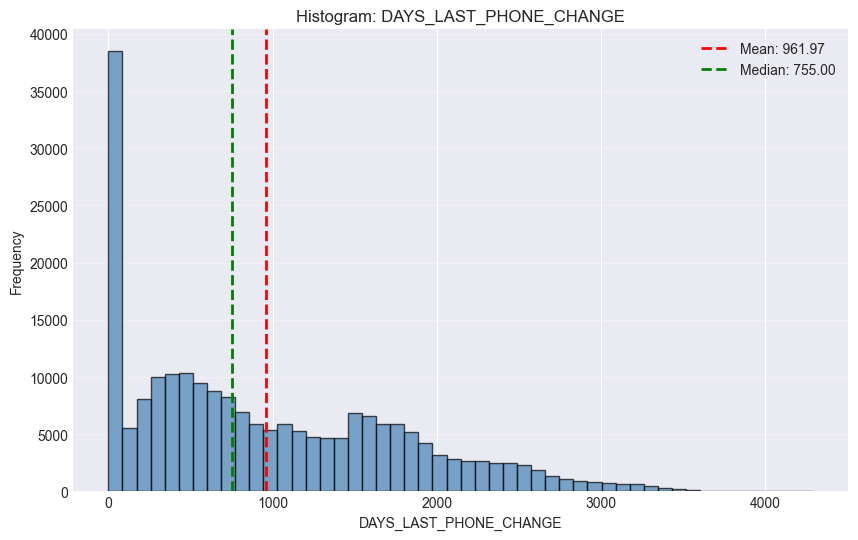

In [103]:
# Univariate Analysis for Continuous Variables
from scipy import stats

continuous_vars_2 = [
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'
]

# Store all metrics
all_metrics = []

for col in continuous_vars_2:
    if col not in df.columns:
        print(f"Warning: {col} not found in dataframe")
        continue
    print(f"Variable: {col}")
    # Calculate metrics using function from function.py
    metrics_df = calculate_continuous_metrics(data=df[col], target=None)
    
    # Store for summary table
    all_metrics.append(metrics_df)
    
    # Plot using function 
    plot_continuous_histogram(
        data=df[col],
        bins=50,
        title=f'Histogram: {col}',
        figsize=(10, 6)
    )

# Display summary table
print("SUMMARY TABLE: Continuous Variables")
metrics_summary = pd.concat(all_metrics, ignore_index=True)
display(metrics_summary)

## **DAYS_ Variables After Processing**

### **Overview of DAYS_ Variables (Post-Processing)**
All DAYS_ fields originally represent the number of days **before the loan application date** (negative values). After conversion to absolute values using `df[days_cols] = df[days_cols].abs()`, these now represent **positive time intervals** measuring how long ago each event occurred relative to the application date. This transformation enables intuitive interpretation: higher values = earlier events (longer ago), lower values = recent events. We can improve interpretability, build models that expect non-negative numbers and create features in years more easily


After all transformations, DAYS_EMPLOYED exhibits:

- **Distribution Pattern:** Right-skewed with a pronounced spike at 0
- **Central Tendency:** Mean employment duration ~1,213 days (~3.3 years), indicating a relatively young workforce
- **Range:** 0 to ~69 years maximum after removing outliers
- **Notable Feature:** The spike at 0 (unemployed/missing) represents a distinct and valuable segment for credit risk modeling
- **Interpretation:** Most employed clients have tenure between 0-5,000 days (0-14 years), consistent with typical career patterns in developing markets

**Statistical Impact of Cleaning:**

Before processing:
- Mean heavily inflated by 365243 anomaly
- Standard deviation artificially expanded
- Visualizations compressed and difficult to interpret
- Outlier dominated analysis

After processing:
- Mean and median now represent true central tendency
- Realistic variance estimates enable proper statistical testing
- Distributions clearer and more actionable for segmentation
- Aligned with employment domain knowledge

**Data Quality Summary:**

- No remaining anomalies after processing
- All values valid for modeling
- Consistent with occupational and income type variables
- Ready for standardization, scaling, and feature engineering pipelines

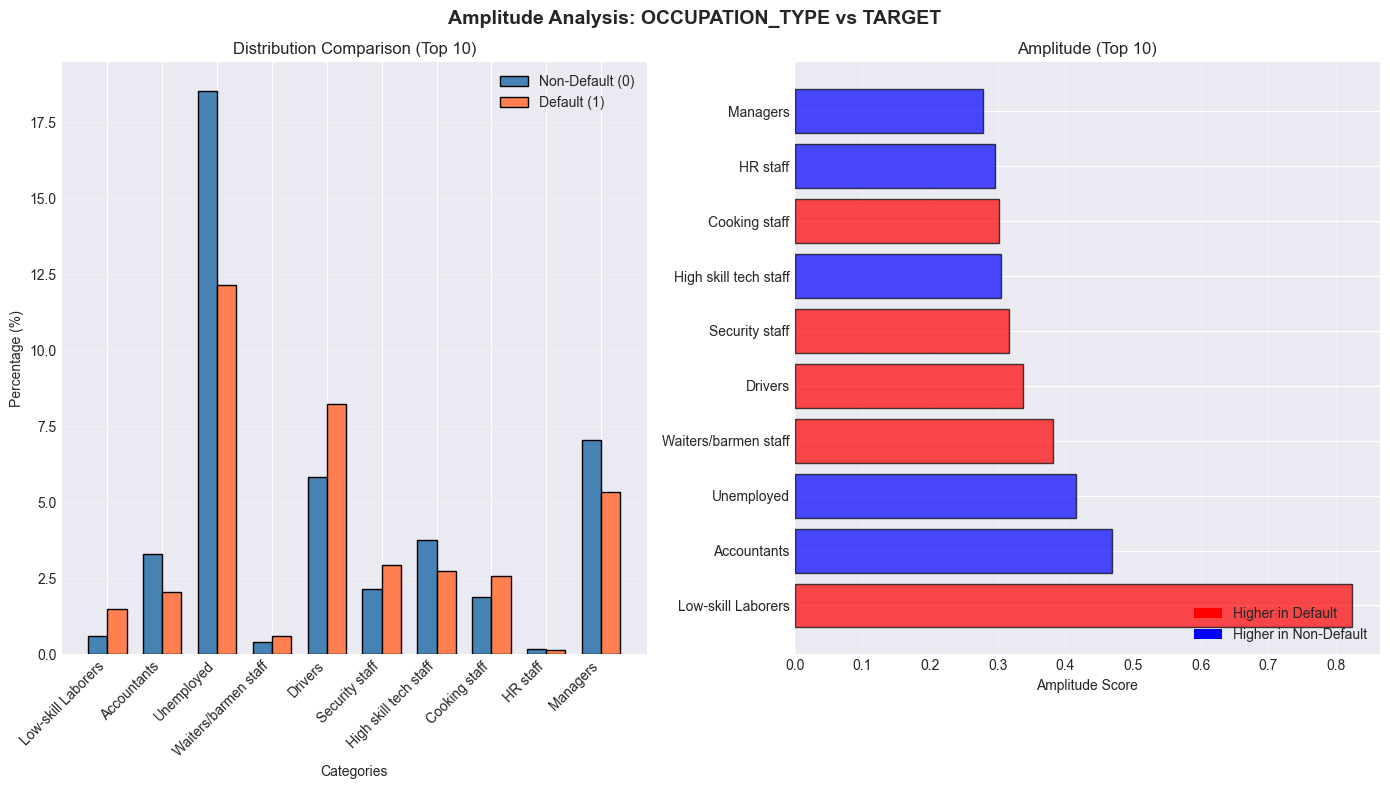

In [91]:
# Bivariate Analysis: OCCUPATION_TYPE vs TARGET

import pandas as pd
from function import plot_nominal_amplitude_analysis

assert 'TARGET' in df.columns, "TARGET column not found in df"

feature = 'OCCUPATION_TYPE' 

results = []

# --- 1. Plot amplitude analysis ---
if feature not in df.columns:
    print(f"Warning: {feature} not in dataframe; skipping.")
else:
    try:
        plot_nominal_amplitude_analysis(
            data=df,
            feature=feature,
            target='TARGET',
            title=f'Amplitude Analysis: {feature} vs TARGET'
        )
    except TypeError:
        # Fallback if function takes (df, feature, target)
        try:
            plot_nominal_amplitude_analysis(df, feature, 'TARGET')
        except Exception as e:
            print(f"Amplitude analysis not executed for {feature}: {e}")



**Key Finding**: Contrary to expected risk assumptions, **the "Unemployed" group shows LOWER default rates than many employed segments**, particularly Laborers. This counterintuitive pattern suggests the data classification is misleading—many "Unemployed" applicants are likely pensioners or retirees with stable government income, resulting in lower default risk than presumed. This visibility only emerged after proper data processing, revealing that "Unemployed" status doesn't equate to unemployment risk but rather a distinct demographic with consistent income sources.



Analyzing: OCCUPATION_TYPE | Unique values: 19


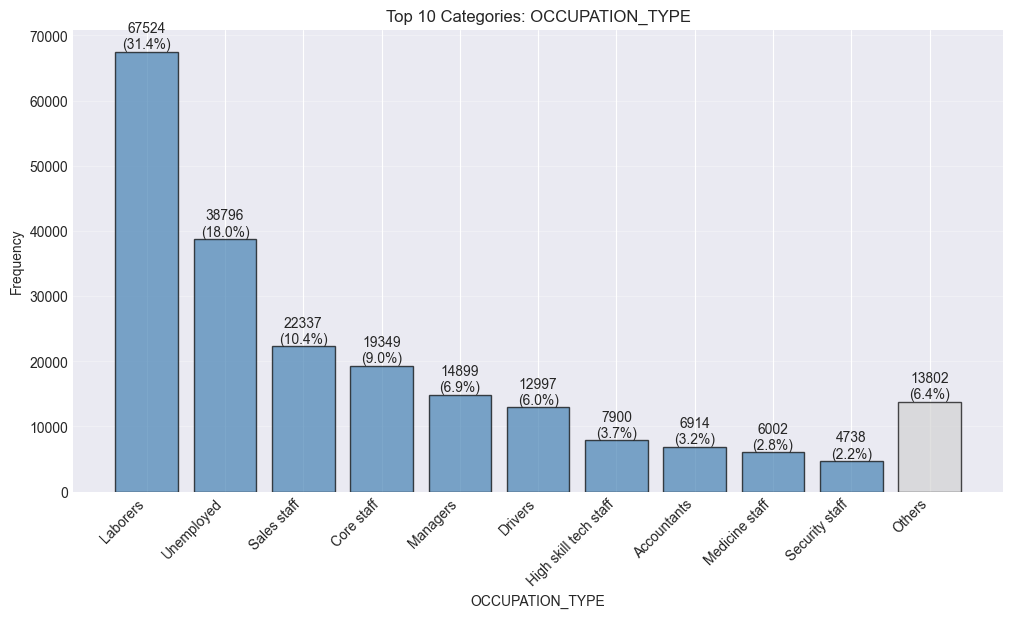

In [92]:
feature = "OCCUPATION_TYPE"

n_unique = df[feature].nunique()
print(f"Analyzing: {feature} | Unique values: {n_unique}")

if n_unique < 10:
    # Use normal discrete bar chart
    plot_discrete_barchart(
        data=df[feature],
        title=f'Bar Chart: {feature}',
        figsize=(10, 6)
    )
else:
    # Use Top-K chart for larger number of categories
    plot_nominal_topk_barchart(
        data=df[feature],
        top_k=10,
        title=f'Top 10 Categories: {feature}',
        figsize=(12, 6)
    )

Variable: OWN_CAR_AGE
SUMMARY TABLE: Continuous Variables


Feature   Count  Missing      Mean  Median       Std  Min   Max  \
0  OWN_CAR_AGE  215258        0  4.103183     0.0  9.021948  0.0  69.0   

   Skewness   Kurtosis  
0  3.933032  20.528217

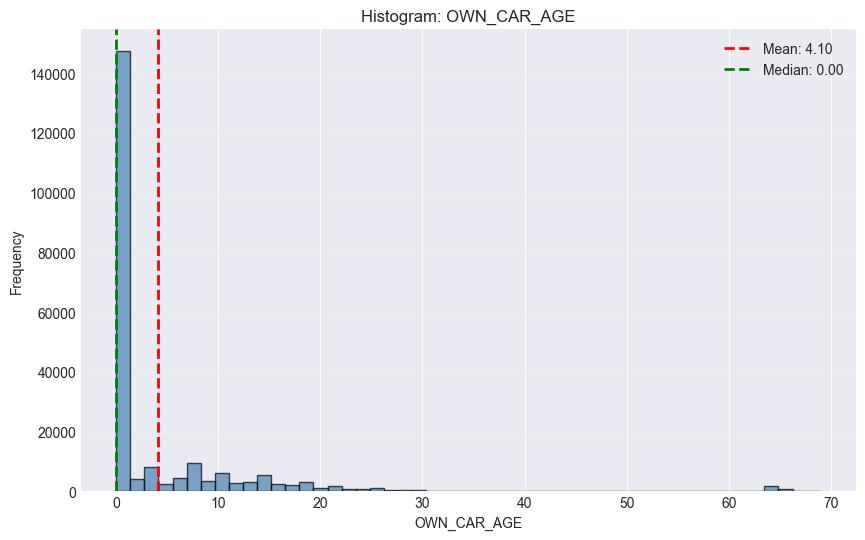

In [94]:
# Univariate Analysis for Continuous Variables
from scipy import stats

continuous_vars_3 = ['OWN_CAR_AGE'
]

# Store all metrics
all_metrics = []

for col in continuous_vars_3:
    if col not in df.columns:
        print(f"Warning: {col} not found in dataframe")
        continue
    print(f"Variable: {col}")
    # Calculate metrics using function from function.py
    metrics_df = calculate_continuous_metrics(data=df[col], target=None)
    
    # Store for summary table
    all_metrics.append(metrics_df)
    
    # Plot using function 
    plot_continuous_histogram(
        data=df[col],
        bins=50,
        title=f'Histogram: {col}',
        figsize=(10, 6)
    )

# Display summary table
print("SUMMARY TABLE: Continuous Variables")
metrics_summary = pd.concat(all_metrics, ignore_index=True)
display(metrics_summary)

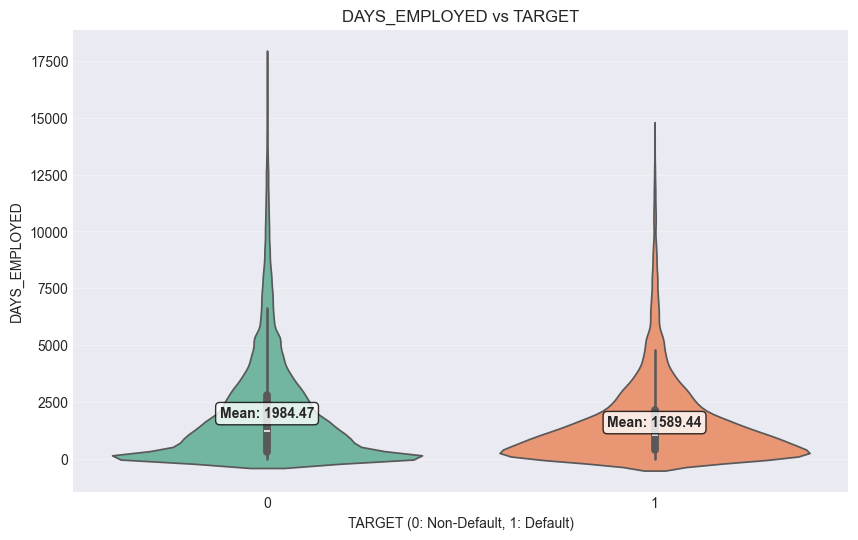

In [95]:
# Bivariate Analysis: Continuous Variables vs TARGET
from scipy import stats

if 'TARGET' not in df.columns:
    raise ValueError("Column 'TARGET' not found in dataframe.")

continuous_vars = ['DAYS_EMPLOYED']

results = []

for feature in continuous_vars:
    if feature not in df.columns:
        print(f"Warning: {feature} not in dataframe; skipping.")
        continue
    
    # Visualization: Violin plot
    plot_continuous_violin_vs_target(
        data=df,
        feature=feature,
        target='TARGET',
        title=f'{feature} vs TARGET'
    )


- A huge spike at 0 appears, because most clients do not own a car, dominates the distribution.

- The mean drops drastically

- Distribution becomes: Extremely left-skewed, with mass at 0
Very small tails representing real car ages

- The difference in means between default and non-default becomes tiny (4.09 vs 4.22). This tells us that OWN_CAR_AGE is no longer a strong predictor of default after imputation
because 0 is overloaded representing no car.

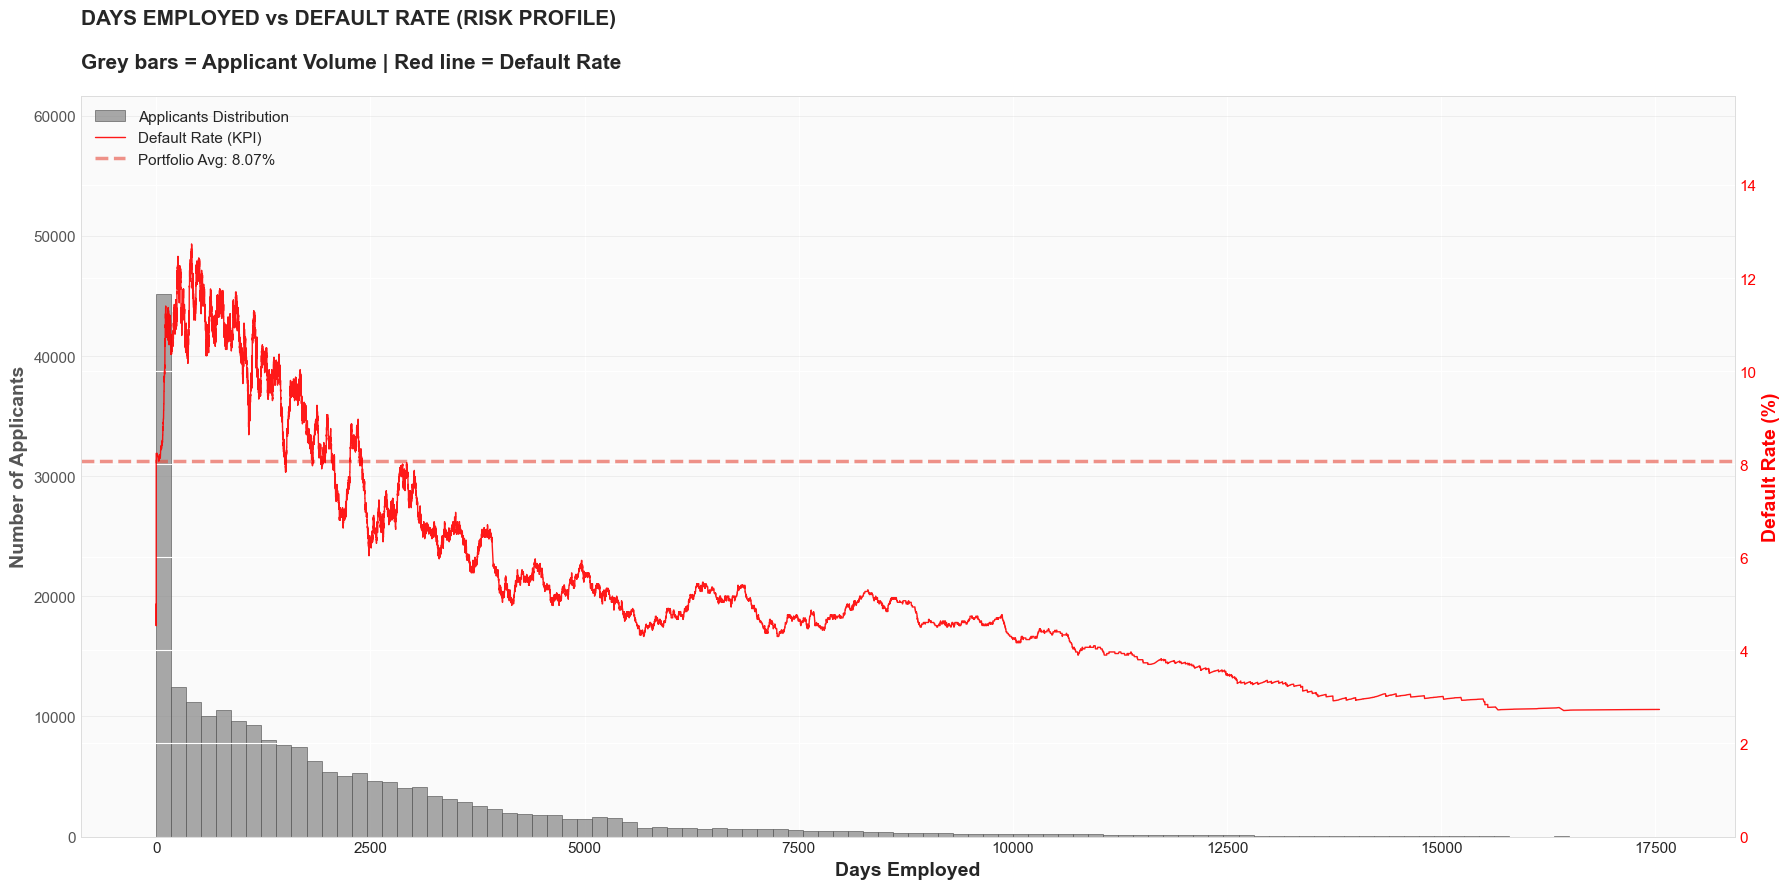

In [102]:
# DAYS_EMPLOYED Distribution with Default Rate Overlay
# Grey histogram shows portfolio composition, Red line shows default rate trend (KPI focus)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare data - employed segment only
df_employed = df[df['DAYS_EMPLOYED'] >= 0].copy().sort_values('DAYS_EMPLOYED')

# ===== DUAL-AXIS VISUALIZATION =====
fig, ax1 = plt.subplots(figsize=(18, 9))

# LEFT AXIS: Grey histogram
ax1.hist(df_employed['DAYS_EMPLOYED'], bins=100, 
         color='#8B8B8B', alpha=0.75, edgecolor='#555555', linewidth=0.6,
         label='Applicants Distribution')

ax1.set_xlabel('Days Employed', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Applicants', fontsize=14, fontweight='bold', color='#555555')
ax1.tick_params(axis='y', labelcolor='#555555', labelsize=11)
ax1.tick_params(axis='x', labelsize=11)
ax1.set_facecolor('#FAFAFA')

# Extend y-axis slightly for readability
y_max = ax1.get_ylim()[1]
ax1.set_ylim(0, y_max * 1.30)

# RIGHT AXIS: Rolling default rate (KPI focus)
ax2 = ax1.twinx()

# Rolling default (smooth line)
df_sort = df_employed.sort_values('DAYS_EMPLOYED').reset_index(drop=True)
window_size = 3000
df_sort['rolling_default'] = df_sort['TARGET'].rolling(
    window=window_size, min_periods=500, center=True
).mean()

# Plot red line with lighter styling
ax2.plot(df_sort['DAYS_EMPLOYED'], df_sort['rolling_default'] * 100, 
        color='#FF0000', linewidth=1, alpha=0.9, label='Default Rate (KPI)', zorder=5)

# Portfolio average line
portfolio_avg_default = df_employed['TARGET'].mean()
ax2.axhline(portfolio_avg_default * 100, color='#E74C3C', linestyle='--',
            linewidth=2.5, alpha=0.6,
            label=f'Portfolio Avg: {portfolio_avg_default*100:.2f}%')

ax2.set_ylabel('Default Rate (%)', fontsize=14, fontweight='bold', color='#FF0000')
ax2.tick_params(axis='y', labelcolor='#FF0000', labelsize=11)
ax2.set_ylim(
    0,
    df_sort['rolling_default'].max() * 100 * 1.25   # 25% headroom
)
# ===== TITLE — Left-aligned notation (same style as other charts) =====
ax1.set_title(
    'DAYS EMPLOYED vs DEFAULT RATE (RISK PROFILE)\n\n'
    'Grey bars = Applicant Volume | Red line = Default Rate',
    fontsize=15, fontweight='bold', pad=20, loc='left'
)

# Enhanced gridlines
ax1.grid(True, alpha=0.12, linestyle='-', linewidth=0.6, color='gray', axis='y')
ax1.set_axisbelow(True)

# Clean spines
for spine in ax1.spines.values():
    spine.set_edgecolor('#DDDDDD')
    spine.set_linewidth(0.7)
for spine in ax2.spines.values():
    spine.set_edgecolor('#DDDDDD')
    spine.set_linewidth(0.7)

# Combined legend (top-left, consistent with other plots)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11, framealpha=0.95)

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()


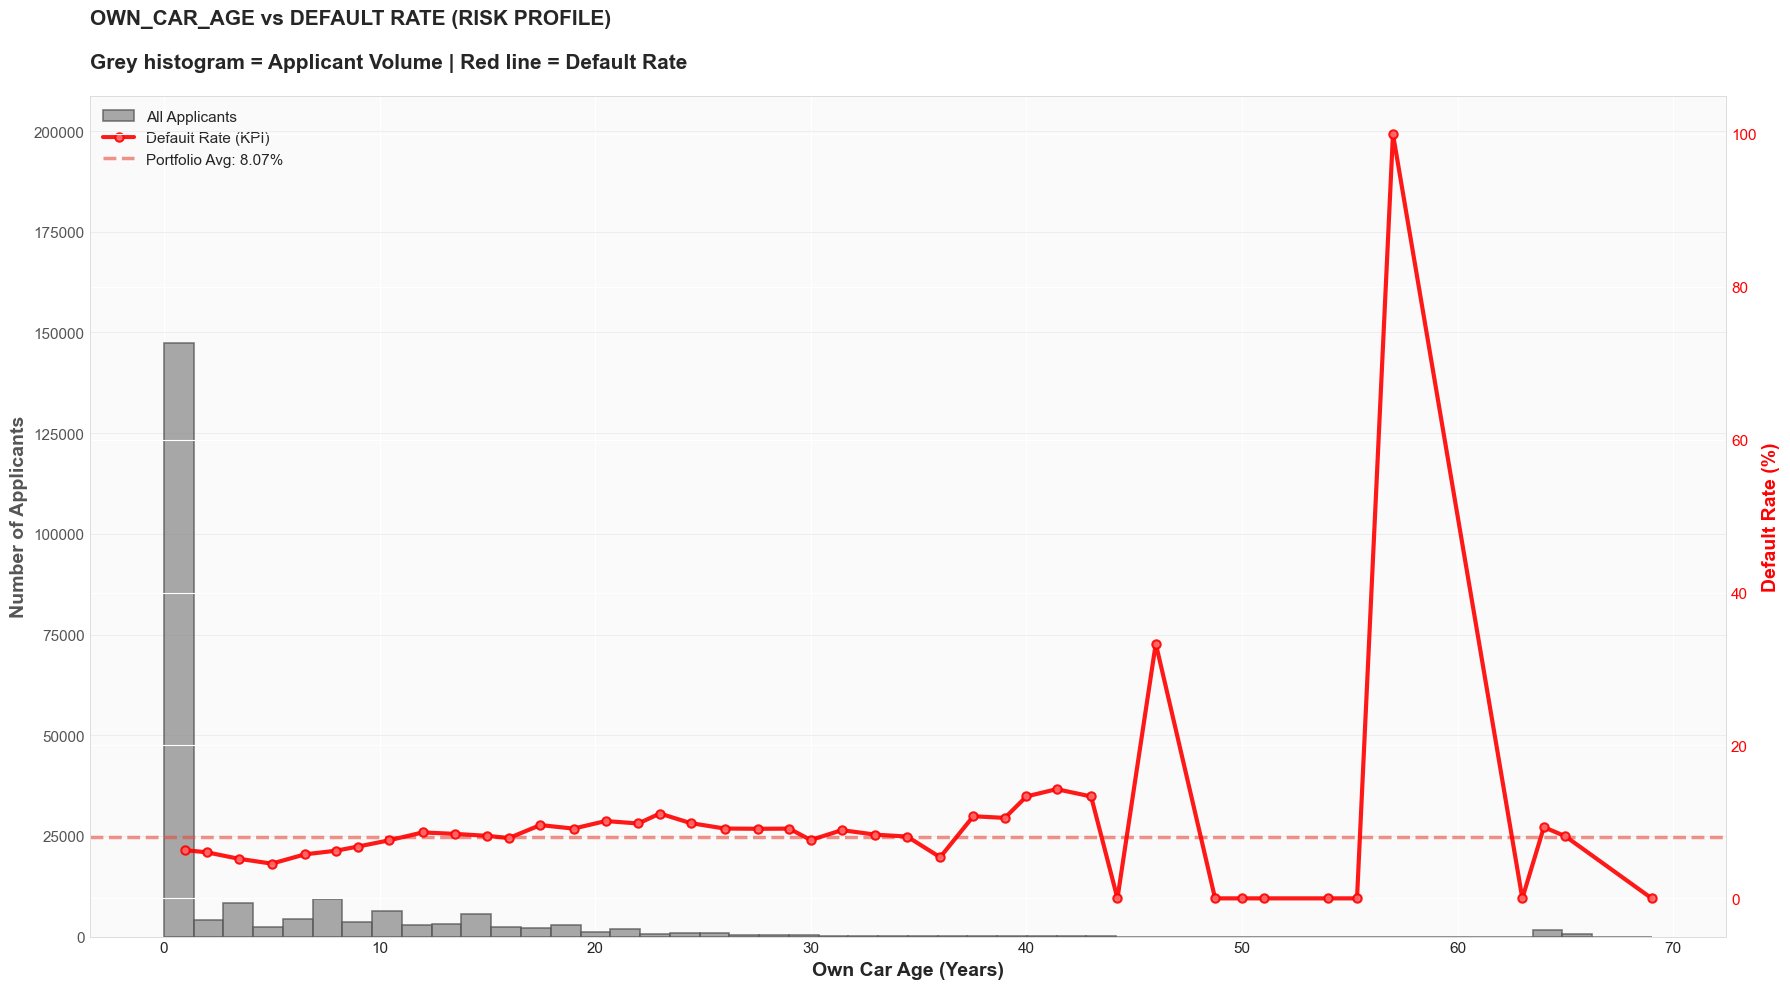

In [97]:
# OWN_CAR_AGE Distribution with Default Rate 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
df_car = df.copy().sort_values('OWN_CAR_AGE')

# ===== DUAL-AXIS VISUALIZATION =====
fig, ax1 = plt.subplots(figsize=(18, 10))

# LEFT AXIS: Grey histogram
ax1.hist(df_car['OWN_CAR_AGE'], bins=50, 
         color='#8B8B8B', alpha=0.75, edgecolor='#555555', linewidth=1.2,
         label='All Applicants')

ax1.set_xlabel('Own Car Age (Years)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Applicants', fontsize=14, fontweight='bold', color='#555555')
ax1.tick_params(axis='y', labelcolor='#555555', labelsize=11)
ax1.tick_params(axis='x', labelsize=11)
ax1.set_facecolor('#FAFAFA')

# Enlarge y-axis
y_max = ax1.get_ylim()[1]
ax1.set_ylim(0, y_max * 1.35)

# RIGHT AXIS: Red line (default rate)
ax2 = ax1.twinx()

# Compute binned default rate
bins_edges = np.linspace(0, df_car['OWN_CAR_AGE'].max(), 50)
df_car_binned = df_car.copy()
df_car_binned['bin'] = pd.cut(df_car_binned['OWN_CAR_AGE'], bins=bins_edges)

bin_stats = df_car_binned.groupby('bin', observed=True).agg({
    'OWN_CAR_AGE': 'mean',
    'TARGET': 'mean'
}).reset_index().dropna()

ax2.plot(bin_stats['OWN_CAR_AGE'], bin_stats['TARGET'] * 100, 
         color='#FF0000', linewidth=3, alpha=0.9, label='Default Rate (KPI)', 
         zorder=5, marker='o', markersize=6, markerfacecolor='#FF6B6B', 
         markeredgecolor='#FF0000', markeredgewidth=1.5)

# Portfolio average line
portfolio_avg_default = df_car['TARGET'].mean()
ax2.axhline(portfolio_avg_default * 100, color='#E74C3C', linestyle='--',
            linewidth=2.5, alpha=0.6,
            label=f'Portfolio Avg: {portfolio_avg_default*100:.2f}%')

ax2.set_ylabel('Default Rate (%)', fontsize=14, fontweight='bold', color='#FF0000')
ax2.tick_params(axis='y', labelcolor='#FF0000', labelsize=11)

# TITLE — Left-aligned notation 
ax1.set_title(
    'OWN_CAR_AGE vs DEFAULT RATE (RISK PROFILE)\n\n'
    'Grey histogram = Applicant Volume | Red line = Default Rate',
    fontsize=15, fontweight='bold', pad=20, loc='left'
)

# Enhanced gridlines
ax1.grid(True, alpha=0.12, linestyle='-', linewidth=0.6, color='gray', axis='y')
ax1.set_axisbelow(True)

# Clean spines
for spine in ax1.spines.values():
    spine.set_edgecolor('#DDDDDD')
    spine.set_linewidth(0.7)
for spine in ax2.spines.values():
    spine.set_edgecolor('#DDDDDD')
    spine.set_linewidth(0.7)

# Combined legend (same as previous chart)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11, framealpha=0.95)

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()


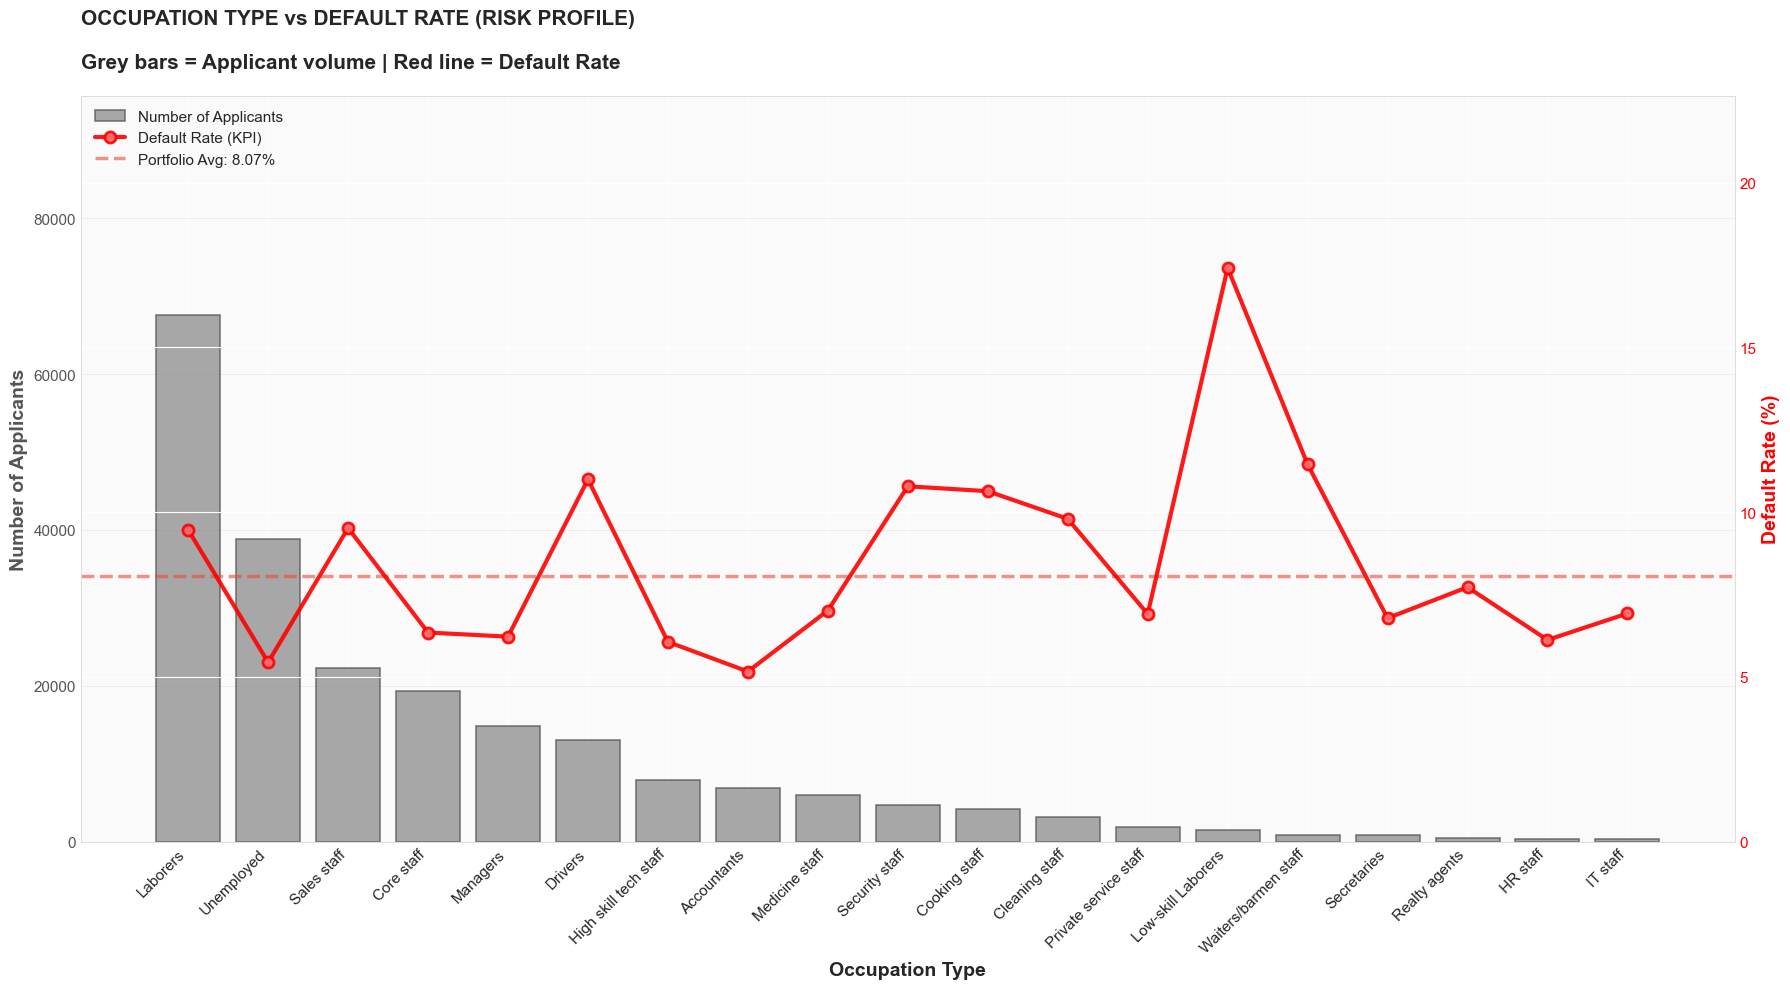

In [98]:
# OCCUPATION_TYPE vs DEFAULT RATE (TARGET)
# Dual-axis: Bar chart for count + Line for default rate by occupation

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare data: group by OCCUPATION_TYPE
occupation_stats = df.groupby('OCCUPATION_TYPE', observed=True).agg({
    'TARGET': ['count', 'sum', 'mean']
}).reset_index()

occupation_stats.columns = ['OCCUPATION_TYPE', 'Count', 'Defaults', 'Default_Rate']
occupation_stats = occupation_stats.sort_values('Count', ascending=False)

# ===== DUAL-AXIS VISUALIZATION =====
fig, ax1 = plt.subplots(figsize=(18, 10))

# LEFT AXIS: Bar chart for applicant count
x_pos = np.arange(len(occupation_stats))
bars = ax1.bar(x_pos, occupation_stats['Count'], 
               color='#8B8B8B', alpha=0.75, edgecolor='#555555', linewidth=1.2,
               label='Number of Applicants')

ax1.set_xlabel('Occupation Type', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Applicants', fontsize=14, fontweight='bold', color='#555555')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(occupation_stats['OCCUPATION_TYPE'], rotation=45, ha='right', fontsize=11)
ax1.tick_params(axis='y', labelcolor='#555555', labelsize=11)
ax1.set_facecolor('#FAFAFA')

# Enlarge y-axis range for better readability
y_max = ax1.get_ylim()[1]
ax1.set_ylim(0, y_max * 1.35)

# RIGHT AXIS: Line for default rate (KPI focus)
ax2 = ax1.twinx()

ax2.plot(x_pos, occupation_stats['Default_Rate'] * 100, 
        color='#FF0000', linewidth=3, alpha=0.9, label='Default Rate (KPI)', 
        zorder=5, marker='o', markersize=8, markerfacecolor='#FF6B6B', 
        markeredgecolor='#FF0000', markeredgewidth=2)

# Add portfolio average line
portfolio_avg_default = df['TARGET'].mean()
ax2.axhline(y=portfolio_avg_default * 100, color='#E74C3C', linestyle='--', 
           linewidth=2.5, alpha=0.6, label=f'Portfolio Avg: {portfolio_avg_default*100:.2f}%')

ax2.set_ylabel('Default Rate (%)', fontsize=14, fontweight='bold', color='#FF0000')
ax2.tick_params(axis='y', labelcolor='#FF0000', labelsize=11)

# Set y-axis limits for default rate
ax2.set_ylim(0, max(occupation_stats['Default_Rate'] * 100) * 1.3)

# ===== TITLE & STYLING =====
ax1.set_title('OCCUPATION TYPE vs DEFAULT RATE (RISK PROFILE)\n\nGrey bars = Applicant volume | Red line = Default Rate',
             fontsize=15, fontweight='bold', pad=20, loc='left')

# Enhanced gridlines
ax1.grid(True, alpha=0.12, linestyle='-', linewidth=0.6, color='gray', axis='y')
ax1.set_axisbelow(True)

# Clean spines
for spine in ax1.spines.values():
    spine.set_edgecolor('#DDDDDD')
    spine.set_linewidth(0.7)
for spine in ax2.spines.values():
    spine.set_edgecolor('#DDDDDD')
    spine.set_linewidth(0.7)

# Combined legend with better positioning
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11, framealpha=0.95)

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()


## **Feature Encoding**


In [99]:
# Import encoder from pipeline
import sys
sys.path.insert(0, 'src')
from src.pipeline import FlexibleCategoricalEncoder

# Filter categorical columns from client_demo_cols
categorical_demo_cols = [col for col in client_demo_cols 
                         if col in df.columns and df[col].dtype == 'object']


print("CLIENT DEMOGRAPHICS - CATEGORICAL ENCODING")

print(f"\nTotal categorical features: {len(categorical_demo_cols)}")
for i, col in enumerate(categorical_demo_cols, 1):
    n_unique = df[col].nunique()
    print(f"  {i:2d}. {col:35s} → {n_unique:3d} categories")

# Define encoding configuration
encoding_config_demo = {
    'label_encode_cols': [
        'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'
    ],
    'onehot_encode_cols': [
        'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'
    ],
    'ordinal_encode_cols': ['NAME_EDUCATION_TYPE'],
    'ordinal_mappings': {
        'NAME_EDUCATION_TYPE': [
            'Lower secondary',
            'Secondary / secondary special',
            'Incomplete higher',
            'Higher education',
            'Academic degree'
        ]
    },
    'frequency_encode_cols': [
        'ORGANIZATION_TYPE', 'OCCUPATION_TYPE'
    ]
}

# Fit and transform
print("FITTING ENCODER & TRANSFORMING DATA")

encoder_demo = FlexibleCategoricalEncoder(**encoding_config_demo)
encoder_demo.fit(df)
df_demo_encoded = encoder_demo.transform(df)

print(f"Original shape:  {df.shape}")
print(f"Encoded shape:   {df_demo_encoded.shape}")
print(f"Total features added: {df_demo_encoded.shape[1] - df.shape[1]}")


print("ENCODING COMPLETE")


CLIENT DEMOGRAPHICS - CATEGORICAL ENCODING

Total categorical features: 9
   1. CODE_GENDER                         →   2 categories
   2. FLAG_OWN_CAR                        →   2 categories
   3. FLAG_OWN_REALTY                     →   2 categories
   4. NAME_INCOME_TYPE                    →   8 categories
   5. NAME_EDUCATION_TYPE                 →   5 categories
   6. NAME_FAMILY_STATUS                  →   6 categories
   7. NAME_HOUSING_TYPE                   →   6 categories
   8. OCCUPATION_TYPE                     →  19 categories
   9. ORGANIZATION_TYPE                   →  58 categories
FITTING ENCODER & TRANSFORMING DATA
Label encoding: CODE_GENDER (2 categories)
Label encoding: FLAG_OWN_CAR (2 categories)
Label encoding: FLAG_OWN_REALTY (2 categories)
One-hot encoding: NAME_INCOME_TYPE (8 categories)
One-hot encoding: NAME_FAMILY_STATUS (6 categories)
One-hot encoding: NAME_HOUSING_TYPE (6 categories)
Original shape:  (215258, 75)
Encoded shape:   (215258, 89)
Total featur

# **Feature Scaling with Pipeline**

In [100]:
# Import StandardScalerTransformer from pipeline
import sys
sys.path.insert(0, 'src')
from src.pipeline import StandardScalerTransformer

print("FEATURE SCALING - CLIENT DEMOGRAPHICS ONLY")

# Get numeric columns from client_demo_cols
numeric_demo_cols = [col for col in client_demo_cols if col in df_demo_encoded.columns and df_demo_encoded[col].dtype in ['int64', 'float64']]

print(f"\nNumeric features from client_demo_cols to scale: {len(numeric_demo_cols)}")
for i, col in enumerate(numeric_demo_cols, 1):
    print(f"  {i:2d}. {col}")

# Create a copy for scaling (keep only client demographics and TARGET)
demo_cols_with_target = [col for col in client_demo_cols if col in df_demo_encoded.columns]
if 'TARGET' not in demo_cols_with_target:
    demo_cols_with_target.append('TARGET')

df_demo_subset = df_demo_encoded[demo_cols_with_target].copy()

print(f"\nOriginal subset shape:  {df_demo_subset.shape}")

# Create scaler for numeric features only
scaler = StandardScalerTransformer(exclude_cols=['TARGET'])
print(f"Fitting StandardScaler on {len(numeric_demo_cols)} features...")
scaler.fit(df_demo_subset)

# Transform the subset
df_demo_scaled = scaler.transform(df_demo_subset)

print(f"Scaled subset shape:    {df_demo_scaled.shape}")

# Display statistics before and after scaling
print("SAMPLE STATISTICS COMPARISON (First 5 numeric demographics)")

sample_cols = numeric_demo_cols[:5]
print("\nBEFORE SCALING:")
print(df_demo_subset[sample_cols].describe().round(4))

print("\n\nAFTER SCALING:")
print(df_demo_scaled[sample_cols].describe().round(4))

print("\nFeature scaling complete! (Client demographics features only)")


FEATURE SCALING - CLIENT DEMOGRAPHICS ONLY

Numeric features from client_demo_cols to scale: 15
   1. CNT_CHILDREN
   2. NAME_EDUCATION_TYPE
   3. REGION_POPULATION_RELATIVE
   4. DAYS_EMPLOYED
   5. DAYS_REGISTRATION
   6. DAYS_ID_PUBLISH
   7. OWN_CAR_AGE
   8. CNT_FAM_MEMBERS
   9. FLAG_MOBIL
  10. FLAG_EMP_PHONE
  11. FLAG_WORK_PHONE
  12. FLAG_CONT_MOBILE
  13. FLAG_PHONE
  14. FLAG_EMAIL
  15. DAYS_LAST_PHONE_CHANGE

Original subset shape:  (215258, 19)
Fitting StandardScaler on 15 features...
Scaled subset shape:    (215258, 19)
SAMPLE STATISTICS COMPARISON (First 5 numeric demographics)

BEFORE SCALING:
       CNT_CHILDREN  NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  \
count   215258.0000          215258.0000                 215258.0000   
mean         0.4171               1.5093                      0.0209   
std          0.7232               0.8744                      0.0138   
min          0.0000               0.0000                      0.0005   
25%          0.0000  